<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR79f0HtmO_rLX5R89c90X6owsEp6_zRRG7LUjr1ToQFx-R6f6I" style="float: left; margin: 20px; height: 100px">

# Web Scraping & APIs

_Author: Alfred Zou_

---

### Web Scraping & APIs
---
* Sometimes when we need to get data from online, but there is no .csv file or other flat file storage type
* Often there is some sort of information in the public domain we want to collect
    * For example, if we are selling perfume and wanted to check how much our competitors were selling it for 
    * We could manually go to each competitors website, and collect the information. However, this is extremely tedious
    * Alternatively, we can use Python to collect large amounts of online data, this process is called web scraping (or scraping)
* Web scraping is an extremely powerful tool that allows access to a lot more data
* Web scraping can cause serious performance issues on websites similar to a DDOS attacks
* Therefore, companies release their own APIs to disincentivise webscraping

#### The Ethics of Web Scraping
* The ethics and legality of webscraping has been a hot issue
    * From the perspective of website owners, they want to protect their data
    * One view point, is that if the information is in the public domain, then webscraping should be legal and ethical
    * This was reinforced by the court case between data analytics firm HiQ against LinkedIn
    * HiQ had scraped LinkedIn data that was public at the time
    * A US court affirmed that any data that required no authorization to access and was freely available by default was fair game for scraping
* In consideration of this, I advise an ethical approach to scraping
* When possible, use an API
* Otherwise implement a 10 second delay between switching webpages, when scraping

#### Web Scraping
* Web scraping is an automated way of fetching data from a website
* It can be broken into a few key components:
    * Crawl: navigating to the webpage that you want to scrape
    * Fetch: retrieving the html of the webpage
    * Parse: extracting the relevant information from the retrieved html from the fetching stage

#### Website Building Blocks
* To parse a website, it is important to know how websites are constructed
* All webpages are made of three elements:
    * **html**: the content of the webpage and layout
    * Broken down into hierarchical tags
    * **css**: provides the styling to the html, and is what makes websites look good
    * **javascript**: an optional element, not all websites have javascript. 
    * Javacript provides a lot of added functionality, such as allowing certain parts of the website to update even without refreshing the page
    * An example could be when you receive a friend request from Facebook
* **html** is made out of elements (or tags)

```html
<!-- Here's an example of a title element -->
<title>An example of HTML page</title>

<!-- Elements may have attributes 
The example below has a URL as a href attribute -->
<a href="https://en.wikipedia.org/">This is a link</a>
```

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_nZ3tJw98ygUIY6OYFg_XgNQUlHOsyP4Bm-V20lTsktDVN4j0" style="margin-left:auto;margin-right:auto">

### Crawl & Fetch
---

* Crawl & fetch are usually performed together by the same Python package
* The most popular package and my recommendation is `requests`. An older alternative being `urllib` 
* The disadvantage of `requests` is that it can't capture data from javascript
* In this case we will need to use `selenium`, which opens its own browser instance. This browser is controlled by python
* `Selenium` provides a lot of interesting features such as filling forms and clicking buttons 
* Alternatively, `scrapy's` spiders can be used as a very advanced option

```python
import request

# Request data from webpage
req = request.get(url)

# Check connection
print(req)
output: 200 (OK)
output: 4## (some sort of connection issue)

# html file
request.text
```

### Parse
---
* After fetching the html of a webpage, we need to identify the relevant data we are trying to extract
    * this could be the name, price and description of a product
* There are two popular parsers: `BeautifulSoup` and Scrapy's `XPath`
* Parsing is based on how the html of the website was written
* The text is split by elements, which allows the parser to search by elements and attributes
* If the web developer changes the site, often our existing code will break and we will need to write a new one

In [60]:
HTML = """
<html>
<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itemprop="author">Albert Einstein</small>
        <a href="/author/Albert-Einstein">(about)</a>
        </span>
        <div class="tags">
            Tags:
            <meta class="keywords" itemprop="keywords" content="change,deep-thoughts,thinking,world" /    > 
            
            <a class="tag" href="/tag/change/page/1/">change</a>
            
            <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
            
            <a class="tag" href="/tag/thinking/page/1/">thinking</a>
            
            <a class="tag" href="/tag/world/page/1/">world</a>
            
        </div>
    </div>

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
        <span>by <small class="author" itemprop="author">J.K. Rowling</small>
        <a href="/author/J-K-Rowling">(about)</a>
        </span>
        <div class="tags">
            Tags:
            <meta class="keywords" itemprop="keywords" content="abilities,choices" /    > 
            
            <a class="tag" href="/tag/abilities/page/1/">abilities</a>
            
            <a class="tag" href="/tag/choices/page/1/">choices</a>
            
        </div>
    </div>
</html>
"""

#### BeautifulSoup


In [61]:
# Import module
from bs4 import BeautifulSoup

# Parsing with BeautifuLSoup
# 1st argument is the html file, usually requests.get(URL).text from fetching
# 2nd argument is the parser, 'lxml' is the most proferred
soup = BeautifulSoup(HTML, 'lxml')

# Notice how the indentation has been removed
soup

<html>
<body><div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<

In [62]:
# Let's get the first quote
# The first argument is the element
# The second argument are the attributes
# In this case we are searching for a span with class = "text"
print(1, soup.find('span',class_="text"))

# Let's extract the text
print(2, soup.find('span',class_="text").text)

# Let's look at all the attributes
print(3, soup.find('span',class_="text").attrs)

# Let's extract the itemprop attribute
print(4, soup.find('span',class_="text").attrs['itemprop'])

1 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
2 “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
3 {'class': ['text'], 'itemprop': 'text'}
4 text


In [63]:
# Let's get all the quotes
print(soup.find_all('span',class_="text"))

# If we want to extract text/attribute from each of these results, we need to loop through them
for i in range(len(soup.find_all('span',class_="text"))):
    # Let's extract the text
    print(soup.find_all('span',class_="text")[i].text)

for i in range(len(soup.find_all('span',class_="text"))):
    # Let's extract the itemprop attribute
    print(soup.find_all('span',class_="text")[i].attrs['itemprop'])

[<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>, <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>]
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
text
text


#### XPath

In [64]:
# Import module
from scrapy.selector import Selector

# Parsing with Selector
# 1st argument is the html file, usually requests.get(URL).text from fetching
xpath_selector = Selector(text=HTML)

# Notice how the html has been modified
xpath_selector.extract()

'<html>\n<body><div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\n        <span>by <small class="author" itemprop="author">Albert Einstein</small>\n        <a href="/author/Albert-Einstein">(about)</a>\n        </span>\n        <div class="tags">\n            Tags:\n            <meta class="keywords" itemprop="keywords" content="change,deep-thoughts,thinking,world"> \n            \n            <a class="tag" href="/tag/change/page/1/">change</a>\n            \n            <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>\n            \n            <a class="tag" href="/tag/thinking/page/1/">thinking</a>\n            \n            <a class="tag" href="/tag/world/page/1/">world</a>\n            \n        </div>\n    </div>\n\n    <di

In [65]:
# XPath essentially always works like BeautifulSoup's find_all()
# But it can pull the attribute of multiple elements
# XPath can do absolute path searching (using /)
# In this case we are searching for the span element with class = "text"
print(1, xpath_selector.xpath('/html/body/div/div/div/span[@class="text"]').extract())

# If we wanted the first quote
print(2, xpath_selector.xpath('/html/body/div/div/div/span[@class="text"]').extract()[0])

# If we wanted all the quotes
print(3, xpath_selector.xpath('/html/body/div/div/div/span[@class="text"]/text()').extract())

# If we wanted all the itemprop attributes
print(4, xpath_selector.xpath('/html/body/div/div/div/span[@class="text"]/@itemprop').extract())

1 ['<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>', '<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>']
2 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
3 ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”']
4 ['text', 'text']


In [66]:
# Additionally, XPath can use relative searching (using //), which is BeautifulSoup's default setting
# This will be used much more frequently than the absolute path
# Let's extract all the quotes
print(3, xpath_selector.xpath('//span[@class="text"]/text()').extract())

# Absolute and relative paths can be used together
print(3, xpath_selector.xpath('//div[@class="quote"]/span[@class="text"]/text()').extract())

3 ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”']
3 ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', '“It is our choices, Harry, that show what we truly are, far more than our abilities.”']


### Scraping Examples
---

#### Crawl & Fetch Example

In [67]:
import requests
from scrapy.selector import Selector

# Requesting data
req = requests.get('https://www.perfumery.com.au/mens/fragrances.html')

# Checking connection, 200 OK
print(req)

<Response [200]>


In [68]:
# Check html, OK
req.text[0:150]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="keywords" content="Fragrance'

In [69]:
html = req.text

In [70]:
# Uncomment if website changes in the future
# html = '<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="keywords" content="Fragrances for men, men&#39;s fragrances" />\n<meta name="description" content="Shop fragrances for men online at Perfumery. Select men’s perfume and cologne with free shipping on orders over $99 and a free gift with every purchase." />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=0" />\n<meta property="og:image" content="https://www.perfumery.com.au/assets/website_logo.png" />\n<meta property="og:title" content="Men’s Fragrances - Perfume For Men - Perfumery" />\n<meta property="og:site_name" content="Perfumery" />\n<meta property="og:type" content="website" />\n<meta property="og:url" content="https://www.perfumery.com.au/mens/fragrances.html" />\n<meta property="og:description" content="Shop fragrances for men online at Perfumery. Select men’s perfume and cologne with free shipping on orders over $99 and a free gift with every purchase." />\n<title>Men’s Fragrances - Perfume For Men - Perfumery</title>\n<link rel="canonical" href="https://www.perfumery.com.au/mens/fragrances.html" />\n<link rel="shortcut icon" href="https://www.perfumery.com.au/assets/favicon_logo.png" />\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick.css?1580165811" />\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick-theme.css?1580165811" />\n<link class="theme-selector" rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/css/app.css?1580165811" media="all" />\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/css/style.css?1580165811" media="all" />\n\n<link rel="stylesheet" type="text/css" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css" media="all" />\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/jquery_ui/1.11.1/css/custom-theme/jquery-ui-1.8.18.custom.css" media="all" />\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/fancybox/2.1.5/jquery.fancybox.css" media="all" />\n<!--[if lte IE 8]>\r\n\t<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/html5shiv/3.7.0/html5shiv.js"></script>\r\n\t<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/respond.js/1.3.0/respond.min.js"></script>\r\n<![endif]-->\n\n<script src="https://js.stripe.com/v3/"></script>\n\n\n<script type="text/javascript">(function(){function f(){var e=document.createElement("script");e.type="text/javascript";e.async=true;e.src="//platform.cloud-iq.com.au/cartrecovery/store.js?app_id=9786";var t = document.getElementsByTagName(\'head\')[0];t.appendChild(e);}f();})();</script>\n\n\n<script id="mcjs">window.mc4neto={ty:!1};!function(c,h,i,m,p){m=c.createElement(h),p=c.getElementsByTagName(h)[0],m.async=1,m.src=i,p.parentNode.insertBefore(m,p)}(document,"script","https://app.mailchimpforneto.com/script/perfumery.neto.com.au-121/mc4neto.js");</script>\n\n\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\r\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\r\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\r\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\r\n})(window,document,\'script\',\'dataLayer\',\'GTM-KWZ4HKB\');\r\n</script>\n\n\n</head>\n<body id="n_category" class="n_frame-2019-10">\n<nav class="navbar navbar-inverse c_navbarWrapper">\n<div class="container">\n<div class="row">\n<div class=navbar-header>\n<button type=button class="navbar-toggle collapsed mobile-menu-toggle pull-left" data-toggle="collapse" data-target="#navbar-top" aria-expanded="false">\n<span class=sr-only>Toggle navigation</span>\n<span class=icon-bar></span>\n<span class=icon-bar></span>\n<span class=icon-bar></span>\n</button>\n<span class="call">CALL US TODAY <a href="tel:1800101052" class="phone">1800 10 10 52</a></span>\n<div class="text-right c_cartWrapper visible-xs">\n<span class="lv1-li">\n<a href="https://www.perfumery.com.au/_myacct" class="btn btn-default btn-headerAccount btn-transparent">\n<i class="fa fa-user c_headerIcon"></i> My Account\n</a>\n</span>\n<span class="dropdown dropdown-hover" id="header-cart">\n<a href="https://www.perfumery.com.au/_mycart?tkn=cart&ts=1580559261030923" class="btn btn-default btn-headerCart btn-transparent">\n<i class="fa fa-shopping-cart c_headerIcon"></i>\n<span rel="a2c_item_count">0</span>\n</a>\n</span>\n</div>\n</div>\n<div class="collapse navbar-collapse" id="navbar-top">\n<ul class="nav navbar-nav visible-xs c_mobileCategoryWrapper" id="mob-menu">\n<li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-104" class="collapsed mob-drop">\nWomen\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-104" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/womens/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/celebrity.html">\nCelebrity </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/miniatures.html">\nMiniatures, Rollerballs and Vials </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/discontinued.html">\nRare & Unique </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/testers.html">\nTesters </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-113" class="collapsed mob-drop">\nMen\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-113" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/mens/after-shaves.html">\nAfter Shaves </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/celebrity.html">\nCelebrity </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/miniatures.html">\nMiniatures, Rollerballs and Vials </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/testers.html">\nTesters </a>\n</li><li>\n<a href="https://www.perfumery.com.au/damaged-box/~-108170">\nDamaged Box </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-109" class="collapsed mob-drop">\nBeauty <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-109" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/beauty/bath-body.html">\nBath & Body </a>\n</li>\n</ul>\n</li><li>\n<a href="https://www.perfumery.com.au/rare.html">\nRare & Unique </a>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-107976" class="collapsed mob-drop">\nUnisex <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-107976" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/unisex/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/miniatures-vials.html">\nMiniatures & Vials </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-119" class="collapsed mob-drop">\nSpecials <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-119" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/specials/mens/">\nMens </a>\n</li><li>\n<a href="https://www.perfumery.com.au/specials/womens/">\nWomen\'s </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-114" class="collapsed mob-drop">\nMore <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-114" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/more/best-sellers.html">\nBest Sellers </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/candles.html">\nCandles </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/children.html">\nChildren </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/factice.html">\nFactice </a>\n</li><li>\n<a href="https://www.perfumery.com.au/gift-sets/">\nGift Sets </a>\n</li>\n</ul>\n</li>\n</ul>\n<ul class="nav navbar-nav c_utilityWrapper">\n<li class=""> <a href="/about-us/">About Us </a>\n</li><li class=""> <a href="/buying/buying-guides/">Buying Guides </a>\n</li><li class=""> <a href="/delivery/">Delivery </a>\n</li><li class=""> <a href="/form/contact-us/">Contact Us </a>\n</li>\n</ul>\n</div>\n</div>\n</div>\n</nav>\n<div class="dah_header" data-spy="affix" data-offset-top="42">\n<div class="wrapper-header">\n<div class="container">\n<div class="row row-header">\n<div class="col-xs-12 col-sm-3 wrapper-logo text-center">\n<a href="https://www.perfumery.com.au" title="Perfumery">\n<img class="logo" src="/assets/website_logo.png" alt="Perfumery" />\n</a>\n</div>\n<div class="col-xs-12 col-sm-4">\n<div class="header-search">\n<form name="productsearch" method="get" action="/">\n<input type="hidden" name="rf" value="kw" />\n<div class="input-group">\n<input class="form-control ajax_search" value="" id="name_search" autocomplete="off" name="kw" type="text" placeholder="Search..." />\n<span class="input-group-btn">\n<button type="submit" value="Search" class="btn btn-default"><i class="fa fa-search"></i></button>\n</span>\n</div>\n</form>\n</div>\n</div>\n<div class="col-sm-5 text-right c_cartWrapper hidden-xs">\n<div class="lv1-li dropdown dropdown-hover">\n<a href="https://www.perfumery.com.au/_myacct" class="btn btn-default btn-headerAccount btn-transparent">\n<i class="fa fa-user c_headerIcon"></i> My Account <i class="fa fa-angle-down" aria-hidden="true"></i>\n</a>\n<ul class="dropdown-menu pull-right hidden-xs c_myAcctDropdown">\n<li><a href="https://www.perfumery.com.au/_myacct">Account Home</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct#orders">Orders</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/payrec">Pay Invoices</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/favourites">Favourites</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/wishlist">Wishlists</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/warranty">Resolution Centre</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/edit_account">Edit My Details</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/edit_address">Edit My Address Book</a></li>\n<li class="divider"></li>\n<li> <a href="https://www.perfumery.com.au/_myacct/login" title="Login">Login</a> </li>\n<li> <a href="https://www.perfumery.com.au/_myacct/register" title="Register">Register</a> </li>\n</ul>\n</div>\n<div class="dropdown dropdown-hover" id="header-cart">\n<a href="https://www.perfumery.com.au/_mycart?tkn=cart&ts=1580559261812087" class="btn btn-default btn-headerCart btn-transparent" id="cartcontentsheader">\n<i class="fa fa-shopping-cart c_headerIcon"></i> Cart <span rel="a2c_item_count">0</span>\n<i class="fa fa-angle-down"></i>\n</a>\n<ul class="dropdown-menu">\n<li class="box" id="neto-dropdown">\n<div class="body padding" id="cartcontents"></div>\n<div class="footer"></div>\n</li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n</div>\n<div class="c_categoryMenuWrapper hidden-xs">\n<div class="c_categoryMenuContainer">\n<ul class="nav navbar-nav category-menu">\n<li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/womens.html" class="ease dropdown-toggle">Women\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/womens/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/celebrity.html" class="ease nuhover dropdown-toggle">Celebrity</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/miniatures.html" class="ease nuhover dropdown-toggle">Miniatures, Rollerballs and Vials</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/discontinued.html" class="ease nuhover dropdown-toggle">Rare & Unique</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/testers.html" class="ease nuhover dropdown-toggle">Testers</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/mens.html" class="ease dropdown-toggle">Men\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/mens/after-shaves.html" class="ease nuhover dropdown-toggle">After Shaves</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/celebrity.html" class="ease nuhover dropdown-toggle">Celebrity</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/miniatures.html" class="ease nuhover dropdown-toggle">Miniatures, Rollerballs and Vials</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/testers.html" class="ease nuhover dropdown-toggle">Testers</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/damaged-box/~-108170" class="ease nuhover dropdown-toggle">Damaged Box</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/beauty.html" class="ease dropdown-toggle">Beauty <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/beauty/bath-body.html" class="ease nuhover dropdown-toggle">Bath & Body</a>\n</li>\n</ul>\n</li><li class=""> <a href="https://www.perfumery.com.au/rare.html" class="ease ">Rare & Unique </a>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/unisex.html" class="ease dropdown-toggle">Unisex <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/unisex/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/miniatures-vials.html" class="ease nuhover dropdown-toggle">Miniatures & Vials</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/specials.html" class="ease dropdown-toggle">Specials <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/specials/mens/" class="ease nuhover dropdown-toggle">Mens</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/specials/womens/" class="ease nuhover dropdown-toggle">Women\'s</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/more.html" class="ease dropdown-toggle">More <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/more/best-sellers.html" class="ease nuhover dropdown-toggle">Best Sellers</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/candles.html" class="ease nuhover dropdown-toggle">Candles</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/children.html" class="ease nuhover dropdown-toggle">Children</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/factice.html" class="ease nuhover dropdown-toggle">Factice</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/gift-sets/" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li>\n</ul>\n</li>\n<li><a href="https://www.perfumery.com.au/brands">BRANDS</a></li>\n</ul>\n</div>\n</div>\n</div>\n<div class="delivery-icons">\n<p style="text-align: center;"><img alt="" src="/assets/images/icon-truck-purple.svg" style="width: 30px; margin-top: 2px; height: 30px;" />&nbsp; &nbsp; <span style="font-size:11px;">Free Shipping on Orders over $99&nbsp;</span> &nbsp; &nbsp; <img alt="" src="/assets/images/icon-warehouse-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" />&nbsp; &nbsp; <span style="font-size:11px;">Sydney Warehouse</span>&nbsp; &nbsp; &nbsp; <img alt="" src="/assets/images/icon-check-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" />&nbsp; &nbsp; <span style="font-size:11px;">Guaranteed Genuine</span> &nbsp; &nbsp;&nbsp; <img alt="" src="/assets/images/icon-gift-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" />&nbsp;&nbsp;&nbsp; <span style="font-size:11px;">Free Gift with Every Purchase</span>&nbsp;&nbsp;&nbsp; <img alt="" src="/assets/images/icon-cart-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" />&nbsp;&nbsp;&nbsp; <span style="font-size:11px;">Buy Now. Pay Later</span></p>\n\n</div>\n<div id="main-content" class="container" role="main">\n<div class="row">\n<div class="col-xs-12 c_categoryPageWrapper">\n<ul class="breadcrumb" itemscope itemtype="http://schema.org/BreadcrumbList">\n<li itemprop="itemListElement" itemscope itemtype="http://schema.org/ListItem">\n<a href="https://www.perfumery.com.au" itemprop="item"><span itemprop="name">Home</span></a>\n</li><li itemprop="itemListElement" itemscope itemtype="http://schema.org/ListItem">\n<a href="/mens.html" itemprop="item"><span itemprop="name">Men&#39;s</span></a>\n</li><li itemprop="itemListElement" itemscope itemtype="http://schema.org/ListItem">\n<a href="/mens/fragrances.html" itemprop="item"><span itemprop="name">Fragrances</span></a>\n</li></ul>\n<hr />\n<h1 class="page-header">\nFragrances\n</h1>\n<div class="responsive-content">\n<p>\n</p>\n<h3>Men\'s Fragrances</h3>\n<p>As Australia’s premium <a href="https://www.perfumery.com.au/">online perfume</a> shop, Perfumery carries an extensive selection of male fragrances with over 3,000 products from leading brands including Jean Paul Gautier, Christian Dior and Hugo Boss, all at affordable discount prices.</p>\n<p>Buy aftershave, cologne, fragrances and <a href="https://www.perfumery.com.au/mens.html">perfume for men</a> online. If you purchase over $100 we will deliver for free!</p>\n<p>Have a browse through our perfumes for men today and discover how cheap and easy it can be to buy luxury fragrances.</p>\n<p>You can order perfume for men online, alternatively call us on 1800 101 052 to place your order over the phone.</p>\n</div>\n<hr>\n</div>\n<div class="col-xs-12 col-sm-3 " id="left-sidebar">\n<div class="panel panel-default">\n<div class="panel-heading panel-heading-thumbnails">\n<h3 class="panel-title">\n<a class="accordion-toggle title-inline" data-toggle="collapse" data-parent="#filters-accordion" href="#filters">Filter Products</a>\n</h3>\n</div>\n<ul id="filters" class="panel-collapse collapse list-group">\n<li class="list-group-item filter-title" data-filtercode="stock">\n<h4><i class="fa fa-angle-down pull-right"></i> Filter By Stock</h4>\n</li><li class="filter" data-filtercode="stock">\n<a href="/mens/fragrances.html?rf=vn&vn=1" class="list-group-item">In Stock <span class="text-muted">(271)</span></a>\n</li>\n<li class="list-group-item hidden-md hidden-lg filter-title" data-filtercode="price"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Price Range </h4></li><li class="filter hidden-md hidden-lg price-range" data-filtercode="price"><a class="list-group-item" href="/mens/fragrances.html?pr=0-100&rf=pr">$100 or below</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price"><a class="list-group-item" href="/mens/fragrances.html?pr=100-175&rf=pr">$100 to $175</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price"><a class="list-group-item" href="/mens/fragrances.html?pr=175-250&rf=pr">$175 to $250</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price"><a class="list-group-item" href="/mens/fragrances.html?pr=250-325&rf=pr">$250 to $325</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price"><a class="list-group-item" href="/mens/fragrances.html?pr=325-0&rf=pr">$325 or above</a></li>\n<li class="list-group-item hidden-sm hidden-xs filter-title" data-filtercode="price-lg"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Price Range</h4></li>\n<li class="list-group-item hidden-sm hidden-xs price-range-lg" data-filtercode="price-lg"><p id="price-range"></p>\n<p id="price-range-text" class="price_range"></p>\n<form id="pricesearch" method="get" action="/mens/fragrances.html">\n<input type="hidden" name="rf" value="pr?rf=pr">\n<input name="pr" type="hidden" value="">\n<input type="submit" value="Filter By Price" class="btn btn-default btn-xs" />\n<a href="/mens/fragrances.html?df=pr&rf=pr" class="btn btn-default btn-xs" rel="nofollow"> clear</a>\n</form>\n</li>\n<li class="list-group-item filter-title" data-filtercode="brand"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Brand</h4></li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107823&rf=cn" class="list-group-item">Abercrombie & Fitch <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107585&rf=cn" class="list-group-item">Alfred Sung <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107763&rf=cn" class="list-group-item">Alyssa Ashley <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107586&rf=cn" class="list-group-item">Amouage <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107588&rf=cn" class="list-group-item">Annick Goutal <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107764&rf=cn" class="list-group-item">Antonio Banderas <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107589&rf=cn" class="list-group-item">Antonio Puig <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107590&rf=cn" class="list-group-item">Aquolina <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107591&rf=cn" class="list-group-item">Aramis <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107593&rf=cn" class="list-group-item">Azzaro <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107826&rf=cn" class="list-group-item">Baldessarini Hugo Boss <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107597&rf=cn" class="list-group-item">Beckham <span class="text-muted">(5)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107600&rf=cn" class="list-group-item">Bottega Veneta <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107601&rf=cn" class="list-group-item">Boucheron <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107604&rf=cn" class="list-group-item">Burberry <span class="text-muted">(6)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107605&rf=cn" class="list-group-item">Bvlgari <span class="text-muted">(9)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107607&rf=cn" class="list-group-item">Byredo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107609&rf=cn" class="list-group-item">Calvin Klein <span class="text-muted">(11)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107611&rf=cn" class="list-group-item">Carolina Herrera <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107612&rf=cn" class="list-group-item">Caron <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107613&rf=cn" class="list-group-item">Cartier <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107616&rf=cn" class="list-group-item">Chanel <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=106&rf=cn" class="list-group-item">Clinique <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107903&rf=cn" class="list-group-item">Coach <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107622&rf=cn" class="list-group-item">Cosmo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107625&rf=cn" class="list-group-item">Creed <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107627&rf=cn" class="list-group-item">Dana <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107628&rf=cn" class="list-group-item">David Beckham <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107629&rf=cn" class="list-group-item">Davidoff <span class="text-muted">(6)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107631&rf=cn" class="list-group-item">Diesel <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107632&rf=cn" class="list-group-item">Dior <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107634&rf=cn" class="list-group-item">Dolce & Gabbana <span class="text-muted">(8)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107637&rf=cn" class="list-group-item">Dunhill <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107776&rf=cn" class="list-group-item">Escada <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=108175&rf=cn" class="list-group-item">Escentric Molecules <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=108139&rf=cn" class="list-group-item">Evaflor <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107905&rf=cn" class="list-group-item">Geoffrey Beene <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107648&rf=cn" class="list-group-item">Giorgio Armani <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107650&rf=cn" class="list-group-item">Givenchy <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107653&rf=cn" class="list-group-item">Gucci <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=103&rf=cn" class="list-group-item">Guerlain <span class="text-muted">(5)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107654&rf=cn" class="list-group-item">Guess <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107655&rf=cn" class="list-group-item">Guy Laroche <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107656&rf=cn" class="list-group-item">Hermes <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107657&rf=cn" class="list-group-item">Hollister <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107659&rf=cn" class="list-group-item">Hugo Boss <span class="text-muted">(15)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107660&rf=cn" class="list-group-item">Hummer <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107661&rf=cn" class="list-group-item">Issey Miyake <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107663&rf=cn" class="list-group-item">Jacomo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand">\n<a href="/mens/fragrances.html?cn=107664&rf=cn" class="list-group-item">Jacques Bogart <span class="text-muted">(4)</span></a>\n</li><li class="lv1" data-filtercode="brand"><a class="list-group-item" href="https://www.perfumery.com.au/brands">Show all brands...</a></li>\n</ul>\n</div>\n<div class="panel panel-default hidden-xs  categories-block ">\n<div class="panel-heading"><h3 class="panel-title">Categories</h3></div>\n<ul class="list-group"><li class=""><a href="https://www.perfumery.com.au/womens.html" class="has-next-level ">\nWomen\'s\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/womens/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/celebrity.html" class="">Celebrity </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/miniatures.html" class="">Miniatures, Rollerballs and Vials </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/discontinued.html" class="">Rare & Unique </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/testers.html" class="">Testers </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/mens.html" class="has-next-level ">\nMen\'s\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="">\n<li class="second">\n<a href="https://www.perfumery.com.au/mens/after-shaves.html" class="">After Shaves </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/celebrity.html" class="">Celebrity </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/miniatures.html" class="">Miniatures, Rollerballs and Vials </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/testers.html" class="">Testers </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/damaged-box/~-108170" class="">Damaged Box </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/beauty.html" class="has-next-level ">\nBeauty\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/beauty/bath-body.html" class="">Bath & Body </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/rare.html" class="">\nRare & Unique\n</a>\n</li><li class=""><a href="https://www.perfumery.com.au/unisex.html" class="has-next-level ">\nUnisex\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/unisex/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/miniatures-vials.html" class="">Miniatures & Vials </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/specials.html" class="has-next-level ">\nSpecials\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/specials/mens/" class="">Mens </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/specials/womens/" class="">Women\'s </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/more.html" class="has-next-level ">\nMore\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/more/best-sellers.html" class="">Best Sellers </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/candles.html" class="">Candles </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/children.html" class="">Children </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/factice.html" class="">Factice </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/gift-sets/" class="">Gift Sets </a>\n</li>\n</ul>\n</li></ul>\n</div>\n<div class="panel panel-default hidden-xs">\n<div class="panel-heading"><h3 class="panel-title">Information</h3></div>\n<ul class="list-group"><li class=""><a class="list-group-item" href="/about-us/">About Us</a>\n</li><li class=""><a class="list-group-item" href="/returns-policy/">Returns Policy</a>\n</li><li class=""><a class="list-group-item" href="/form/contact-us/">Contact Us</a>\n</li></ul>\n</div>\n</div>\n<div class="col-xs-12 col-sm-9">\n<div class="row sort_container">\n<div class="hidden-xs col-sm-4">\n<script language="javascript" type="text/javascript">\n\t\t\t\tfunction viewtype(view) {\n\t\t\t\t\tvar f=document.viewForm;\n\t\t\t\t\tf[\'viewby\'].value=view;\n\t\t\t\t\tf.submit();\n\t\t\t\t}\n\t\t\t</script>\n<form method="get" name="viewForm" action="/mens/fragrances.html" class="hidden">\n<input name="rf" type="hidden" value="">\n<input name="viewby" type="hidden" value="" />\n</form>\n<div class="viewby btn-group">\n<a href="javascript:viewtype(\'\');" class="btn btn-default active" rel="nofollow">\n<i class="fa fa-th"></i>\n</a>\n<a href="javascript:viewtype(\'list\');" class="btn btn-default " rel="nofollow">\n<i class="fa fa-th-list"></i>\n</a>\n</div>\n</div>\n<div class="col-md-4 hidden-xs hidden-sm">\n<div class="btn-text">\n<strong>271</strong> Products&nbsp;Found\n</div>\n</div>\n<div class="col-xs-12 col-sm-8 col-md-4">\n<form method="get" class="form-horizontal" action="/mens/fragrances.html">\n<input name="rf" type="hidden" value="">\n<div class="form-group">\n<label class="control-label col-xs-2">Sort</label>\n<div class="col-xs-10">\n<select name="sortby" onChange="return this.form.submit();" class="form-control">\n<option value="popular" selected>\nMost Popular\n</option>\n<option value="name">\nName\n</option>\n<option value="SKU">\nSKU\n</option>\n<option value="lowest_price">\nLowest Price\n</option>\n<option value="highest_price">\nHighest Price\n</option>\n</select>\n</div>\n</div>\n</form>\n</div>\n</div>\n<div class="thumb">\n<div class="row"><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product6193mADLc">\n<a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002309.png?1579752935" class="product-image" alt="Encre Noire by Lalique" rel="itmimgSKU002309">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" title="Encre Noire by Lalique">Encre Noire by Lalique</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="40.00" />\n<input class="child_product_price" type="hidden" value="51.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skumADLcSKU002309" name="skumADLcSKU002309" value="SKU002309">\n<input type="hidden" id="modelmADLcSKU002309" name="modelmADLcSKU002309" value="Encre Noire by Lalique">\n<input type="hidden" id="thumbmADLcSKU002309" name="thumbmADLcSKU002309" value="/assets/thumb/SKU002309.png?1579752934">\n<input type="hidden" id="qtymADLcSKU002309" name="qtymADLcSKU002309" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002309"><span class="add" rel="wishlist_textSKU002309"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Encre Noire by Lalique" data-ga-id="SKU002309" data-ga-list="category" data-ga-price="40.00" data-ga-brand="Lalique" data-ga-position="0"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product50235aNKQ">\n<a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000558.jpg?1503460311" class="product-image" alt="Obsession for Men by Calvin Klein" rel="itmimgSKU000558">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" title="Obsession for Men by Calvin Klein">Obsession for Men by Calvin Klein</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="38.00" />\n<input class="child_product_price" type="hidden" value="36.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku5aNKQSKU000558" name="sku5aNKQSKU000558" value="SKU000558">\n<input type="hidden" id="model5aNKQSKU000558" name="model5aNKQSKU000558" value="Obsession for Men by Calvin Klein">\n<input type="hidden" id="thumb5aNKQSKU000558" name="thumb5aNKQSKU000558" value="/assets/thumb/SKU000558.jpg?1503460311">\n<input type="hidden" id="qty5aNKQSKU000558" name="qty5aNKQSKU000558" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000558"><span class="add" rel="wishlist_textSKU000558"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Obsession for Men by Calvin Klein" data-ga-id="SKU000558" data-ga-list="category" data-ga-price="36.00" data-ga-brand="Calvin Klein" data-ga-position="1"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product4889rdtKL">\n<a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000399.jpg?1503460371" class="product-image" alt="Hugo Man by Hugo Boss" rel="itmimgSKU000399">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" title="Hugo Man by Hugo Boss">Hugo Man by Hugo Boss</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="54.00" />\n<input class="child_product_price" type="hidden" value="41.00" />\n<input class="child_product_price" type="hidden" value="49.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skurdtKLSKU000399" name="skurdtKLSKU000399" value="SKU000399">\n<input type="hidden" id="modelrdtKLSKU000399" name="modelrdtKLSKU000399" value="Hugo Man by Hugo Boss">\n<input type="hidden" id="thumbrdtKLSKU000399" name="thumbrdtKLSKU000399" value="/assets/thumb/SKU000399.jpg?1503460371">\n<input type="hidden" id="qtyrdtKLSKU000399" name="qtyrdtKLSKU000399" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000399"><span class="add" rel="wishlist_textSKU000399"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Hugo Man by Hugo Boss" data-ga-id="SKU000399" data-ga-list="category" data-ga-price="41.00" data-ga-brand="Hugo Boss" data-ga-position="2"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product4941p6YYi">\n<a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000466.jpg?1503460406" class="product-image" alt="Kouros by Yves Saint Laurent" rel="itmimgSKU000466">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" title="Kouros by Yves Saint Laurent">Kouros by Yves Saint Laurent</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="92.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skup6YYiSKU000466" name="skup6YYiSKU000466" value="SKU000466">\n<input type="hidden" id="modelp6YYiSKU000466" name="modelp6YYiSKU000466" value="Kouros by Yves Saint Laurent">\n<input type="hidden" id="thumbp6YYiSKU000466" name="thumbp6YYiSKU000466" value="/assets/thumb/SKU000466.jpg?1503460406">\n<input type="hidden" id="qtyp6YYiSKU000466" name="qtyp6YYiSKU000466" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000466"><span class="add" rel="wishlist_textSKU000466"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Kouros by Yves Saint Laurent" data-ga-id="SKU000466" data-ga-list="category" data-ga-price="35.00" data-ga-brand="Yves Saint Laurent" data-ga-position="3"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product4593hgPNw">\n<a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000016.jpg?1503459180" class="product-image" alt="Acqua Di Gio Pour Homme by Giorgio Armani" rel="itmimgSKU000016">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" title="Acqua Di Gio Pour Homme by Giorgio Armani">Acqua Di Gio Pour Homme by Giorgio Armani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="41.00" />\n<input class="child_product_price" type="hidden" value="31.00" />\n<input class="child_product_price" type="hidden" value="121.00" />\n<input class="child_product_price" type="hidden" value="40.00" />\n<input class="child_product_price" type="hidden" value="73.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuhgPNwSKU000016" name="skuhgPNwSKU000016" value="SKU000016">\n<input type="hidden" id="modelhgPNwSKU000016" name="modelhgPNwSKU000016" value="Acqua Di Gio Pour Homme by Giorgio Armani">\n<input type="hidden" id="thumbhgPNwSKU000016" name="thumbhgPNwSKU000016" value="/assets/thumb/SKU000016.jpg?1503459180">\n<input type="hidden" id="qtyhgPNwSKU000016" name="qtyhgPNwSKU000016" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000016"><span class="add" rel="wishlist_textSKU000016"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Acqua Di Gio Pour Homme by Giorgio Armani" data-ga-id="SKU000016" data-ga-list="category" data-ga-price="31.00" data-ga-brand="Giorgio Armani" data-ga-position="4"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product6501ndc0v">\n<a href="https://www.perfumery.com.au/aventus-by-creed.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002702.jpg?1574648578" class="product-image" alt="Aventus by Creed" rel="itmimgSKU002702">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/aventus-by-creed.html" title="Aventus by Creed">Aventus by Creed</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="490.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skundc0vSKU002702" name="skundc0vSKU002702" value="SKU002702">\n<input type="hidden" id="modelndc0vSKU002702" name="modelndc0vSKU002702" value="Aventus by Creed">\n<input type="hidden" id="thumbndc0vSKU002702" name="thumbndc0vSKU002702" value="/assets/thumb/SKU002702.jpg?1574648578">\n<input type="hidden" id="qtyndc0vSKU002702" name="qtyndc0vSKU002702" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/aventus-by-creed.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002702"><span class="add" rel="wishlist_textSKU002702"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Aventus by Creed" data-ga-id="SKU002702" data-ga-list="category" data-ga-price="490.00" data-ga-brand="Creed" data-ga-position="5"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5898XrmHz">\n<a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001729.jpg?1503461124" class="product-image" alt="Jaipur Homme by Boucheron" rel="itmimgSKU001729">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" title="Jaipur Homme by Boucheron">Jaipur Homme by Boucheron</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="58.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuXrmHzSKU001729" name="skuXrmHzSKU001729" value="SKU001729">\n<input type="hidden" id="modelXrmHzSKU001729" name="modelXrmHzSKU001729" value="Jaipur Homme by Boucheron">\n<input type="hidden" id="thumbXrmHzSKU001729" name="thumbXrmHzSKU001729" value="/assets/thumb/SKU001729.jpg?1503461124">\n<input type="hidden" id="qtyXrmHzSKU001729" name="qtyXrmHzSKU001729" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001729"><span class="add" rel="wishlist_textSKU001729"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Jaipur Homme by Boucheron" data-ga-id="SKU001729" data-ga-list="category" data-ga-price="58.00" data-ga-brand="Boucheron" data-ga-position="6"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5318YKIpo">\n<a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000900.jpg?1503460320" class="product-image" alt="Narciso Rodriguez For Him by Narciso Rodriguez" rel="itmimgSKU000900">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" title="Narciso Rodriguez For Him by Narciso Rodriguez">Narciso Rodriguez For Him by Narciso Rodriguez</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="55.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuYKIpoSKU000900" name="skuYKIpoSKU000900" value="SKU000900">\n<input type="hidden" id="modelYKIpoSKU000900" name="modelYKIpoSKU000900" value="Narciso Rodriguez For Him by Narciso Rodriguez">\n<input type="hidden" id="thumbYKIpoSKU000900" name="thumbYKIpoSKU000900" value="/assets/thumb/SKU000900.jpg?1503460320">\n<input type="hidden" id="qtyYKIpoSKU000900" name="qtyYKIpoSKU000900" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000900"><span class="add" rel="wishlist_textSKU000900"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Narciso Rodriguez For Him by Narciso Rodriguez" data-ga-id="SKU000900" data-ga-list="category" data-ga-price="55.00" data-ga-brand="Narciso Rodriguez" data-ga-position="7"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5209IukEy">\n<a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000762.jpg?1503460278" class="product-image" alt="Vetiver by Guerlain" rel="itmimgSKU000762">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" title="Vetiver by Guerlain">Vetiver by Guerlain</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="65.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuIukEySKU000762" name="skuIukEySKU000762" value="SKU000762">\n<input type="hidden" id="modelIukEySKU000762" name="modelIukEySKU000762" value="Vetiver by Guerlain">\n<input type="hidden" id="thumbIukEySKU000762" name="thumbIukEySKU000762" value="/assets/thumb/SKU000762.jpg?1503460278">\n<input type="hidden" id="qtyIukEySKU000762" name="qtyIukEySKU000762" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000762"><span class="add" rel="wishlist_textSKU000762"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Vetiver by Guerlain" data-ga-id="SKU000762" data-ga-list="category" data-ga-price="40.00" data-ga-brand="Guerlain" data-ga-position="8"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5005M1443">\n<a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000537.jpg?1503460243" class="product-image" alt="Whisky for Men by Evaflor" rel="itmimgSKU000537">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" title="Whisky for Men by Evaflor">Whisky for Men by Evaflor</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="15.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuM1443SKU000537" name="skuM1443SKU000537" value="SKU000537">\n<input type="hidden" id="modelM1443SKU000537" name="modelM1443SKU000537" value="Whisky for Men by Evaflor">\n<input type="hidden" id="thumbM1443SKU000537" name="thumbM1443SKU000537" value="/assets/thumb/SKU000537.jpg?1503460242">\n<input type="hidden" id="qtyM1443SKU000537" name="qtyM1443SKU000537" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000537"><span class="add" rel="wishlist_textSKU000537"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Whisky for Men by Evaflor" data-ga-id="SKU000537" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Evaflor" data-ga-position="9"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product51320q73P">\n<a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000678.jpg?1503460357" class="product-image" alt="212 Sexy Men by Carolina Herrera" rel="itmimgSKU000678">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" title="212 Sexy Men by Carolina Herrera">212 Sexy Men by Carolina Herrera</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="110.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku0q73PSKU000678" name="sku0q73PSKU000678" value="SKU000678">\n<input type="hidden" id="model0q73PSKU000678" name="model0q73PSKU000678" value="212 Sexy Men by Carolina Herrera">\n<input type="hidden" id="thumb0q73PSKU000678" name="thumb0q73PSKU000678" value="/assets/thumb/SKU000678.jpg?1503460357">\n<input type="hidden" id="qty0q73PSKU000678" name="qty0q73PSKU000678" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000678"><span class="add" rel="wishlist_textSKU000678"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="212 Sexy Men by Carolina Herrera" data-ga-id="SKU000678" data-ga-list="category" data-ga-price="110.00" data-ga-brand="Carolina Herrera" data-ga-position="10"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product45974HlYg">\n<a href="https://www.perfumery.com.au/agua-brava-by-puig.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000020.jpg?1503460495" class="product-image" alt="Agua Brava by Puig" rel="itmimgSKU000020">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/agua-brava-by-puig.html" title="Agua Brava by Puig">Agua Brava by Puig</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="24.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku4HlYgSKU000020" name="sku4HlYgSKU000020" value="SKU000020">\n<input type="hidden" id="model4HlYgSKU000020" name="model4HlYgSKU000020" value="Agua Brava by Puig">\n<input type="hidden" id="thumb4HlYgSKU000020" name="thumb4HlYgSKU000020" value="/assets/thumb/SKU000020.jpg?1503460495">\n<input type="hidden" id="qty4HlYgSKU000020" name="qty4HlYgSKU000020" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/agua-brava-by-puig.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000020"><span class="add" rel="wishlist_textSKU000020"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Agua Brava by Puig" data-ga-id="SKU000020" data-ga-list="category" data-ga-price="24.00" data-ga-brand="Antonio Puig" data-ga-position="11"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product4613bdcf4">\n<a href="https://www.perfumery.com.au/aramis-by-aramis.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000045.jpg?1503459465" class="product-image" alt="Aramis by Aramis" rel="itmimgSKU000045">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/aramis-by-aramis.html" title="Aramis by Aramis">Aramis by Aramis</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="41.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skubdcf4SKU000045" name="skubdcf4SKU000045" value="SKU000045">\n<input type="hidden" id="modelbdcf4SKU000045" name="modelbdcf4SKU000045" value="Aramis by Aramis">\n<input type="hidden" id="thumbbdcf4SKU000045" name="thumbbdcf4SKU000045" value="/assets/thumb/SKU000045.jpg?1503459464">\n<input type="hidden" id="qtybdcf4SKU000045" name="qtybdcf4SKU000045" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/aramis-by-aramis.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000045"><span class="add" rel="wishlist_textSKU000045"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Aramis by Aramis" data-ga-id="SKU000045" data-ga-list="category" data-ga-price="41.00" data-ga-brand="Aramis" data-ga-position="12"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product6707mnE0A">\n<a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002921.jpg?1503462576" class="product-image" alt="Armani Code Profumo by Giorgio Armani" rel="itmimgSKU002921">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" title="Armani Code Profumo by Giorgio Armani">Armani Code Profumo by Giorgio Armani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="147.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skumnE0ASKU002921" name="skumnE0ASKU002921" value="SKU002921">\n<input type="hidden" id="modelmnE0ASKU002921" name="modelmnE0ASKU002921" value="Armani Code Profumo by Giorgio Armani">\n<input type="hidden" id="thumbmnE0ASKU002921" name="thumbmnE0ASKU002921" value="/assets/thumb/SKU002921.jpg?1503462575">\n<input type="hidden" id="qtymnE0ASKU002921" name="qtymnE0ASKU002921" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002921"><span class="add" rel="wishlist_textSKU002921"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Armani Code Profumo by Giorgio Armani" data-ga-id="SKU002921" data-ga-list="category" data-ga-price="147.00" data-ga-brand="Giorgio Armani" data-ga-position="13"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product46457mFYF">\n<a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000079.jpg?1503459845" class="product-image" alt="Black XS by Paco Rabanne" rel="itmimgSKU000079">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" title="Black XS by Paco Rabanne">Black XS by Paco Rabanne</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="66.00" />\n<input class="child_product_price" type="hidden" value="15.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku7mFYFSKU000079" name="sku7mFYFSKU000079" value="SKU000079">\n<input type="hidden" id="model7mFYFSKU000079" name="model7mFYFSKU000079" value="Black XS by Paco Rabanne">\n<input type="hidden" id="thumb7mFYFSKU000079" name="thumb7mFYFSKU000079" value="/assets/thumb/SKU000079.jpg?1503459845">\n<input type="hidden" id="qty7mFYFSKU000079" name="qty7mFYFSKU000079" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000079"><span class="add" rel="wishlist_textSKU000079"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Black XS by Paco Rabanne" data-ga-id="SKU000079" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Paco Rabanne" data-ga-position="14"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5542QNZrh">\n<a href="https://www.perfumery.com.au/bleu-by-chanel.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001211.jpg?1503461190" class="product-image" alt="Bleu By Chanel" rel="itmimgSKU001211">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/bleu-by-chanel.html" title="Bleu By Chanel">Bleu By Chanel</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="140.00" />\n<input class="child_product_price" type="hidden" value="1001.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuQNZrhSKU001211" name="skuQNZrhSKU001211" value="SKU001211">\n<input type="hidden" id="modelQNZrhSKU001211" name="modelQNZrhSKU001211" value="Bleu By Chanel">\n<input type="hidden" id="thumbQNZrhSKU001211" name="thumbQNZrhSKU001211" value="/assets/thumb/SKU001211.jpg?1503461189">\n<input type="hidden" id="qtyQNZrhSKU001211" name="qtyQNZrhSKU001211" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/bleu-by-chanel.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001211"><span class="add" rel="wishlist_textSKU001211"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Bleu By Chanel" data-ga-id="SKU001211" data-ga-list="category" data-ga-price="35.00" data-ga-brand="Chanel" data-ga-position="15"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product20531AkAdt">\n<a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU003578.jpg?1555479834" class="product-image" alt="Classic Touch by David Beckham" rel="itmimgSKU003578">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" title="Classic Touch by David Beckham">Classic Touch by David Beckham</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="17.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuAkAdtSKU003578" name="skuAkAdtSKU003578" value="SKU003578">\n<input type="hidden" id="modelAkAdtSKU003578" name="modelAkAdtSKU003578" value="Classic Touch by David Beckham">\n<input type="hidden" id="thumbAkAdtSKU003578" name="thumbAkAdtSKU003578" value="/assets/thumb/SKU003578.jpg?1555479834">\n<input type="hidden" id="qtyAkAdtSKU003578" name="qtyAkAdtSKU003578" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU003578"><span class="add" rel="wishlist_textSKU003578"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Classic Touch by David Beckham" data-ga-id="SKU003578" data-ga-list="category" data-ga-price="17.00" data-ga-brand="Beckham" data-ga-position="16"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product6724dQTUA">\n<a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002938.jpg?1503462629" class="product-image" alt="First Instinct by Abercrombie &amp; Fitch" rel="itmimgSKU002938">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" title="First Instinct by Abercrombie &amp; Fitch">First Instinct by Abercrombie & Fitch</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="54.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skudQTUASKU002938" name="skudQTUASKU002938" value="SKU002938">\n<input type="hidden" id="modeldQTUASKU002938" name="modeldQTUASKU002938" value="First Instinct by Abercrombie &amp; Fitch">\n<input type="hidden" id="thumbdQTUASKU002938" name="thumbdQTUASKU002938" value="/assets/thumb/SKU002938.jpg?1503462629">\n<input type="hidden" id="qtydQTUASKU002938" name="qtydQTUASKU002938" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002938"><span class="add" rel="wishlist_textSKU002938"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="First Instinct by Abercrombie &amp; Fitch" data-ga-id="SKU002938" data-ga-list="category" data-ga-price="54.00" data-ga-brand="Abercrombie &amp; Fitch" data-ga-position="17"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5451wL4fl">\n<a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001091.jpg?1503460322" class="product-image" alt="Grey Flannel by Geoffrey Beene" rel="itmimgSKU001091">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" title="Grey Flannel by Geoffrey Beene">Grey Flannel by Geoffrey Beene</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="24.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuwL4flSKU001091" name="skuwL4flSKU001091" value="SKU001091">\n<input type="hidden" id="modelwL4flSKU001091" name="modelwL4flSKU001091" value="Grey Flannel by Geoffrey Beene">\n<input type="hidden" id="thumbwL4flSKU001091" name="thumbwL4flSKU001091" value="/assets/thumb/SKU001091.jpg?1503460321">\n<input type="hidden" id="qtywL4flSKU001091" name="qtywL4flSKU001091" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001091"><span class="add" rel="wishlist_textSKU001091"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Grey Flannel by Geoffrey Beene" data-ga-id="SKU001091" data-ga-list="category" data-ga-price="24.00" data-ga-brand="Geoffrey Beene" data-ga-position="18"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product3994745q23">\n<a href="https://www.perfumery.com.au/grey-vetiver-by-tom-ford-2-piece-set" class="thumbnail-image">\n<img src="/assets/thumbL/MS3814.jpg?1570065380" class="product-image" alt="Grey Vetiver by Tom Ford 2 Piece Set" rel="itmimgMS3814">\n<div class="colouropt-wrap">\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/grey-vetiver-by-tom-ford-2-piece-set" title="Grey Vetiver by Tom Ford 2 Piece Set">Grey Vetiver by Tom Ford 2 Piece Set</a></h3>\n<div class="prices">\n<span class="rrp">\n$160.00\n</span>\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\n<span itemprop="price">\n$135.00\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku45q23MS3814" name="sku45q23MS3814" value="MS3814">\n<input type="hidden" id="model45q23MS3814" name="model45q23MS3814" value="Grey Vetiver by Tom Ford 2 Piece Set">\n<input type="hidden" id="thumb45q23MS3814" name="thumb45q23MS3814" value="/assets/thumb/MS3814.jpg?1570065379">\n<input type="hidden" id="qty45q23MS3814" name="qty45q23MS3814" value="1" class="input-tiny">\n<button type="button" title="Add to Cart" class="addtocart btn-info btn col-xs-10 btn-loads btn-lg" rel="45q23MS3814" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">Add to Cart</button>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="MS3814"><span class="add" rel="wishlist_textMS3814"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Grey Vetiver by Tom Ford 2 Piece Set" data-ga-id="MS3814" data-ga-list="category" data-ga-price="135.00" data-ga-brand="Tom Ford" data-ga-position="19"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product4878XI72L">\n<a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000386.jpg?1503460310" class="product-image" alt="Happy for Men by Clinique" rel="itmimgSKU000386">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" title="Happy for Men by Clinique">Happy for Men by Clinique</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="70.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuXI72LSKU000386" name="skuXI72LSKU000386" value="SKU000386">\n<input type="hidden" id="modelXI72LSKU000386" name="modelXI72LSKU000386" value="Happy for Men by Clinique">\n<input type="hidden" id="thumbXI72LSKU000386" name="thumbXI72LSKU000386" value="/assets/thumb/SKU000386.jpg?1503460310">\n<input type="hidden" id="qtyXI72LSKU000386" name="qtyXI72LSKU000386" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000386"><span class="add" rel="wishlist_textSKU000386"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Happy for Men by Clinique" data-ga-id="SKU000386" data-ga-list="category" data-ga-price="70.00" data-ga-brand="Clinique" data-ga-position="20"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product26374ak5g4">\n<a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU003332.jpg?1559527295" class="product-image" alt="Invictus Intense by Paco Rabanne" rel="itmimgSKU003332">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" title="Invictus Intense by Paco Rabanne">Invictus Intense by Paco Rabanne</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="110.00" />\n<input class="child_product_price" type="hidden" value="77.00" />\n<input class="child_product_price" type="hidden" value="15.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuak5g4SKU003332" name="skuak5g4SKU003332" value="SKU003332">\n<input type="hidden" id="modelak5g4SKU003332" name="modelak5g4SKU003332" value="Invictus Intense by Paco Rabanne">\n<input type="hidden" id="thumbak5g4SKU003332" name="thumbak5g4SKU003332" value="/assets/thumb/SKU003332.jpg?1559527294">\n<input type="hidden" id="qtyak5g4SKU003332" name="qtyak5g4SKU003332" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU003332"><span class="add" rel="wishlist_textSKU003332"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Invictus Intense by Paco Rabanne" data-ga-id="SKU003332" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Paco Rabanne" data-ga-position="21"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product5414P7kuH">\n<a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001035.jpg?1503460372" class="product-image" alt="Jovan Black Musk for Men by Jovan" rel="itmimgSKU001035">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" title="Jovan Black Musk for Men by Jovan">Jovan Black Musk for Men by Jovan</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="11.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuP7kuHSKU001035" name="skuP7kuHSKU001035" value="SKU001035">\n<input type="hidden" id="modelP7kuHSKU001035" name="modelP7kuHSKU001035" value="Jovan Black Musk for Men by Jovan">\n<input type="hidden" id="thumbP7kuHSKU001035" name="thumbP7kuHSKU001035" value="/assets/thumb/SKU001035.jpg?1503460372">\n<input type="hidden" id="qtyP7kuHSKU001035" name="qtyP7kuHSKU001035" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001035"><span class="add" rel="wishlist_textSKU001035"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Jovan Black Musk for Men by Jovan" data-ga-id="SKU001035" data-ga-list="category" data-ga-price="11.00" data-ga-brand="Jovan" data-ga-position="22"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope itemtype="http://schema.org/Product" id="product49782p5Uq">\n<a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000506.jpg?1503460371" class="product-image" alt="Lomani Pour Homme by Lomani" rel="itmimgSKU000506">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" title="Lomani Pour Homme by Lomani">Lomani Pour Homme by Lomani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="9.00" />\n<input class="child_product_price" type="hidden" value="7.00" />\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku2p5UqSKU000506" name="sku2p5UqSKU000506" value="SKU000506">\n<input type="hidden" id="model2p5UqSKU000506" name="model2p5UqSKU000506" value="Lomani Pour Homme by Lomani">\n<input type="hidden" id="thumb2p5UqSKU000506" name="thumb2p5UqSKU000506" value="/assets/thumb/SKU000506.jpg?1503460371">\n<input type="hidden" id="qty2p5UqSKU000506" name="qty2p5UqSKU000506" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000506"><span class="add" rel="wishlist_textSKU000506"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Lomani Pour Homme by Lomani" data-ga-id="SKU000506" data-ga-list="category" data-ga-price="6.00" data-ga-brand="Lomani" data-ga-position="23"></span>\n\n\n\n</div>\n</div></div>\n</div>\n<div class="row">\n<div class="col-xs-12">\n<hr />\n<div class="text-center">\n<ul class="pagination">\n<li class="active"><a href="/mens/fragrances.html?pgnum=1">1</a></li><li><a href="/mens/fragrances.html?pgnum=2">2</a></li><li><a href="/mens/fragrances.html?pgnum=3">3</a></li><li><a href="/mens/fragrances.html?pgnum=4">4</a></li><li><a href="/mens/fragrances.html?pgnum=2"><i class="fa fa-chevron-right"></i></a></li>\n</ul>\n</div>\n<hr />\n</div>\n</div>\n</div>\n</div>\n</div>\n<div class="col-xs-12 prefooter-promo">\n<p>\n<span>FREE GIFT</span> with Every Purchase!\n</p>\n</div>\n<div class="wrapper-footer">\n<div class="top-footer">\n<div class="container">\n<div class="row row-footer">\n<div class="col-xs-12 text-center">\n<h5 class="c_newsletterHeading">Join now and save 5% on your first order</h5>\n<a href="javascript:;" data-toggle="modal" data-target="#popup-newsletter" class="btn btn-default dah_nwsltbtn">JOIN NOW</a>\n</div>\n</div>\n</div>\n</div>\n<div class="upper-footer">\n<div class="container">\n<div class="row">\n<div class="col-xs-12 text-center">\n<ul class="list-inline list-social">\n<li><a href="https://www.perfumery.com.au/form/contact-us/" target="_blank"><i class="fa fa-envelope colour-envelope"></i></a></li>\n<li><a href="http://www.facebook.com/Perfumery.com.au" target="_blank"><i class="fa fa-facebook colour-facebook"></i></a></li>\n<li><a href="https://twitter.com/perfumeryaus" target="_blank"><i class="fa fa-twitter colour-twitter"></i></a></li>\n<li><a href="https://www.instagram.com/perfumeryonline/" target="_blank"><i class="fa fa-instagram colour-instagram"></i></a></li>\n</ul>\n</div>\n</div>\n<div class="row row-footer c_footerMenuWrapper">\n<div class="col-xs-12 col-sm-3">\n<h4>Service</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/_myacct">My Account</a></li><li><a href="/_myacct/nr_track_order">Track Order</a></li><li><a href="/_myacct/warranty">Resolution Centre</a></li><li><a href="/delivery/">Delivery</a></li>\n</ul>\n</div><div class="col-xs-12 col-sm-3">\n<h4>About Us</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/about-us/">About Us</a></li><li><a href="/form/contact-us/">Contact Us</a></li>\n</ul>\n</div><div class="col-xs-12 col-sm-3">\n<h4>Information</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/website-terms-of-use/">Terms of Use</a></li><li><a href="/privacy-policy/">Privacy Policy</a></li><li><a href="/returns-policy/">Returns Policy</a></li><li><a href="/security-policy/">Security Policy</a></li>\n</ul>\n</div>\n<div class="col-xs-12 col-sm-3">\n<h4>Contact</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="tel:1800 10 10 52"><div class="contact-icon-wrapper"><i class="fa fa-phone"></i></div> 1800 10 10 52</a></li>\n<li><a href="mailto:Perfumery <orders@perfumery.com.au>"><div class="contact-icon-wrapper"><i class="fa fa-envelope"></i></div> Perfumery <orders@perfumery.com.au></a></li>\n<li><a href="https://www.perfumery.com.au/store-finder/"><div class="contact-icon-wrapper"><i class="fa fa-map-marker"></i></div> PO Box 286 NEWPORT BEACH NSW 2106</a></li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n<div class="lower-footer">\n<div class="container">\n<div class="row">\n<div class="col-xs-9 hidden-xs">\n<ul class="list-inline"><li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-paypal"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-visa"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-mastercard"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-americanexpress"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon" style="background-image: url(https://cdn.neto.com.au/assets/neto-cdn/payment-icons/1.0.0/afterpay-payovertime.svg); height: 30px;"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-directdeposit"></div>\n</div>\n</li>\n</ul>\n</div>\n<div class="col-sm-3">\n<address>\n<strong>Copyright &copy; 2020 Perfumery</strong><br>\n<strong>ABN:</strong> 65 064 932 967<br><p class="small">E-commerce software by <a href="https://www.netohq.com" target="_blank" rel="nofollow noopener">Neto</a></p>\n</address>\n</div>\n</div>\n</div>\n</div>\n</div>\n<div id="popup-newsletter" class="modal fade hidden">\n<div class="modal-dialog">\n<div class="modal-content subscribe-modal">\n<div class="modal-body">\n<button type="button" class="close" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">&times;</span></button>\n<div class="row text-center">\n<div class="modal-center" style="padding:20px;">\n<div class="col-xs-12 text-center">\n<img style="display: inline-block;max-width: 250px;margin-bottom: 15px;" src="/assets/website_logo.png" alt="Perfumery" />\n</div>\n<span><h4>SUBSCRIBE TO OUR NEWSLETTER</h4></span>\n<span style="margin-top:30px;">Join now and save 5% on your first order</span>\n\n<div class="form-group text-left" style="margin-top:30px;">\n<form action="https://perfumery.us8.list-manage.com/subscribe/post?u=1d24111273e4ac08b21a10242&amp;id=849fe430b9" method="post" id="mc-embedded-subscribe-form" name="mc-embedded-subscribe-form" class="validate" target="_blank" novalidate>\n<div class="form-group">\n<label for="mce-FNAME">First Name </label>\n<input type="text" value="" name="FNAME" class="required form-control" id="mce-FNAME">\n</div>\n<div class="form-group">\n<label for="mce-EMAIL">Email Address </label>\n<input type="email" value="" name="EMAIL" class="required email form-control" id="mce-EMAIL">\n</div>\n<div style="position: absolute; left: -5000px;" aria-hidden="true"><input type="text" name="b_1d24111273e4ac08b21a10242_849fe430b9" tabindex="-1" value=""></div>\n<div class="form-group">\n<input style="background-color:rgba(91, 42, 127, 1);color:#ffffff;" class="btn btn-default" type="submit" value="COUNT ME IN" name="subscribe" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>" />\n</div>\n<div id="mce-responses" class="col-xs-12">\n<div class="response" id="mce-error-response" style="display:none"></div>\n<div class="response" id="mce-success-response" style="display:none"></div>\n</div>\n</form>\n</div>\n</div>\n</div>\n</div>\n</div>\n</div>\n</div>\n<style>\r\n#popup-newsletter.hidden.in {\r\n\tdisplay: block !important;\r\n\tvisibility: visible !important;\r\n\tz-index: 10000000000;\r\n}\r\n</style>\n\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/jquery/1.11.3/jquery.min.js"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/fancybox/2.1.5/jquery.fancybox.pack.js"></script>\n<script type="text/javascript" src="//assets.netostatic.com/ecommerce/6.87.0/assets/js/common/webstore/main.js"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/bootstrap/3.3.6/bootstrap.min.js"></script>\n<script type="text/javascript" src="/assets/themes/frame-2019-10/js/custom.js?1580165811"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/jquery_ui/1.11.1/js/jquery-ui-1.8.18.custom.min.js"></script>\n<script type="text/javascript" src="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick.min.js?1580165811" /></script>\n<script>\n\t\t\t(function( NETO, $, undefined ) {\n\t\t\t\tNETO.systemConfigs = {"measurePerformance":1,"currencySymbol":"$","siteId":"N039287","asyncAddToCartInit":0}; \n\t\t\t}( window.NETO = window.NETO || {}, jQuery ));\n\t\t</script>\n<script type="text/javascript">\n\t\t\t\t\t\t\t\t$(function() {\n\t\t\t\t\t\t\t\tvar vals = [\'2\',\'490\'];\n\t\t\t\t\t\t\t\tfor(var i=0; i<vals.length; i++) {vals[i]=parseInt(vals[i]); }\n\t\t\t\t\t\t\t\t\t$( "#price-range" ).slider({\n\t\t\t\t\t\t\t\t\t\trange: true,\n\t\t\t\t\t\t\t\t\t\tmin: vals[0],\n\t\t\t\t\t\t\t\t\t\tmax: vals[1],\n\t\t\t\t\t\t\t\t\t\tvalues: vals,\n\t\t\t\t\t\t\t\t\t\tslide: function( event, ui ) {\n\t\t\t\t\t\t\t\t\t\t\t$( "#price-range-text" ).html( \'$\'+ui.values[0]+\' to $\'+ui.values[1] );\n\t\t\t\t\t\t\t\t\t\t\t$( \'#pricesearch input[name="pr"]\' ).val( ui.values[0]+\'-\'+ui.values[1] );\n\t\t\t\t\t\t\t\t\t\t},\n\t\t\t\t\t\t\t\t\t\tcreate: function( event, ui ) {\n\t\t\t\t\t\t\t\t\t\t\t$( "#price-range-text" ).html( \'$\'+vals[0]+\' to $\'+vals[1] );\n\t\t\t\t\t\t\t\t\t\t\t$( \'#pricesearch input[name="pr"]\' ).val( vals[0]+\'-\'+vals[1] );\n\t\t\t\t\t\t\t\t\t\t}\n\t\t\t\t\t\t\t\t\t});\n\t\t\t\t\t\t\t\t});\n\t\t\t\t\t\t\t</script><script type="text/javascript">\n\t$( ".child_product_price_container" ).each(function(){\n\t\tvar prices = 0;\n\t\tif ($(this).children(".child_product_price").length) {\n\t\t\tprices = $(this).children(".child_product_price").map(function() {\n\t\t\t    return $(this).val();\n\t\t\t}).get();\n\t\t\tif(prices.length != 0){\n\t\t\t\tprices = prices.filter(function(n){ return(!isNaN(parseFloat(n))) });\n\t\t\t\tvar min = Math.min.apply(Math,prices); \n\t\t\t\tmin = min.toFixed(2); \n\t\t\t\tvar price_min_html = \'<span itemprop="price" content="\'+min+\'">$\'+min+\'</span>\';\n\t\t\t\t$(this).append(price_min_html);\n\t\t\t}\n\t\t\telse{\n\t\t\t\t$(this).append("<span>&nbsp;</span>");\n\t\t\t}\n\t\t}\n\t\telse{\n\t\t\tprices = $(this).children(".child_product_price_ex").map(function() {\n\t\t\t    return $(this).val();\n\t\t\t}).get();\n\t\t\tif(prices.length != 0){\n\t\t\t\tprices = prices.filter(function(n){ return(!isNaN(parseFloat(n))) });\n\t\t\t\tvar min = Math.min.apply(Math,prices); \n\t\t\t\tmin = min.toFixed(2); \n\t\t\t\tvar price_min_html = \'<span itemprop="price" content="\'+min+\'">$\'+min+\' (excl. GST)</span>\';\n\t\t\t\t$(this).append(price_min_html);\n\t\t\t}\n\t\t\telse{\n\t\t\t\t$(this).append("<span>&nbsp;</span>");\n\t\t\t}\n\t\t}\n\t});\n</script>\n\n<script type="text/javascript">\r\n\t$(function(){\r\n\t\t$(\'.thumbnailVariation\').hover(function(){\r\n\t\t\tvar newSource = $(this).attr(\'data-variation-image\');\r\n\t\t\t$(this).parents(".thumbnail-list").children(\'.thumbnail-image\').children(\'img\').attr(\'src\', newSource);\r\n\t\t});\r\n\t})\r\n</script>\n\n\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpay.css" media="all" />\n<div class="modal fade" id="afterpayModal" tabindex="-1" role="dialog" aria-labelledby="myModalLabel">\n<div class="modal-dialog" role="document">\n<div class="modal-content ap-content">\n<div class="ap-header">\n<div class="ap-row">\n<div class="ap-col-6">\n<button type="button" class="ap-close ap-pull-right" data-dismiss="modal">Close &times;</button>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-3">\n<img alt="Afterpay" width="145" src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpaylogo.svg">\n<h2>Shop Now. Pay Later. <br>100% Interest-free.</h2>\n<p>Simple instalment plans available instantly at checkout</p>\n</div>\n<div class="ap-col-3">\n<img class="ap-screen" src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpaycart.png">\n</div>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step1.svg">\n<h4>Select Afterpay as your payment method</h4>\n<p>Use your existing debit or credit card</p>\n</div>\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step2.svg">\n<h4>Complete your checkout in seconds</h4>\n<p>No long forms, instant approval online</p>\n</div>\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step3.svg">\n<h4>Pay over 4 equal instalments</h4>\n<p>Pay fortnightly, enjoy your purchase straight away!</p>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-6 ap-terms">\n<hr>\n<p><strong>All your need is:</strong></p>\n<p>1) An Australian Visa or Mastercard debit/credit card; 2) To be over 18 years of age; 3) To live in Australia</p>\n<p>To see Afterpay\'s complete terms, visit <a href="https://www.afterpay.com.au/terms" target="_blank">https://www.afterpay.com.au/terms</a></p>\n<p class="ap-center">\n&copy; 2020 Afterpay\n</p>\n</div>\n</div>\n</div>\n</div>\n</div>\n\n\n<script>\r\n    window.dataLayer = window.dataLayer || []\r\n    dataLayer.push({\r\n        \'event\': \'CustomPageView\',\r\n        \'customPagePath\': \'\',\r\n        \'userGroup\':\'1\'\r\n    });\r\n</script>\n\n<noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-KWZ4HKB"\r\nheight="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>\n\n<script>\r\n$(document).ready(function() {\r\n  var ecom = {\r\n      productSetup: function(product) {\r\n          return {\r\n              \'name\': product.name,\r\n              \'id\': product.SKU ? product.SKU : product.parent_sku,\r\n              \'category\': product.category_fullname ? product.category_fullname : \'\',\r\n              \'quantity\': product.baseqty,\r\n              \'item_price\': product.price\r\n          }\r\n      },\r\n      addToCart: function(){\r\n          var nProduct = $.getLastItemAdded();\r\n          var product = ecom.productSetup(nProduct);\r\n          dataLayer.push({\r\n            \'Add Product Name\': product.name,\r\n            \'Add Product id\': product.id,\r\n            \'Add Product Category\': product.category,\r\n            \'Add Product Quantity\': product.quantity,\r\n            \'Add Product Unit Price\': product.item_price,\r\n            \'event\': \'addToCart\'\r\n          });\r\n      },\r\n      addMultiToCart: function(){\r\n          var nProducts = $.getLastItemsAdded();\r\n          for (var i = 0; i < nProducts.length; i++) {\r\n              var product = ecom.productSetup(nProducts[i]);\r\n              dataLayer.push({\r\n                \'Add Product Name\': product.name,\r\n                \'Add Product id\': product.id,\r\n                \'Add Product Category\': product.category,\r\n                \'Add Product Quantity\': product.quantity,\r\n                \'Add Product Unit Price\': product.item_price,\r\n                \'event\': \'addToCart\'\r\n              });\r\n          }\r\n      },\r\n      removeFromCart: function(){\r\n        var nProduct = $.getLastItemRemoved();\r\n        var product = ecom.productSetup(nProduct);\r\n        dataLayer.push({\r\n          \'Remove Product Name\': product.name,\r\n          \'Remove Product id\': product.id,\r\n          \'Remove Product Category\': product.category,\r\n          \'Remove Product Quantity\': product.quantity,\r\n          \'Remove Product Unit Price\': product.item_price,\r\n          \'event\': \'removeFromCart\'\r\n        });\r\n      },\r\n      init: function(){\r\n          nAddItemCallbacks.push(ecom.addToCart);\r\n          nAddMultiItemsCallbacks.push(ecom.addMultiToCart);\r\n          nRemoveItemCallbacks.push(ecom.removeFromCart);\r\n      }\r\n  }\r\n  if (typeof $.getLastItemAdded !== "undefined") {\r\n      ecom.init();\r\n  }\r\n})\r\n</script>\n<span class="ga-pagetype" data-ga-pagetype="category"></span>\n\n\n<script>\r\n    !function(f,b,e,v,n,t,s){if(f.fbq)return;n=f.fbq=function(){n.callMethod?\r\n    n.callMethod.apply(n,arguments):n.queue.push(arguments)};if(!f._fbq)f._fbq=n;\r\n    n.push=n;n.loaded=!0;n.version=\';2.0\';n.queue=[];t=b.createElement(e);t.async=!0;\r\n    t.src=v;s=b.getElementsByTagName(e)[0];s.parentNode.insertBefore(t,s)}(window,\r\n    document,\'script\',\'//connect.facebook.net/en_US/fbevents.js \');\r\n    fbq(\'init\', \'2200810056630470\', {}, {\'agent\':\'plneto\'});\r\n    fbq(\'track\', \'PageView\');\r\n    fbq(\'track\', \'ViewContent\', { \r\n        content_name: \'Fragrances\',\r\n        content_type: \'product\', \r\n        content_ids: [\'\',\'SKU002309\',\'SKU000558\',\'SKU000399\',\'SKU000466\',\'SKU000016\',\'SKU002702\',\'SKU001729\',\'SKU000900\',\'SKU000762\',\'SKU000537\',\'SKU000678\',\'SKU000020\',\'SKU000045\',\'SKU002921\',\'SKU000079\',\'SKU001211\',\'SKU003578\',\'SKU002938\',\'SKU001091\',\'MS3814\',\'SKU000386\',\'SKU003332\',\'SKU001035\',\'SKU000506\']\r\n    });\r\n    </script>\n<noscript>\r\n        <img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=2200810056630470&ev=PageView&noscript=1" />\r\n</noscript>\n<script>\r\n    var fbP = {\r\n        productSetup: function(product) {\r\n        return {\r\n            \'content_name\': product.name,\r\n            \'content_category\': product.category_fullname ? product.category_fullname : \'\',\r\n            \'content_type\': \'product\',\r\n            \'value\': parseFloat(product.price) * parseInt(product.baseqty),\r\n            \'currency\': \'AUD\',\r\n            \'contents\': [{\r\n                \'id\': product.SKU ? product.SKU : product.parent_sku,\r\n                \'quantity\': parseInt(product.baseqty),\r\n                \'item_price\': parseFloat(product.price)\r\n            }]\r\n        }\r\n    },\r\n        addToCart: function(){\r\n            var nProduct = $.getLastItemAdded();\r\n            var fbProduct = fbP.productSetup(nProduct);\r\n            fbq(\'track\', \'AddToCart\', fbProduct);\r\n        },\r\n        addMultiToCart: function(){\r\n            var nProducts = $.getLastItemsAdded();\r\n            for (var i = 0; i < nProducts.length; i++) {\r\n                var fbProduct = fbP.productSetup(nProducts[i]);\r\n                fbq(\'track\', \'AddToCart\', fbProduct);\r\n            }\r\n        },\r\n        init: function(){\r\n            nAddItemCallbacks.push(fbP.addToCart);\r\n            nAddMultiItemsCallbacks.push(fbP.addMultiToCart);\r\n        }\r\n    }\r\n    if (typeof $.getLastItemAdded !== "undefined") {\r\n        fbP.init();\r\n    }\r\n</script>\n\n\n\n<script src="https://apis.google.com/js/platform.js?onload=renderBadge" async defer></script>\n<script>\r\n    window.renderBadge = function() {\r\n        var ratingBadgeContainer = document.createElement("div"); document.body.appendChild(ratingBadgeContainer); window.gapi.load(\'ratingbadge\', function() {\r\n            window.gapi.ratingbadge.render(ratingBadgeContainer, {\r\n                "merchant_id": 9168264,\r\n                "position": "BOTTOM_LEFT"\r\n            } );\r\n        }); \r\n    } \r\n</script>\n\n<div class="npopup" style=""> <a href="javascript:void(0);" class="npopup-btn-close"></a>\n<div class="npopup-body">\n</div>\n</div>\n<div class="nactivity"></div>\n\n<script>\r\n  window.___gcfg = {\r\n    lang: \'en_AU\'\r\n  };\r\n</script>\n\n\n<script type="text/javascript">\r\nvar __lc = {};\r\n__lc.license = 4634421;\r\n\r\n(function() {\r\n\tvar lc = document.createElement(\'script\'); lc.type = \'text/javascript\'; lc.async = true;\r\n\tlc.src = (\'https:\' == document.location.protocol ? \'https://\' : \'http://\') + \'cdn.livechatinc.com/tracking.js\';\r\n\tvar s = document.getElementsByTagName(\'script\')[0]; s.parentNode.insertBefore(lc, s);\r\n})();\r\n</script>\n\n\n<script type=\'text/javascript\' src=\'//s3.amazonaws.com/downloads.mailchimp.com/js/mc-validate.js\'></script><script type=\'text/javascript\'>(function($) {window.fnames = new Array(); window.ftypes = new Array();fnames[0]=\'EMAIL\';ftypes[0]=\'email\';fnames[1]=\'FNAME\';ftypes[1]=\'text\';fnames[2]=\'LNAME\';ftypes[2]=\'text\';fnames[3]=\'ADDRESS\';ftypes[3]=\'address\';fnames[4]=\'PHONE\';ftypes[4]=\'phone\';}(jQuery));var $mcj = jQuery.noConflict(true);</script>\n<script>\r\n        $(document).ready(function() {\r\n            function getCookie(cname) {\r\n                var name = cname + "=";\r\n                var ca = document.cookie.split(\';\');\r\n                for(var i = 0; i < ca.length; i++) {\r\n                    var c = ca[i];\r\n                    while (c.charAt(0) == \' \') {\r\n                        c = c.substring(1);\r\n                    }\r\n                    if (c.indexOf(name) == 0) {\r\n                        return c.substring(name.length, c.length);\r\n                    }\r\n                }\r\n                return "";\r\n            }\r\n            var cookie = getCookie("visited");\r\n            //$(\'#popup-newsletter\').modal(\'show\');\r\n            if(cookie == "") {\r\n            \tsetTimeout(function () {\r\n\t                $(\'#popup-newsletter\').modal(\'show\');\r\n                \tvar d = new Date();\r\n\t\t\t\t\td.setTime(d.getTime() + 1 * 24 * 60 * 60 * 1000);\r\n\t\t\t\t\tvar expires = "expires="+d.toUTCString();\r\n\t                document.cookie = "visited=true;"+expires;\t\t            \r\n\t            }, 8000);\r\n            }\r\n            setInterval(function() { \r\n    \t\t    //alert(\'working\');\r\n        \t\tvar dahmsg = $(\'#mc-embedded-subscribe-form #mce-success-response\').html();\r\n        \t\tif (dahmsg != \'\'){ $(\'#mc-embedded-subscribe-form #mce-success-response\').html(\'<p style="text-align: center;">Thank you and welcome!<br>Use&nbsp;<span style="color:rgba(91, 42, 127, 1)"><strong>NEWBIE5</strong>&nbsp;</span>in checkout to take 5% off your order.<br><small>Disclaimer/Note: Single use only per customer. Discount code not valid with any other offers</small></p>\').attr("id",""); }\r\n    \t\t}, 100);\r\n    \t\t\r\n        });\r\n        \r\n        </script>\n\n</body>\n</html>'

In [71]:
# Parsing the html with xpath
xpath_selector = Selector(text=html)

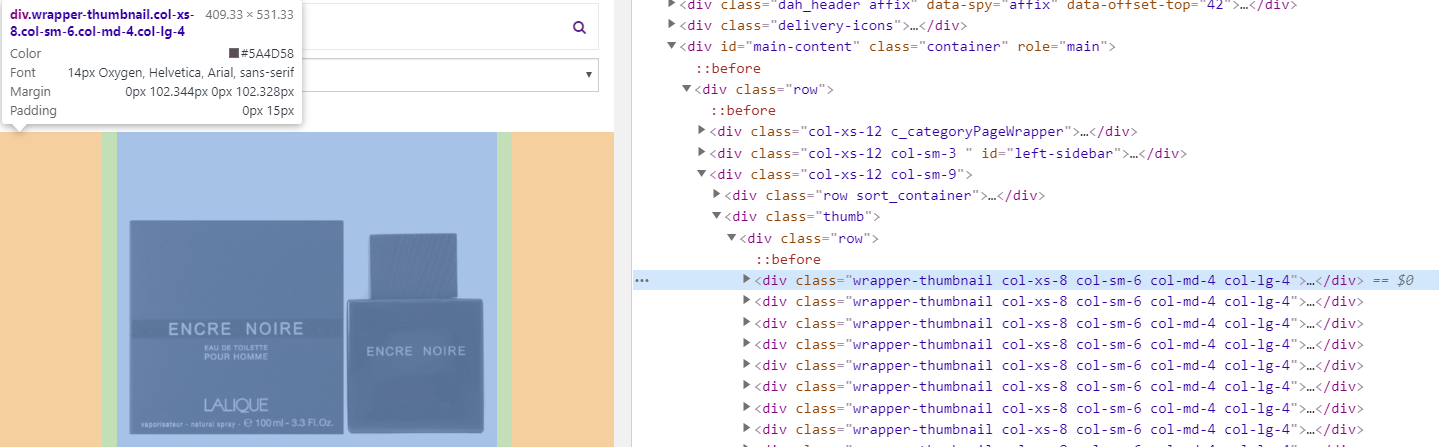

In [72]:
# Find all div elements with class = "wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4"
# Find all div elements with class = "caption"
# Find all h3 elements
# Find all a elements
# Extract the text using test()
names = xpath_selector.xpath('//div[@class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4"]//div[@class="caption"]//h3/a/text()').extract()
names[0:5]

['Encre Noire by Lalique',
 'Whisky for Men by Evaflor',
 'Invictus by Paco Rabanne',
 'Invictus Intense by Paco Rabanne',
 'New West For Him by Aramis']

In [73]:
# Find all div elements with class = "wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4"
# Find all div elements with class = "caption"
# Find all h3 elements
# Find all a elements
# Extract the URL using @href
URL = xpath_selector.xpath('//div[@class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4"]//div[@class="caption"]//h3/a/@href').extract()
URL[0:5]

['https://www.perfumery.com.au/encre-noire-by-lalique.html',
 'https://www.perfumery.com.au/whisky-for-men-by-evaflor.html',
 'https://www.perfumery.com.au/invictus-by-paco-rabanne.html',
 'https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html',
 'https://www.perfumery.com.au/new-west-for-him-by-aramis.html']

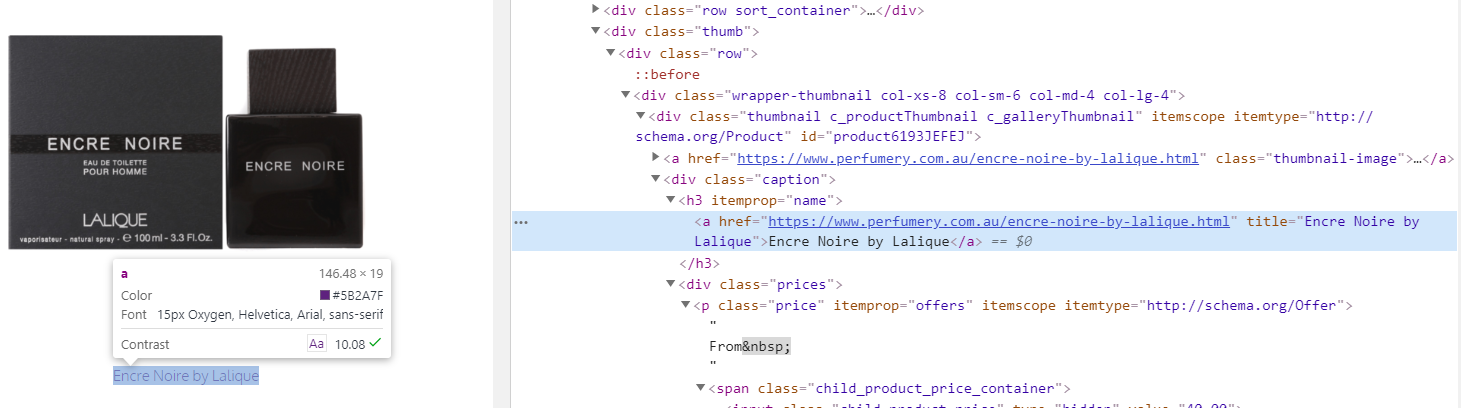

In [74]:
# prices do not exist, despite the website inspector telling us it exists
# Looks like a javascript error, look at selerium example
price = xpath_selector.xpath('//div[@class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4"]//div[@class="caption"]//span/span').extract()
price

[]

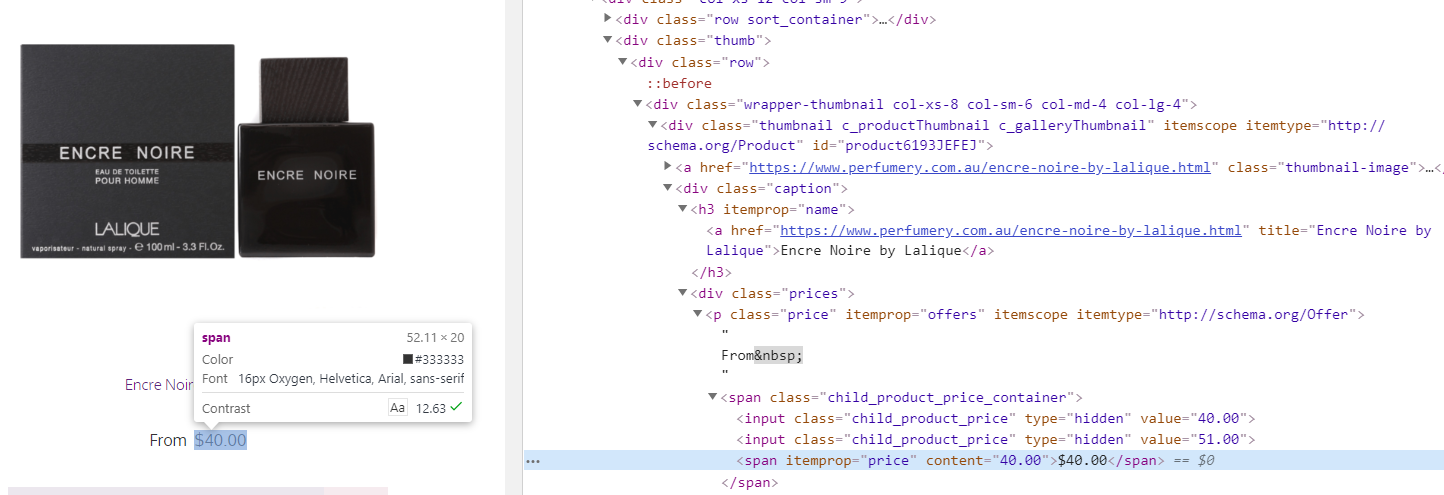

In [75]:
import pandas as pd

# Putting it together
pd.DataFrame({'Product Name':names,'URL':URL}).head(10)

,Product Name,URL
0,Encre Noire by Lalique,https://www.perfumery.com.au/encre-noire-by-la...
1,Whisky for Men by Evaflor,https://www.perfumery.com.au/whisky-for-men-by...
2,Invictus by Paco Rabanne,https://www.perfumery.com.au/invictus-by-paco-...
3,Invictus Intense by Paco Rabanne,https://www.perfumery.com.au/invictus-intense-...
4,New West For Him by Aramis,https://www.perfumery.com.au/new-west-for-him-...
5,Sex Appeal for Men by Jovan,https://www.perfumery.com.au/sex-appeal-for-me...
6,1 Million Lucky by Paco Rabanne,https://www.perfumery.com.au/1-million-lucky-b...
7,Allure Homme by Chanel,https://www.perfumery.com.au/allure-homme-by-c...
8,Aqva Pour Homme Marine by Bvlgari,https://www.perfumery.com.au/aqva-pour-homme-m...
9,Aventus by Creed,https://www.perfumery.com.au/aventus-by-creed....


#### Selenium Javascript Example
* From the Crawl & Fetch Example, we were unable to obtain the prices of the perfume, which was likely due to some sort of javascript issue
* To combat this, we can use `selenium`
* The downside of `selenium` is that its slow, `scrapy's` spiders are much faster but more difficult to use
* First we need download the correct web driver, based on the version of your chrome browser
* [Download the correct Selenium Web Drivers for Chrome and replace the existing web driver in the chromedriver folder](https://sites.google.com/a/chromium.org/chromedriver/downloads)
* https://selenium-python.readthedocs.io/locating-elements.html. This is a good website for locating elements with selenium

In [76]:
from bs4 import BeautifulSoup
from selenium import webdriver

# Creating a chrome browser instance
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")

# Crawling to the webpage
driver.get("https://www.perfumery.com.au/mens/fragrances.html")

In [77]:
# Check the data
driver.page_source[:100]

'<html lang="en" class=""><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n'

In [78]:
# Fetching the html
html_javascript = driver.page_source

In [79]:
# Uncomment in case the website changes
# html_javascript = '<html lang="en" class=""><head>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n<meta name="keywords" content="Fragrances for men, men\'s fragrances">\n<meta name="description" content="Shop fragrances for men online at Perfumery. Select men’s perfume and cologne with free shipping on orders over $99 and a free gift with every purchase.">\n<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=0">\n<meta property="og:image" content="https://www.perfumery.com.au/assets/website_logo.png">\n<meta property="og:title" content="Men’s Fragrances - Perfume For Men - Perfumery">\n<meta property="og:site_name" content="Perfumery">\n<meta property="og:type" content="website">\n<meta property="og:url" content="https://www.perfumery.com.au/mens/fragrances.html">\n<meta property="og:description" content="Shop fragrances for men online at Perfumery. Select men’s perfume and cologne with free shipping on orders over $99 and a free gift with every purchase.">\n<title>Men’s Fragrances - Perfume For Men - Perfumery</title>\n<link rel="canonical" href="https://www.perfumery.com.au/mens/fragrances.html">\n<link rel="shortcut icon" href="https://www.perfumery.com.au/assets/favicon_logo.png">\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick.css?1580165811">\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick-theme.css?1580165811">\n<link class="theme-selector" rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/css/app.css?1580165811" media="all">\n<link rel="stylesheet" type="text/css" href="/assets/themes/frame-2019-10/css/style.css?1580165811" media="all">\n\n<link rel="stylesheet" type="text/css" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css" media="all">\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/jquery_ui/1.11.1/css/custom-theme/jquery-ui-1.8.18.custom.css" media="all">\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/fancybox/2.1.5/jquery.fancybox.css" media="all">\n<!--[if lte IE 8]>\n\t<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/html5shiv/3.7.0/html5shiv.js"></script>\n\t<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/respond.js/1.3.0/respond.min.js"></script>\n<![endif]-->\n\n<script src="https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_US.sMn3oj1Y3cA.O/m=ratingbadge/rt=j/sv=1/d=1/ed=1/am=wQc/rs=AGLTcCN2dfVUHs4zuTf0kWyDefSg5_jNrA/cb=gapi.loaded_0" async=""></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/ec.js"></script><script async="" src="https://chimpstatic.com/mcjs-connected/js/users/1d24111273e4ac08b21a10242/ce81d2ffee9fc1b37cf39956d.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://cdn.livechatinc.com/tracking.js"></script><script src="https://connect.facebook.net/signals/config/2200810056630470?v=next&amp;r=canary" async=""></script><script src="https://connect.facebook.net/signals/plugins/identity.js?v=next" async=""></script><script async="" src="//connect.facebook.net/en_US/fbevents.js "></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-KWZ4HKB"></script><script async="" src="https://app.mailchimpforneto.com/script/perfumery.neto.com.au-121/mc4neto.js"></script><script src="https://js.stripe.com/v3/"></script>\n\n\n<script type="text/javascript">(function(){function f(){var e=document.createElement("script");e.type="text/javascript";e.async=true;e.src="//platform.cloud-iq.com.au/cartrecovery/store.js?app_id=9786";var t = document.getElementsByTagName(\'head\')[0];t.appendChild(e);}f();})();</script><script type="text/javascript" async="" src="//platform.cloud-iq.com.au/cartrecovery/store.js?app_id=9786"></script>\n\n\n<script id="mcjs">window.mc4neto={ty:!1};!function(c,h,i,m,p){m=c.createElement(h),p=c.getElementsByTagName(h)[0],m.async=1,m.src=i,p.parentNode.insertBefore(m,p)}(document,"script","https://app.mailchimpforneto.com/script/perfumery.neto.com.au-121/mc4neto.js");</script>\n\n\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-KWZ4HKB\');\n</script>\n\n\n<script type="text/javascript" async="" src="https://paypal-apac-cdn.cloudiq.com/tag/80682e45-141e-4187-8a05-ea68c1f4a402-k0du5yi0.js"></script><script src="https://cloudiq-corral-prod-cdn.cloudiq.com/tag-modules-obf/entry.js" class="ciqentry" type="text/javascript" async=""></script><script src="https://paypal-apac-cdn.cloudiq.com/tag-modules-obf/v2functions.js" class="ciqv2functions" type="text/javascript" async="" data-readiness="true"></script><script src="https://paypal-apac-cdn.cloudiq.com/tag-modules-obf/ce.js" class="ciqce" type="text/javascript" async="" data-readiness="true"></script><script src="https://paypal-apac-cdn.cloudiq.com/tag-modules-obf/dca.js" class="ciqdca" type="text/javascript" async="" data-readiness="true"></script><style type="text/css">#mc_embed_signup input.mce_inline_error { border-color:#6B0505; } #mc_embed_signup div.mce_inline_error { margin: 0 0 1em 0; padding: 5px 10px; background-color:#6B0505; font-weight: bold; z-index: 1; color:#fff; }</style><style type="text/css">.fancybox-margin{margin-right:17px;}</style></head>\n<body id="n_category" class="n_frame-2019-10" style="zoom: 1;">\n<nav class="navbar navbar-inverse c_navbarWrapper">\n<div class="container">\n<div class="row">\n<div class="navbar-header">\n<button type="button" class="navbar-toggle collapsed mobile-menu-toggle pull-left" data-toggle="collapse" data-target="#navbar-top" aria-expanded="false">\n<span class="sr-only">Toggle navigation</span>\n<span class="icon-bar"></span>\n<span class="icon-bar"></span>\n<span class="icon-bar"></span>\n</button>\n<span class="call">CALL US TODAY <a href="tel:1800101052" class="phone">1800 10 10 52</a></span>\n<div class="text-right c_cartWrapper visible-xs">\n<span class="lv1-li">\n<a href="https://www.perfumery.com.au/_myacct" class="btn btn-default btn-headerAccount btn-transparent">\n<i class="fa fa-user c_headerIcon"></i> My Account\n</a>\n</span>\n<span class="dropdown dropdown-hover" id="header-cart">\n<a href="https://www.perfumery.com.au/_mycart?tkn=cart&amp;ts=1580560596691313" class="btn btn-default btn-headerCart btn-transparent">\n<i class="fa fa-shopping-cart c_headerIcon"></i>\n<span rel="a2c_item_count">0</span>\n</a>\n</span>\n</div>\n</div>\n<div class="collapse navbar-collapse" id="navbar-top">\n<ul class="nav navbar-nav visible-xs c_mobileCategoryWrapper" id="mob-menu">\n<li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-104" class="collapsed mob-drop">\nWomen\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-104" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/womens/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/celebrity.html">\nCelebrity </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/miniatures.html">\nMiniatures, Rollerballs and Vials </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/discontinued.html">\nRare &amp; Unique </a>\n</li><li>\n<a href="https://www.perfumery.com.au/womens/testers.html">\nTesters </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-113" class="collapsed mob-drop">\nMen\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-113" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/mens/after-shaves.html">\nAfter Shaves </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/celebrity.html">\nCelebrity </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/miniatures.html">\nMiniatures, Rollerballs and Vials </a>\n</li><li>\n<a href="https://www.perfumery.com.au/mens/testers.html">\nTesters </a>\n</li><li>\n<a href="https://www.perfumery.com.au/damaged-box/~-108170">\nDamaged Box </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-109" class="collapsed mob-drop">\nBeauty <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-109" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/beauty/bath-body.html">\nBath &amp; Body </a>\n</li>\n</ul>\n</li><li>\n<a href="https://www.perfumery.com.au/rare.html">\nRare &amp; Unique </a>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-107976" class="collapsed mob-drop">\nUnisex <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-107976" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/unisex/body-products.html">\nBody Products </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/fragrances.html">\nFragrances </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/gift-sets.html">\nGift Sets </a>\n</li><li>\n<a href="https://www.perfumery.com.au/unisex/miniatures-vials.html">\nMiniatures &amp; Vials </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-119" class="collapsed mob-drop">\nSpecials <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-119" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/specials/mens/">\nMens </a>\n</li><li>\n<a href="https://www.perfumery.com.au/specials/womens/">\nWomen\'s </a>\n</li>\n</ul>\n</li><li>\n<a data-toggle="collapse" data-parent="#mob-menu" href="#mob-menu-114" class="collapsed mob-drop">\nMore <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul id="mob-menu-114" class="panel-collapse collapse collapse-menu c_mobileSubMenu">\n<li>\n<a href="https://www.perfumery.com.au/more/best-sellers.html">\nBest Sellers </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/candles.html">\nCandles </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/children.html">\nChildren </a>\n</li><li>\n<a href="https://www.perfumery.com.au/more/factice.html">\nFactice </a>\n</li><li>\n<a href="https://www.perfumery.com.au/gift-sets/">\nGift Sets </a>\n</li>\n</ul>\n</li>\n</ul>\n<ul class="nav navbar-nav c_utilityWrapper">\n<li class=""> <a href="/about-us/">About Us </a>\n</li><li class=""> <a href="/buying/buying-guides/">Buying Guides </a>\n</li><li class=""> <a href="/delivery/">Delivery </a>\n</li><li class=""> <a href="/form/contact-us/">Contact Us </a>\n</li>\n</ul>\n</div>\n</div>\n</div>\n</nav>\n<div class="dah_header affix-top" data-spy="affix" data-offset-top="42">\n<div class="wrapper-header">\n<div class="container">\n<div class="row row-header">\n<div class="col-xs-12 col-sm-3 wrapper-logo text-center">\n<a href="https://www.perfumery.com.au" title="Perfumery">\n<img class="logo" src="/assets/website_logo.png" alt="Perfumery" data-gtm-vis-recent-on-screen-12309227_21="541" data-gtm-vis-first-on-screen-12309227_21="542" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">\n</a>\n</div>\n<div class="col-xs-12 col-sm-4">\n<div class="header-search">\n<form name="productsearch" method="get" action="/">\n<input type="hidden" name="rf" value="kw">\n<div class="input-group">\n<input class="form-control ajax_search" value="" id="name_search" autocomplete="off" name="kw" type="text" placeholder="Search..." nsearch-init="yes" nsearch-id="0">\n<span class="input-group-btn">\n<button type="submit" value="Search" class="btn btn-default"><i class="fa fa-search"></i></button>\n</span>\n</div>\n</form>\n</div>\n</div>\n<div class="col-sm-5 text-right c_cartWrapper hidden-xs">\n<div class="lv1-li dropdown dropdown-hover">\n<a href="https://www.perfumery.com.au/_myacct" class="btn btn-default btn-headerAccount btn-transparent">\n<i class="fa fa-user c_headerIcon"></i> My Account <i class="fa fa-angle-down" aria-hidden="true"></i>\n</a>\n<ul class="dropdown-menu pull-right hidden-xs c_myAcctDropdown">\n<li><a href="https://www.perfumery.com.au/_myacct">Account Home</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct#orders">Orders</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/payrec">Pay Invoices</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/favourites">Favourites</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/wishlist">Wishlists</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/warranty">Resolution Centre</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/edit_account">Edit My Details</a></li>\n<li><a href="https://www.perfumery.com.au/_myacct/edit_address">Edit My Address Book</a></li>\n<li class="divider"></li>\n<li> <a href="https://www.perfumery.com.au/_myacct/login" title="Login">Login</a> </li>\n<li> <a href="https://www.perfumery.com.au/_myacct/register" title="Register">Register</a> </li>\n</ul>\n</div>\n<div class="dropdown dropdown-hover" id="header-cart">\n<a href="https://www.perfumery.com.au/_mycart?tkn=cart&amp;ts=1580560596523664" class="btn btn-default btn-headerCart btn-transparent" id="cartcontentsheader">\n<i class="fa fa-shopping-cart c_headerIcon"></i> Cart <span rel="a2c_item_count">0</span>\n<i class="fa fa-angle-down"></i>\n</a>\n<ul class="dropdown-menu">\n<li class="box" id="neto-dropdown">\n<div class="body padding" id="cartcontents"><font class="small">Your shopping cart is empty.\n                     Add items to your cart and they will appear here.</font></div>\n<div class="footer"></div>\n</li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n</div>\n<div class="c_categoryMenuWrapper hidden-xs">\n<div class="c_categoryMenuContainer">\n<ul class="nav navbar-nav category-menu">\n<li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/womens.html" class="ease dropdown-toggle">Women\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/womens/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/celebrity.html" class="ease nuhover dropdown-toggle">Celebrity</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/miniatures.html" class="ease nuhover dropdown-toggle">Miniatures, Rollerballs and Vials</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/discontinued.html" class="ease nuhover dropdown-toggle">Rare &amp; Unique</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/womens/testers.html" class="ease nuhover dropdown-toggle">Testers</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/mens.html" class="ease dropdown-toggle">Men\'s <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/mens/after-shaves.html" class="ease nuhover dropdown-toggle">After Shaves</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/celebrity.html" class="ease nuhover dropdown-toggle">Celebrity</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/miniatures.html" class="ease nuhover dropdown-toggle">Miniatures, Rollerballs and Vials</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/mens/testers.html" class="ease nuhover dropdown-toggle">Testers</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/damaged-box/~-108170" class="ease nuhover dropdown-toggle">Damaged Box</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/beauty.html" class="ease dropdown-toggle">Beauty <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/beauty/bath-body.html" class="ease nuhover dropdown-toggle">Bath &amp; Body</a>\n</li>\n</ul>\n</li><li class=""> <a href="https://www.perfumery.com.au/rare.html" class="ease ">Rare &amp; Unique </a>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/unisex.html" class="ease dropdown-toggle">Unisex <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/unisex/body-products.html" class="ease nuhover dropdown-toggle">Body Products</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/fragrances.html" class="ease nuhover dropdown-toggle">Fragrances</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/gift-sets.html" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/unisex/miniatures-vials.html" class="ease nuhover dropdown-toggle">Miniatures &amp; Vials</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/specials.html" class="ease dropdown-toggle">Specials <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/specials/mens/" class="ease nuhover dropdown-toggle">Mens</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/specials/womens/" class="ease nuhover dropdown-toggle">Women\'s</a>\n</li>\n</ul>\n</li><li class="dropdown dropdown-hover"> <a href="https://www.perfumery.com.au/more.html" class="ease dropdown-toggle">More <i class="fa fa-angle-down" aria-hidden="true"></i></a>\n<ul class="dropdown-menu c_level2">\n<li class=""> <a href="https://www.perfumery.com.au/more/best-sellers.html" class="ease nuhover dropdown-toggle">Best Sellers</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/candles.html" class="ease nuhover dropdown-toggle">Candles</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/children.html" class="ease nuhover dropdown-toggle">Children</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/more/factice.html" class="ease nuhover dropdown-toggle">Factice</a>\n</li><li class=""> <a href="https://www.perfumery.com.au/gift-sets/" class="ease nuhover dropdown-toggle">Gift Sets</a>\n</li>\n</ul>\n</li>\n<li><a href="https://www.perfumery.com.au/brands">BRANDS</a></li>\n</ul>\n</div>\n</div>\n</div>\n<div class="delivery-icons">\n<p style="text-align: center;"><img alt="" src="/assets/images/icon-truck-purple.svg" style="width: 30px; margin-top: 2px; height: 30px;" data-gtm-vis-recent-on-screen-12309227_21="542" data-gtm-vis-first-on-screen-12309227_21="542" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">&nbsp; &nbsp; <span style="font-size:11px;">Free Shipping on Orders over $99&nbsp;</span> &nbsp; &nbsp; <img alt="" src="/assets/images/icon-warehouse-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" data-gtm-vis-recent-on-screen-12309227_21="542" data-gtm-vis-first-on-screen-12309227_21="542" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">&nbsp; &nbsp; <span style="font-size:11px;">Sydney Warehouse</span>&nbsp; &nbsp; &nbsp; <img alt="" src="/assets/images/icon-check-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" data-gtm-vis-recent-on-screen-12309227_21="542" data-gtm-vis-first-on-screen-12309227_21="542" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">&nbsp; &nbsp; <span style="font-size:11px;">Guaranteed Genuine</span> &nbsp; &nbsp;&nbsp; <img alt="" src="/assets/images/icon-gift-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" data-gtm-vis-recent-on-screen-12309227_21="543" data-gtm-vis-first-on-screen-12309227_21="543" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">&nbsp;&nbsp;&nbsp; <span style="font-size:11px;">Free Gift with Every Purchase</span>&nbsp;&nbsp;&nbsp; <img alt="" src="/assets/images/icon-cart-purple.svg" style="width: 26px; margin-top: -1px; height: 26px;" data-gtm-vis-recent-on-screen-12309227_21="543" data-gtm-vis-first-on-screen-12309227_21="543" data-gtm-vis-total-visible-time-12309227_21="500" data-gtm-vis-has-fired-12309227_21="1">&nbsp;&nbsp;&nbsp; <span style="font-size:11px;">Buy Now. Pay Later</span></p>\n\n</div>\n<div id="main-content" class="container" role="main">\n<div class="row">\n<div class="col-xs-12 c_categoryPageWrapper">\n<ul class="breadcrumb" itemscope="" itemtype="http://schema.org/BreadcrumbList">\n<li itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">\n<a href="https://www.perfumery.com.au" itemprop="item"><span itemprop="name">Home</span></a>\n</li><li itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">\n<a href="/mens.html" itemprop="item"><span itemprop="name">Men\'s</span></a>\n</li><li itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">\n<a href="/mens/fragrances.html" itemprop="item"><span itemprop="name">Fragrances</span></a>\n</li></ul>\n<hr>\n<h1 class="page-header">\nFragrances\n</h1>\n<div class="responsive-content">\n<p>\n</p>\n<h3>Men\'s Fragrances</h3>\n<p>As Australia’s premium <a href="https://www.perfumery.com.au/">online perfume</a> shop, Perfumery carries an extensive selection of male fragrances with over 3,000 products from leading brands including Jean Paul Gautier, Christian Dior and Hugo Boss, all at affordable discount prices.</p>\n<p>Buy aftershave, cologne, fragrances and <a href="https://www.perfumery.com.au/mens.html">perfume for men</a> online. If you purchase over $100 we will deliver for free!</p>\n<p>Have a browse through our perfumes for men today and discover how cheap and easy it can be to buy luxury fragrances.</p>\n<p>You can order perfume for men online, alternatively call us on 1800 101 052 to place your order over the phone.</p>\n</div>\n<hr>\n</div>\n<div class="col-xs-12 col-sm-3 " id="left-sidebar">\n<div class="panel panel-default">\n<div class="panel-heading panel-heading-thumbnails">\n<h3 class="panel-title">\n<a class="accordion-toggle title-inline" data-toggle="collapse" data-parent="#filters-accordion" href="#filters">Filter Products</a>\n</h3>\n</div>\n<ul id="filters" class="panel-collapse collapse list-group">\n<li class="list-group-item filter-title" data-filtercode="stock">\n<h4><i class="fa fa-angle-down pull-right"></i> Filter By Stock</h4>\n</li><li class="filter" data-filtercode="stock" style="display: none;">\n<a href="/mens/fragrances.html?rf=vn&amp;vn=1" class="list-group-item">In Stock <span class="text-muted">(271)</span></a>\n</li>\n<li class="list-group-item hidden-md hidden-lg filter-title" data-filtercode="price"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Price Range </h4></li><li class="filter hidden-md hidden-lg price-range" data-filtercode="price" style="display: none;"><a class="list-group-item" href="/mens/fragrances.html?pr=0-100&amp;rf=pr">$100 or below</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price" style="display: none;"><a class="list-group-item" href="/mens/fragrances.html?pr=100-175&amp;rf=pr">$100 to $175</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price" style="display: none;"><a class="list-group-item" href="/mens/fragrances.html?pr=175-250&amp;rf=pr">$175 to $250</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price" style="display: none;"><a class="list-group-item" href="/mens/fragrances.html?pr=250-325&amp;rf=pr">$250 to $325</a></li>\n<li class="filter hidden-md hidden-lg price-range" data-filtercode="price" style="display: none;"><a class="list-group-item" href="/mens/fragrances.html?pr=325-0&amp;rf=pr">$325 or above</a></li>\n<li class="list-group-item hidden-sm hidden-xs filter-title" data-filtercode="price-lg"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Price Range</h4></li>\n<li class="list-group-item hidden-sm hidden-xs price-range-lg" data-filtercode="price-lg" style="display: none;"><p id="price-range" class="ui-slider ui-slider-horizontal ui-widget ui-widget-content ui-corner-all"><div class="ui-slider-range ui-widget-header ui-corner-all" style="left: 0%; width: 100%;"></div><span class="ui-slider-handle ui-state-default ui-corner-all" tabindex="0" style="left: 0%;"></span><span class="ui-slider-handle ui-state-default ui-corner-all" tabindex="0" style="left: 100%;"></span></p>\n<p id="price-range-text" class="price_range">$2 to $490</p>\n<form id="pricesearch" method="get" action="/mens/fragrances.html">\n<input type="hidden" name="rf" value="pr?rf=pr">\n<input name="pr" type="hidden" value="2-490">\n<input type="submit" value="Filter By Price" class="btn btn-default btn-xs">\n<a href="/mens/fragrances.html?df=pr&amp;rf=pr" class="btn btn-default btn-xs" rel="nofollow"> clear</a>\n</form>\n</li>\n<li class="list-group-item filter-title" data-filtercode="brand"><h4><i class="fa fa-angle-down pull-right"></i> Filter By Brand</h4></li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107823&amp;rf=cn" class="list-group-item">Abercrombie &amp; Fitch <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107585&amp;rf=cn" class="list-group-item">Alfred Sung <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107763&amp;rf=cn" class="list-group-item">Alyssa Ashley <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107586&amp;rf=cn" class="list-group-item">Amouage <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107588&amp;rf=cn" class="list-group-item">Annick Goutal <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107764&amp;rf=cn" class="list-group-item">Antonio Banderas <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107589&amp;rf=cn" class="list-group-item">Antonio Puig <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107590&amp;rf=cn" class="list-group-item">Aquolina <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107591&amp;rf=cn" class="list-group-item">Aramis <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107593&amp;rf=cn" class="list-group-item">Azzaro <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107826&amp;rf=cn" class="list-group-item">Baldessarini Hugo Boss <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107597&amp;rf=cn" class="list-group-item">Beckham <span class="text-muted">(5)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107600&amp;rf=cn" class="list-group-item">Bottega Veneta <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107601&amp;rf=cn" class="list-group-item">Boucheron <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107604&amp;rf=cn" class="list-group-item">Burberry <span class="text-muted">(6)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107605&amp;rf=cn" class="list-group-item">Bvlgari <span class="text-muted">(9)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107607&amp;rf=cn" class="list-group-item">Byredo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107609&amp;rf=cn" class="list-group-item">Calvin Klein <span class="text-muted">(11)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107611&amp;rf=cn" class="list-group-item">Carolina Herrera <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107612&amp;rf=cn" class="list-group-item">Caron <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107613&amp;rf=cn" class="list-group-item">Cartier <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107616&amp;rf=cn" class="list-group-item">Chanel <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=106&amp;rf=cn" class="list-group-item">Clinique <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107903&amp;rf=cn" class="list-group-item">Coach <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107622&amp;rf=cn" class="list-group-item">Cosmo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107625&amp;rf=cn" class="list-group-item">Creed <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107627&amp;rf=cn" class="list-group-item">Dana <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107628&amp;rf=cn" class="list-group-item">David Beckham <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107629&amp;rf=cn" class="list-group-item">Davidoff <span class="text-muted">(6)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107631&amp;rf=cn" class="list-group-item">Diesel <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107632&amp;rf=cn" class="list-group-item">Dior <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107634&amp;rf=cn" class="list-group-item">Dolce &amp; Gabbana <span class="text-muted">(8)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107637&amp;rf=cn" class="list-group-item">Dunhill <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107776&amp;rf=cn" class="list-group-item">Escada <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=108175&amp;rf=cn" class="list-group-item">Escentric Molecules <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=108139&amp;rf=cn" class="list-group-item">Evaflor <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107905&amp;rf=cn" class="list-group-item">Geoffrey Beene <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107648&amp;rf=cn" class="list-group-item">Giorgio Armani <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107650&amp;rf=cn" class="list-group-item">Givenchy <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107653&amp;rf=cn" class="list-group-item">Gucci <span class="text-muted">(3)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=103&amp;rf=cn" class="list-group-item">Guerlain <span class="text-muted">(5)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107654&amp;rf=cn" class="list-group-item">Guess <span class="text-muted">(4)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107655&amp;rf=cn" class="list-group-item">Guy Laroche <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107656&amp;rf=cn" class="list-group-item">Hermes <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107657&amp;rf=cn" class="list-group-item">Hollister <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107659&amp;rf=cn" class="list-group-item">Hugo Boss <span class="text-muted">(15)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107660&amp;rf=cn" class="list-group-item">Hummer <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107661&amp;rf=cn" class="list-group-item">Issey Miyake <span class="text-muted">(1)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107663&amp;rf=cn" class="list-group-item">Jacomo <span class="text-muted">(2)</span></a>\n</li><li class="filter" data-filtercode="brand" style="display: none;">\n<a href="/mens/fragrances.html?cn=107664&amp;rf=cn" class="list-group-item">Jacques Bogart <span class="text-muted">(4)</span></a>\n</li><li class="lv1" data-filtercode="brand"><a class="list-group-item" href="https://www.perfumery.com.au/brands">Show all brands...</a></li>\n</ul>\n</div>\n<div class="panel panel-default hidden-xs  categories-block ">\n<div class="panel-heading"><h3 class="panel-title">Categories</h3></div>\n<ul class="list-group"><li class=""><a href="https://www.perfumery.com.au/womens.html" class="has-next-level ">\nWomen\'s\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/womens/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/celebrity.html" class="">Celebrity </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/miniatures.html" class="">Miniatures, Rollerballs and Vials </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/discontinued.html" class="">Rare &amp; Unique </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/womens/testers.html" class="">Testers </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/mens.html" class="has-next-level ">\nMen\'s\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="">\n<li class="second">\n<a href="https://www.perfumery.com.au/mens/after-shaves.html" class="">After Shaves </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/celebrity.html" class="">Celebrity </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/miniatures.html" class="">Miniatures, Rollerballs and Vials </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/mens/testers.html" class="">Testers </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/damaged-box/~-108170" class="">Damaged Box </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/beauty.html" class="has-next-level ">\nBeauty\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/beauty/bath-body.html" class="">Bath &amp; Body </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/rare.html" class="">\nRare &amp; Unique\n</a>\n</li><li class=""><a href="https://www.perfumery.com.au/unisex.html" class="has-next-level ">\nUnisex\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/unisex/body-products.html" class="">Body Products </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/fragrances.html" class="">Fragrances </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/gift-sets.html" class="">Gift Sets </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/unisex/miniatures-vials.html" class="">Miniatures &amp; Vials </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/specials.html" class="has-next-level ">\nSpecials\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/specials/mens/" class="">Mens </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/specials/womens/" class="">Women\'s </a>\n</li>\n</ul>\n</li><li class=""><a href="https://www.perfumery.com.au/more.html" class="has-next-level ">\nMore\n<i class="fa fa-angle-down pull-right"></i></a>\n<ul id="  " class="" style="display: none">\n<li class="second">\n<a href="https://www.perfumery.com.au/more/best-sellers.html" class="">Best Sellers </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/candles.html" class="">Candles </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/children.html" class="">Children </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/more/factice.html" class="">Factice </a>\n</li><li class="second">\n<a href="https://www.perfumery.com.au/gift-sets/" class="">Gift Sets </a>\n</li>\n</ul>\n</li></ul>\n</div>\n<div class="panel panel-default hidden-xs">\n<div class="panel-heading"><h3 class="panel-title">Information</h3></div>\n<ul class="list-group"><li class=""><a class="list-group-item" href="/about-us/">About Us</a>\n</li><li class=""><a class="list-group-item" href="/returns-policy/">Returns Policy</a>\n</li><li class=""><a class="list-group-item" href="/form/contact-us/">Contact Us</a>\n</li></ul>\n</div>\n</div>\n<div class="col-xs-12 col-sm-9">\n<div class="row sort_container">\n<div class="hidden-xs col-sm-4">\n<script language="javascript" type="text/javascript">\n\t\t\t\tfunction viewtype(view) {\n\t\t\t\t\tvar f=document.viewForm;\n\t\t\t\t\tf[\'viewby\'].value=view;\n\t\t\t\t\tf.submit();\n\t\t\t\t}\n\t\t\t</script>\n<form method="get" name="viewForm" action="/mens/fragrances.html" class="hidden">\n<input name="rf" type="hidden" value="">\n<input name="viewby" type="hidden" value="">\n</form>\n<div class="viewby btn-group">\n<a href="javascript:viewtype(\'\');" class="btn btn-default active" rel="nofollow">\n<i class="fa fa-th"></i>\n</a>\n<a href="javascript:viewtype(\'list\');" class="btn btn-default " rel="nofollow">\n<i class="fa fa-th-list"></i>\n</a>\n</div>\n</div>\n<div class="col-md-4 hidden-xs hidden-sm">\n<div class="btn-text">\n<strong>271</strong> Products&nbsp;Found\n</div>\n</div>\n<div class="col-xs-12 col-sm-8 col-md-4">\n<form method="get" class="form-horizontal" action="/mens/fragrances.html">\n<input name="rf" type="hidden" value="">\n<div class="form-group">\n<label class="control-label col-xs-2">Sort</label>\n<div class="col-xs-10">\n<select name="sortby" onchange="return this.form.submit();" class="form-control">\n<option value="popular" selected="">\nMost Popular\n</option>\n<option value="name">\nName\n</option>\n<option value="SKU">\nSKU\n</option>\n<option value="lowest_price">\nLowest Price\n</option>\n<option value="highest_price">\nHighest Price\n</option>\n</select>\n</div>\n</div>\n</form>\n</div>\n</div>\n<div class="thumb">\n<div class="row"><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product6193UdSWQ">\n<a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002309.png?1579752935" class="product-image" alt="Encre Noire by Lalique" rel="itmimgSKU002309">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" title="Encre Noire by Lalique">Encre Noire by Lalique</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="40.00">\n<input class="child_product_price" type="hidden" value="51.00">\n<span itemprop="price" content="40.00">$40.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuUdSWQSKU002309" name="skuUdSWQSKU002309" value="SKU002309">\n<input type="hidden" id="modelUdSWQSKU002309" name="modelUdSWQSKU002309" value="Encre Noire by Lalique">\n<input type="hidden" id="thumbUdSWQSKU002309" name="thumbUdSWQSKU002309" value="/assets/thumb/SKU002309.png?1579752934">\n<input type="hidden" id="qtyUdSWQSKU002309" name="qtyUdSWQSKU002309" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/encre-noire-by-lalique.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002309"><span class="add" rel="wishlist_textSKU002309"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Encre Noire by Lalique" data-ga-id="SKU002309" data-ga-list="category" data-ga-price="40.00" data-ga-brand="Lalique" data-ga-position="0"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5023LyNfE">\n<a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000558.jpg?1503460311" class="product-image" alt="Obsession for Men by Calvin Klein" rel="itmimgSKU000558">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" title="Obsession for Men by Calvin Klein">Obsession for Men by Calvin Klein</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="38.00">\n<input class="child_product_price" type="hidden" value="36.00">\n<span itemprop="price" content="36.00">$36.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuLyNfESKU000558" name="skuLyNfESKU000558" value="SKU000558">\n<input type="hidden" id="modelLyNfESKU000558" name="modelLyNfESKU000558" value="Obsession for Men by Calvin Klein">\n<input type="hidden" id="thumbLyNfESKU000558" name="thumbLyNfESKU000558" value="/assets/thumb/SKU000558.jpg?1503460311">\n<input type="hidden" id="qtyLyNfESKU000558" name="qtyLyNfESKU000558" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/obsession-for-men-by-calvin-klein.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000558"><span class="add" rel="wishlist_textSKU000558"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Obsession for Men by Calvin Klein" data-ga-id="SKU000558" data-ga-list="category" data-ga-price="36.00" data-ga-brand="Calvin Klein" data-ga-position="1"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product48890h1oK">\n<a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000399.jpg?1503460371" class="product-image" alt="Hugo Man by Hugo Boss" rel="itmimgSKU000399">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" title="Hugo Man by Hugo Boss">Hugo Man by Hugo Boss</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="54.00">\n<input class="child_product_price" type="hidden" value="41.00">\n<input class="child_product_price" type="hidden" value="49.00">\n<span itemprop="price" content="41.00">$41.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku0h1oKSKU000399" name="sku0h1oKSKU000399" value="SKU000399">\n<input type="hidden" id="model0h1oKSKU000399" name="model0h1oKSKU000399" value="Hugo Man by Hugo Boss">\n<input type="hidden" id="thumb0h1oKSKU000399" name="thumb0h1oKSKU000399" value="/assets/thumb/SKU000399.jpg?1503460371">\n<input type="hidden" id="qty0h1oKSKU000399" name="qty0h1oKSKU000399" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/hugo-man-by-hugo-boss.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000399"><span class="add" rel="wishlist_textSKU000399"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Hugo Man by Hugo Boss" data-ga-id="SKU000399" data-ga-list="category" data-ga-price="41.00" data-ga-brand="Hugo Boss" data-ga-position="2"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4941MqVV8">\n<a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000466.jpg?1503460406" class="product-image" alt="Kouros by Yves Saint Laurent" rel="itmimgSKU000466">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" title="Kouros by Yves Saint Laurent">Kouros by Yves Saint Laurent</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="92.00">\n<span itemprop="price" content="92.00">$92.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuMqVV8SKU000466" name="skuMqVV8SKU000466" value="SKU000466">\n<input type="hidden" id="modelMqVV8SKU000466" name="modelMqVV8SKU000466" value="Kouros by Yves Saint Laurent">\n<input type="hidden" id="thumbMqVV8SKU000466" name="thumbMqVV8SKU000466" value="/assets/thumb/SKU000466.jpg?1503460406">\n<input type="hidden" id="qtyMqVV8SKU000466" name="qtyMqVV8SKU000466" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/kouros-by-yves-saint-laurent.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000466"><span class="add" rel="wishlist_textSKU000466"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Kouros by Yves Saint Laurent" data-ga-id="SKU000466" data-ga-list="category" data-ga-price="35.00" data-ga-brand="Yves Saint Laurent" data-ga-position="3"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4593TLhLL">\n<a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000016.jpg?1503459180" class="product-image" alt="Acqua Di Gio Pour Homme by Giorgio Armani" rel="itmimgSKU000016">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" title="Acqua Di Gio Pour Homme by Giorgio Armani">Acqua Di Gio Pour Homme by Giorgio Armani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="41.00">\n<input class="child_product_price" type="hidden" value="31.00">\n<input class="child_product_price" type="hidden" value="121.00">\n<input class="child_product_price" type="hidden" value="40.00">\n<input class="child_product_price" type="hidden" value="73.00">\n<span itemprop="price" content="31.00">$31.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuTLhLLSKU000016" name="skuTLhLLSKU000016" value="SKU000016">\n<input type="hidden" id="modelTLhLLSKU000016" name="modelTLhLLSKU000016" value="Acqua Di Gio Pour Homme by Giorgio Armani">\n<input type="hidden" id="thumbTLhLLSKU000016" name="thumbTLhLLSKU000016" value="/assets/thumb/SKU000016.jpg?1503459180">\n<input type="hidden" id="qtyTLhLLSKU000016" name="qtyTLhLLSKU000016" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/acqua-di-gio-pour-homme-by-giorgio-armani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000016"><span class="add" rel="wishlist_textSKU000016"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Acqua Di Gio Pour Homme by Giorgio Armani" data-ga-id="SKU000016" data-ga-list="category" data-ga-price="31.00" data-ga-brand="Giorgio Armani" data-ga-position="4"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product6501uGOMc">\n<a href="https://www.perfumery.com.au/aventus-by-creed.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002702.jpg?1574648578" class="product-image" alt="Aventus by Creed" rel="itmimgSKU002702">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/aventus-by-creed.html" title="Aventus by Creed">Aventus by Creed</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="490.00">\n<span itemprop="price" content="490.00">$490.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuuGOMcSKU002702" name="skuuGOMcSKU002702" value="SKU002702">\n<input type="hidden" id="modeluGOMcSKU002702" name="modeluGOMcSKU002702" value="Aventus by Creed">\n<input type="hidden" id="thumbuGOMcSKU002702" name="thumbuGOMcSKU002702" value="/assets/thumb/SKU002702.jpg?1574648578">\n<input type="hidden" id="qtyuGOMcSKU002702" name="qtyuGOMcSKU002702" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/aventus-by-creed.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002702"><span class="add" rel="wishlist_textSKU002702"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Aventus by Creed" data-ga-id="SKU002702" data-ga-list="category" data-ga-price="490.00" data-ga-brand="Creed" data-ga-position="5"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5898i7mlg">\n<a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001729.jpg?1503461124" class="product-image" alt="Jaipur Homme by Boucheron" rel="itmimgSKU001729">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" title="Jaipur Homme by Boucheron">Jaipur Homme by Boucheron</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="58.00">\n<span itemprop="price" content="58.00">$58.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skui7mlgSKU001729" name="skui7mlgSKU001729" value="SKU001729">\n<input type="hidden" id="modeli7mlgSKU001729" name="modeli7mlgSKU001729" value="Jaipur Homme by Boucheron">\n<input type="hidden" id="thumbi7mlgSKU001729" name="thumbi7mlgSKU001729" value="/assets/thumb/SKU001729.jpg?1503461124">\n<input type="hidden" id="qtyi7mlgSKU001729" name="qtyi7mlgSKU001729" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/jaipur-homme-by-boucheron.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001729"><span class="add" rel="wishlist_textSKU001729"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Jaipur Homme by Boucheron" data-ga-id="SKU001729" data-ga-list="category" data-ga-price="58.00" data-ga-brand="Boucheron" data-ga-position="6"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product53182v8WQ">\n<a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000900.jpg?1503460320" class="product-image" alt="Narciso Rodriguez For Him by Narciso Rodriguez" rel="itmimgSKU000900">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" title="Narciso Rodriguez For Him by Narciso Rodriguez">Narciso Rodriguez For Him by Narciso Rodriguez</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="55.00">\n<span itemprop="price" content="55.00">$55.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku2v8WQSKU000900" name="sku2v8WQSKU000900" value="SKU000900">\n<input type="hidden" id="model2v8WQSKU000900" name="model2v8WQSKU000900" value="Narciso Rodriguez For Him by Narciso Rodriguez">\n<input type="hidden" id="thumb2v8WQSKU000900" name="thumb2v8WQSKU000900" value="/assets/thumb/SKU000900.jpg?1503460320">\n<input type="hidden" id="qty2v8WQSKU000900" name="qty2v8WQSKU000900" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/narciso-rodriguez-for-him-by-narciso-rodriguez.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000900"><span class="add" rel="wishlist_textSKU000900"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Narciso Rodriguez For Him by Narciso Rodriguez" data-ga-id="SKU000900" data-ga-list="category" data-ga-price="55.00" data-ga-brand="Narciso Rodriguez" data-ga-position="7"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5209Io3Oa">\n<a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000762.jpg?1503460278" class="product-image" alt="Vetiver by Guerlain" rel="itmimgSKU000762">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" title="Vetiver by Guerlain">Vetiver by Guerlain</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="65.00">\n<span itemprop="price" content="65.00">$65.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuIo3OaSKU000762" name="skuIo3OaSKU000762" value="SKU000762">\n<input type="hidden" id="modelIo3OaSKU000762" name="modelIo3OaSKU000762" value="Vetiver by Guerlain">\n<input type="hidden" id="thumbIo3OaSKU000762" name="thumbIo3OaSKU000762" value="/assets/thumb/SKU000762.jpg?1503460278">\n<input type="hidden" id="qtyIo3OaSKU000762" name="qtyIo3OaSKU000762" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/vetiver-by-guerlain.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000762"><span class="add" rel="wishlist_textSKU000762"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Vetiver by Guerlain" data-ga-id="SKU000762" data-ga-list="category" data-ga-price="40.00" data-ga-brand="Guerlain" data-ga-position="8"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product50055kFCk">\n<a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000537.jpg?1503460243" class="product-image" alt="Whisky for Men by Evaflor" rel="itmimgSKU000537">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" title="Whisky for Men by Evaflor">Whisky for Men by Evaflor</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="15.00">\n<span itemprop="price" content="15.00">$15.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku5kFCkSKU000537" name="sku5kFCkSKU000537" value="SKU000537">\n<input type="hidden" id="model5kFCkSKU000537" name="model5kFCkSKU000537" value="Whisky for Men by Evaflor">\n<input type="hidden" id="thumb5kFCkSKU000537" name="thumb5kFCkSKU000537" value="/assets/thumb/SKU000537.jpg?1503460242">\n<input type="hidden" id="qty5kFCkSKU000537" name="qty5kFCkSKU000537" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/whisky-for-men-by-evaflor.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000537"><span class="add" rel="wishlist_textSKU000537"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Whisky for Men by Evaflor" data-ga-id="SKU000537" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Evaflor" data-ga-position="9"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5132wjGQR">\n<a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000678.jpg?1503460357" class="product-image" alt="212 Sexy Men by Carolina Herrera" rel="itmimgSKU000678">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" title="212 Sexy Men by Carolina Herrera">212 Sexy Men by Carolina Herrera</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="110.00">\n<span itemprop="price" content="110.00">$110.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuwjGQRSKU000678" name="skuwjGQRSKU000678" value="SKU000678">\n<input type="hidden" id="modelwjGQRSKU000678" name="modelwjGQRSKU000678" value="212 Sexy Men by Carolina Herrera">\n<input type="hidden" id="thumbwjGQRSKU000678" name="thumbwjGQRSKU000678" value="/assets/thumb/SKU000678.jpg?1503460357">\n<input type="hidden" id="qtywjGQRSKU000678" name="qtywjGQRSKU000678" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/212-sexy-men-by-carolina-herrera.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000678"><span class="add" rel="wishlist_textSKU000678"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="212 Sexy Men by Carolina Herrera" data-ga-id="SKU000678" data-ga-list="category" data-ga-price="110.00" data-ga-brand="Carolina Herrera" data-ga-position="10"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4597r4HB6">\n<a href="https://www.perfumery.com.au/agua-brava-by-puig.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000020.jpg?1503460495" class="product-image" alt="Agua Brava by Puig" rel="itmimgSKU000020">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/agua-brava-by-puig.html" title="Agua Brava by Puig">Agua Brava by Puig</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="24.00">\n<span itemprop="price" content="24.00">$24.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skur4HB6SKU000020" name="skur4HB6SKU000020" value="SKU000020">\n<input type="hidden" id="modelr4HB6SKU000020" name="modelr4HB6SKU000020" value="Agua Brava by Puig">\n<input type="hidden" id="thumbr4HB6SKU000020" name="thumbr4HB6SKU000020" value="/assets/thumb/SKU000020.jpg?1503460495">\n<input type="hidden" id="qtyr4HB6SKU000020" name="qtyr4HB6SKU000020" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/agua-brava-by-puig.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000020"><span class="add" rel="wishlist_textSKU000020"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Agua Brava by Puig" data-ga-id="SKU000020" data-ga-list="category" data-ga-price="24.00" data-ga-brand="Antonio Puig" data-ga-position="11"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4613QuvP8">\n<a href="https://www.perfumery.com.au/aramis-by-aramis.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000045.jpg?1503459465" class="product-image" alt="Aramis by Aramis" rel="itmimgSKU000045">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/aramis-by-aramis.html" title="Aramis by Aramis">Aramis by Aramis</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="41.00">\n<span itemprop="price" content="41.00">$41.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuQuvP8SKU000045" name="skuQuvP8SKU000045" value="SKU000045">\n<input type="hidden" id="modelQuvP8SKU000045" name="modelQuvP8SKU000045" value="Aramis by Aramis">\n<input type="hidden" id="thumbQuvP8SKU000045" name="thumbQuvP8SKU000045" value="/assets/thumb/SKU000045.jpg?1503459464">\n<input type="hidden" id="qtyQuvP8SKU000045" name="qtyQuvP8SKU000045" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/aramis-by-aramis.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000045"><span class="add" rel="wishlist_textSKU000045"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Aramis by Aramis" data-ga-id="SKU000045" data-ga-list="category" data-ga-price="41.00" data-ga-brand="Aramis" data-ga-position="12"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product67079ORTX">\n<a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002921.jpg?1503462576" class="product-image" alt="Armani Code Profumo by Giorgio Armani" rel="itmimgSKU002921">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" title="Armani Code Profumo by Giorgio Armani">Armani Code Profumo by Giorgio Armani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="147.00">\n<span itemprop="price" content="147.00">$147.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku9ORTXSKU002921" name="sku9ORTXSKU002921" value="SKU002921">\n<input type="hidden" id="model9ORTXSKU002921" name="model9ORTXSKU002921" value="Armani Code Profumo by Giorgio Armani">\n<input type="hidden" id="thumb9ORTXSKU002921" name="thumb9ORTXSKU002921" value="/assets/thumb/SKU002921.jpg?1503462575">\n<input type="hidden" id="qty9ORTXSKU002921" name="qty9ORTXSKU002921" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/armani-code-profumo-by-giorgio-armani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002921"><span class="add" rel="wishlist_textSKU002921"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Armani Code Profumo by Giorgio Armani" data-ga-id="SKU002921" data-ga-list="category" data-ga-price="147.00" data-ga-brand="Giorgio Armani" data-ga-position="13"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4645UJuch">\n<a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000079.jpg?1503459845" class="product-image" alt="Black XS by Paco Rabanne" rel="itmimgSKU000079">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" title="Black XS by Paco Rabanne">Black XS by Paco Rabanne</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="66.00">\n<input class="child_product_price" type="hidden" value="15.00">\n<span itemprop="price" content="15.00">$15.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuUJuchSKU000079" name="skuUJuchSKU000079" value="SKU000079">\n<input type="hidden" id="modelUJuchSKU000079" name="modelUJuchSKU000079" value="Black XS by Paco Rabanne">\n<input type="hidden" id="thumbUJuchSKU000079" name="thumbUJuchSKU000079" value="/assets/thumb/SKU000079.jpg?1503459845">\n<input type="hidden" id="qtyUJuchSKU000079" name="qtyUJuchSKU000079" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/black-xs-by-paco-rabanne.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000079"><span class="add" rel="wishlist_textSKU000079"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Black XS by Paco Rabanne" data-ga-id="SKU000079" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Paco Rabanne" data-ga-position="14"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5542LjIdq">\n<a href="https://www.perfumery.com.au/bleu-by-chanel.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001211.jpg?1503461190" class="product-image" alt="Bleu By Chanel" rel="itmimgSKU001211">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/bleu-by-chanel.html" title="Bleu By Chanel">Bleu By Chanel</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="140.00">\n<input class="child_product_price" type="hidden" value="1001.00">\n<span itemprop="price" content="140.00">$140.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuLjIdqSKU001211" name="skuLjIdqSKU001211" value="SKU001211">\n<input type="hidden" id="modelLjIdqSKU001211" name="modelLjIdqSKU001211" value="Bleu By Chanel">\n<input type="hidden" id="thumbLjIdqSKU001211" name="thumbLjIdqSKU001211" value="/assets/thumb/SKU001211.jpg?1503461189">\n<input type="hidden" id="qtyLjIdqSKU001211" name="qtyLjIdqSKU001211" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/bleu-by-chanel.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001211"><span class="add" rel="wishlist_textSKU001211"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Bleu By Chanel" data-ga-id="SKU001211" data-ga-list="category" data-ga-price="35.00" data-ga-brand="Chanel" data-ga-position="15"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product20531GKkLI">\n<a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU003578.jpg?1555479834" class="product-image" alt="Classic Touch by David Beckham" rel="itmimgSKU003578">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" title="Classic Touch by David Beckham">Classic Touch by David Beckham</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="17.00">\n<span itemprop="price" content="17.00">$17.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuGKkLISKU003578" name="skuGKkLISKU003578" value="SKU003578">\n<input type="hidden" id="modelGKkLISKU003578" name="modelGKkLISKU003578" value="Classic Touch by David Beckham">\n<input type="hidden" id="thumbGKkLISKU003578" name="thumbGKkLISKU003578" value="/assets/thumb/SKU003578.jpg?1555479834">\n<input type="hidden" id="qtyGKkLISKU003578" name="qtyGKkLISKU003578" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/classic-touch-by-david-beckham.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU003578"><span class="add" rel="wishlist_textSKU003578"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Classic Touch by David Beckham" data-ga-id="SKU003578" data-ga-list="category" data-ga-price="17.00" data-ga-brand="Beckham" data-ga-position="16"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product6724feusK">\n<a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU002938.jpg?1503462629" class="product-image" alt="First Instinct by Abercrombie &amp; Fitch" rel="itmimgSKU002938">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" title="First Instinct by Abercrombie &amp; Fitch">First Instinct by Abercrombie &amp; Fitch</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="54.00">\n<span itemprop="price" content="54.00">$54.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skufeusKSKU002938" name="skufeusKSKU002938" value="SKU002938">\n<input type="hidden" id="modelfeusKSKU002938" name="modelfeusKSKU002938" value="First Instinct by Abercrombie &amp; Fitch">\n<input type="hidden" id="thumbfeusKSKU002938" name="thumbfeusKSKU002938" value="/assets/thumb/SKU002938.jpg?1503462629">\n<input type="hidden" id="qtyfeusKSKU002938" name="qtyfeusKSKU002938" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/first-instinct-by-abercrombie-fitch.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU002938"><span class="add" rel="wishlist_textSKU002938"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="First Instinct by Abercrombie &amp; Fitch" data-ga-id="SKU002938" data-ga-list="category" data-ga-price="54.00" data-ga-brand="Abercrombie &amp; Fitch" data-ga-position="17"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5451AKug1">\n<a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001091.jpg?1503460322" class="product-image" alt="Grey Flannel by Geoffrey Beene" rel="itmimgSKU001091">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" title="Grey Flannel by Geoffrey Beene">Grey Flannel by Geoffrey Beene</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="24.00">\n<span itemprop="price" content="24.00">$24.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuAKug1SKU001091" name="skuAKug1SKU001091" value="SKU001091">\n<input type="hidden" id="modelAKug1SKU001091" name="modelAKug1SKU001091" value="Grey Flannel by Geoffrey Beene">\n<input type="hidden" id="thumbAKug1SKU001091" name="thumbAKug1SKU001091" value="/assets/thumb/SKU001091.jpg?1503460321">\n<input type="hidden" id="qtyAKug1SKU001091" name="qtyAKug1SKU001091" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/grey-flannel-by-geoffrey-beene.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001091"><span class="add" rel="wishlist_textSKU001091"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Grey Flannel by Geoffrey Beene" data-ga-id="SKU001091" data-ga-list="category" data-ga-price="24.00" data-ga-brand="Geoffrey Beene" data-ga-position="18"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product39947wKE1x">\n<a href="https://www.perfumery.com.au/grey-vetiver-by-tom-ford-2-piece-set" class="thumbnail-image">\n<img src="/assets/thumbL/MS3814.jpg?1570065380" class="product-image" alt="Grey Vetiver by Tom Ford 2 Piece Set" rel="itmimgMS3814">\n<div class="colouropt-wrap">\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/grey-vetiver-by-tom-ford-2-piece-set" title="Grey Vetiver by Tom Ford 2 Piece Set">Grey Vetiver by Tom Ford 2 Piece Set</a></h3>\n<div class="prices">\n<span class="rrp">\n$160.00\n</span>\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\n<span itemprop="price">\n$135.00\n</span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuwKE1xMS3814" name="skuwKE1xMS3814" value="MS3814">\n<input type="hidden" id="modelwKE1xMS3814" name="modelwKE1xMS3814" value="Grey Vetiver by Tom Ford 2 Piece Set">\n<input type="hidden" id="thumbwKE1xMS3814" name="thumbwKE1xMS3814" value="/assets/thumb/MS3814.jpg?1570065379">\n<input type="hidden" id="qtywKE1xMS3814" name="qtywKE1xMS3814" value="1" class="input-tiny">\n<button type="button" title="Add to Cart" class="addtocart btn-info btn col-xs-10 btn-loads btn-lg" rel="wKE1xMS3814" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">Add to Cart</button>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="MS3814"><span class="add" rel="wishlist_textMS3814"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Grey Vetiver by Tom Ford 2 Piece Set" data-ga-id="MS3814" data-ga-list="category" data-ga-price="135.00" data-ga-brand="Tom Ford" data-ga-position="19"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4878XCO0Z">\n<a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000386.jpg?1503460310" class="product-image" alt="Happy for Men by Clinique" rel="itmimgSKU000386">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" title="Happy for Men by Clinique">Happy for Men by Clinique</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="70.00">\n<span itemprop="price" content="70.00">$70.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuXCO0ZSKU000386" name="skuXCO0ZSKU000386" value="SKU000386">\n<input type="hidden" id="modelXCO0ZSKU000386" name="modelXCO0ZSKU000386" value="Happy for Men by Clinique">\n<input type="hidden" id="thumbXCO0ZSKU000386" name="thumbXCO0ZSKU000386" value="/assets/thumb/SKU000386.jpg?1503460310">\n<input type="hidden" id="qtyXCO0ZSKU000386" name="qtyXCO0ZSKU000386" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/happy-for-men-by-clinique.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000386"><span class="add" rel="wishlist_textSKU000386"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Happy for Men by Clinique" data-ga-id="SKU000386" data-ga-list="category" data-ga-price="70.00" data-ga-brand="Clinique" data-ga-position="20"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product263743ts84">\n<a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU003332.jpg?1559527295" class="product-image" alt="Invictus Intense by Paco Rabanne" rel="itmimgSKU003332">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" title="Invictus Intense by Paco Rabanne">Invictus Intense by Paco Rabanne</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="110.00">\n<input class="child_product_price" type="hidden" value="77.00">\n<input class="child_product_price" type="hidden" value="15.00">\n<span itemprop="price" content="15.00">$15.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="sku3ts84SKU003332" name="sku3ts84SKU003332" value="SKU003332">\n<input type="hidden" id="model3ts84SKU003332" name="model3ts84SKU003332" value="Invictus Intense by Paco Rabanne">\n<input type="hidden" id="thumb3ts84SKU003332" name="thumb3ts84SKU003332" value="/assets/thumb/SKU003332.jpg?1559527294">\n<input type="hidden" id="qty3ts84SKU003332" name="qty3ts84SKU003332" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU003332"><span class="add" rel="wishlist_textSKU003332"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Invictus Intense by Paco Rabanne" data-ga-id="SKU003332" data-ga-list="category" data-ga-price="15.00" data-ga-brand="Paco Rabanne" data-ga-position="21"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product5414Ff6S1">\n<a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU001035.jpg?1503460372" class="product-image" alt="Jovan Black Musk for Men by Jovan" rel="itmimgSKU001035">\n<div class="colouropt-wrap">\n <div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" title="Jovan Black Musk for Men by Jovan">Jovan Black Musk for Men by Jovan</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="11.00">\n<span itemprop="price" content="11.00">$11.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuFf6S1SKU001035" name="skuFf6S1SKU001035" value="SKU001035">\n<input type="hidden" id="modelFf6S1SKU001035" name="modelFf6S1SKU001035" value="Jovan Black Musk for Men by Jovan">\n<input type="hidden" id="thumbFf6S1SKU001035" name="thumbFf6S1SKU001035" value="/assets/thumb/SKU001035.jpg?1503460372">\n<input type="hidden" id="qtyFf6S1SKU001035" name="qtyFf6S1SKU001035" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/jovan-black-musk-for-men-by-jovan.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU001035"><span class="add" rel="wishlist_textSKU001035"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Jovan Black Musk for Men by Jovan" data-ga-id="SKU001035" data-ga-list="category" data-ga-price="11.00" data-ga-brand="Jovan" data-ga-position="22"></span>\n\n\n\n</div>\n</div><div class="wrapper-thumbnail col-xs-8 col-sm-6 col-md-4 col-lg-4">\n<div class="thumbnail c_productThumbnail c_galleryThumbnail" itemscope="" itemtype="http://schema.org/Product" id="product4978qXgV2">\n<a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" class="thumbnail-image">\n<img src="/assets/thumbL/SKU000506.jpg?1503460371" class="product-image" alt="Lomani Pour Homme by Lomani" rel="itmimgSKU000506">\n<div class="colouropt-wrap">\n<div class="product-options colour-options">\n</div>\n</div>\n</a>\n<div class="caption">\n<h3 itemprop="name"><a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" title="Lomani Pour Homme by Lomani">Lomani Pour Homme by Lomani</a></h3>\n<div class="prices">\n<p class="price" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">\nFrom&nbsp;\n<span class="child_product_price_container"><input class="child_product_price" type="hidden" value="9.00">\n<input class="child_product_price" type="hidden" value="7.00">\n<span itemprop="price" content="7.00">$7.00</span></span>\n<meta itemprop="priceCurrency" content="AUD">\n</p>\n</div>\n</div>\n\n<form class="form-inline buying-options">\n<input type="hidden" id="skuqXgV2SKU000506" name="skuqXgV2SKU000506" value="SKU000506">\n<input type="hidden" id="modelqXgV2SKU000506" name="modelqXgV2SKU000506" value="Lomani Pour Homme by Lomani">\n<input type="hidden" id="thumbqXgV2SKU000506" name="thumbqXgV2SKU000506" value="/assets/thumb/SKU000506.jpg?1503460371">\n<input type="hidden" id="qtyqXgV2SKU000506" name="qtyqXgV2SKU000506" value="1" class="input-tiny">\n<a href="https://www.perfumery.com.au/lomani-pour-homme-by-lomani.html" title="Buying Options" class="btn btn-info col-xs-10 btn-loads btn-lg" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">See Options</a>\n</form>\n\n<a class="wishlist_toggle btn btn-default btn-lg btn-productWishlist col-xs-2" rel="SKU000506"><span class="add" rel="wishlist_textSKU000506"><i class="fa fa-heart-o"></i></span></a>\n<div class="savings-container">\n\n</div>\n\n<span class="ecom-data" data-ga-name="Lomani Pour Homme by Lomani" data-ga-id="SKU000506" data-ga-list="category" data-ga-price="6.00" data-ga-brand="Lomani" data-ga-position="23"></span>\n\n\n\n</div>\n</div></div>\n</div>\n<div class="row">\n<div class="col-xs-12">\n<hr>\n<div class="text-center">\n<ul class="pagination">\n<li class="active"><a href="/mens/fragrances.html?pgnum=1">1</a></li><li><a href="/mens/fragrances.html?pgnum=2">2</a></li><li><a href="/mens/fragrances.html?pgnum=3">3</a></li><li><a href="/mens/fragrances.html?pgnum=4">4</a></li><li><a href="/mens/fragrances.html?pgnum=2"><i class="fa fa-chevron-right"></i></a></li>\n</ul>\n</div>\n<hr>\n</div>\n</div>\n</div>\n</div>\n</div>\n<div class="col-xs-12 prefooter-promo">\n<p>\n<span>FREE GIFT</span> with Every Purchase!\n</p>\n</div>\n<div class="wrapper-footer">\n<div class="top-footer">\n<div class="container">\n<div class="row row-footer">\n<div class="col-xs-12 text-center">\n<h5 class="c_newsletterHeading">Join now and save 5% on your first order</h5>\n<a href="javascript:;" data-toggle="modal" data-target="#popup-newsletter" class="btn btn-default dah_nwsltbtn">JOIN NOW</a>\n</div>\n</div>\n</div>\n</div>\n<div class="upper-footer">\n<div class="container">\n<div class="row">\n<div class="col-xs-12 text-center">\n<ul class="list-inline list-social">\n<li><a href="https://www.perfumery.com.au/form/contact-us/" target="_blank"><i class="fa fa-envelope colour-envelope"></i></a></li>\n<li><a href="http://www.facebook.com/Perfumery.com.au" target="_blank"><i class="fa fa-facebook colour-facebook"></i></a></li>\n<li><a href="https://twitter.com/perfumeryaus" target="_blank"><i class="fa fa-twitter colour-twitter"></i></a></li>\n<li><a href="https://www.instagram.com/perfumeryonline/" target="_blank"><i class="fa fa-instagram colour-instagram"></i></a></li>\n</ul>\n</div>\n</div>\n<div class="row row-footer c_footerMenuWrapper">\n<div class="col-xs-12 col-sm-3">\n<h4>Service</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/_myacct">My Account</a></li><li><a href="/_myacct/nr_track_order">Track Order</a></li><li><a href="/_myacct/warranty">Resolution Centre</a></li><li><a href="/delivery/">Delivery</a></li>\n</ul>\n</div><div class="col-xs-12 col-sm-3">\n<h4>About Us</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/about-us/">About Us</a></li><li><a href="/form/contact-us/">Contact Us</a></li>\n</ul>\n</div><div class="col-xs-12 col-sm-3">\n<h4>Information</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="/website-terms-of-use/">Terms of Use</a></li><li><a href="/privacy-policy/">Privacy Policy</a></li><li><a href="/returns-policy/">Returns Policy</a></li><li><a href="/security-policy/">Security Policy</a></li>\n</ul>\n</div>\n<div class="col-xs-12 col-sm-3">\n<h4>Contact</h4>\n<ul class="nav nav-pills nav-stacked">\n<li><a href="tel:1800 10 10 52"><div class="contact-icon-wrapper"><i class="fa fa-phone"></i></div> 1800 10 10 52</a></li>\n<li><a href="mailto:Perfumery <orders@perfumery.com.au>"><div class="contact-icon-wrapper"><i class="fa fa-envelope"></i></div> Perfumery <orders@perfumery.com.au></orders@perfumery.com.au></a></li>\n<li><a href="https://www.perfumery.com.au/store-finder/"><div class="contact-icon-wrapper"><i class="fa fa-map-marker"></i></div> PO Box 286 NEWPORT BEACH NSW 2106</a></li>\n</ul>\n</div>\n</div>\n</div>\n</div>\n<div class="lower-footer">\n<div class="container">\n<div class="row">\n<div class="col-xs-9 hidden-xs">\n<ul class="list-inline"><li>\n <div class="payment-icon-container">\n<div class="payment-icon payment-icon-paypal"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-visa"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-mastercard"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-americanexpress"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon" style="background-image: url(https://cdn.neto.com.au/assets/neto-cdn/payment-icons/1.0.0/afterpay-payovertime.svg); height: 30px;"></div>\n</div>\n</li>\n<li>\n<div class="payment-icon-container">\n<div class="payment-icon payment-icon-directdeposit"></div>\n</div>\n</li>\n</ul>\n</div>\n<div class="col-sm-3">\n<address>\n<strong>Copyright © 2020 Perfumery</strong><br>\n<strong>ABN:</strong> 65 064 932 967<br><p class="small">E-commerce software by <a href="https://www.netohq.com" target="_blank" rel="nofollow noopener">Neto</a></p>\n</address>\n</div>\n</div>\n</div>\n</div>\n</div>\n<div id="popup-newsletter" class="modal fade hidden">\n<div class="modal-dialog">\n<div class="modal-content subscribe-modal">\n<div class="modal-body">\n<button type="button" class="close" data-dismiss="modal" aria-label="Close"><span aria-hidden="true">×</span></button>\n<div class="row text-center">\n<div class="modal-center" style="padding:20px;">\n<div class="col-xs-12 text-center">\n<img style="display: inline-block;max-width: 250px;margin-bottom: 15px;" src="/assets/website_logo.png" alt="Perfumery">\n</div>\n<span><h4>SUBSCRIBE TO OUR NEWSLETTER</h4></span>\n<span style="margin-top:30px;">Join now and save 5% on your first order</span>\n\n<div class="form-group text-left" style="margin-top:30px;">\n<form action="https://perfumery.us8.list-manage.com/subscribe/post?u=1d24111273e4ac08b21a10242&amp;id=849fe430b9" method="post" id="mc-embedded-subscribe-form" name="mc-embedded-subscribe-form" class="validate" target="_blank" novalidate="novalidate">\n<div class="form-group">\n<label for="mce-FNAME">First Name </label>\n<input type="text" value="" name="FNAME" class="required form-control" id="mce-FNAME" aria-required="true">\n</div>\n<div class="form-group">\n<label for="mce-EMAIL">Email Address </label>\n<input type="email" value="" name="EMAIL" class="required email form-control" id="mce-EMAIL" aria-required="true">\n</div>\n<div style="position: absolute; left: -5000px;" aria-hidden="true"><input type="text" name="b_1d24111273e4ac08b21a10242_849fe430b9" tabindex="-1" value=""></div>\n<div class="form-group">\n<input style="background-color:rgba(91, 42, 127, 1);color:#ffffff;" class="btn btn-default" type="submit" value="COUNT ME IN" name="subscribe" data-loading-text="<i class=\'fa fa-spinner fa-spin\' style=\'font-size: 14px\'></i>">\n</div>\n<div id="mce-responses" class="col-xs-12">\n<div class="response" id="mce-error-response" style="display:none"></div>\n<div class="response" id="mce-success-response" style="display:none"></div>\n</div>\n </form>\n</div>\n</div>\n</div>\n</div>\n</div>\n</div>\n</div>\n<style>\n#popup-newsletter.hidden.in {\n\tdisplay: block !important;\n\tvisibility: visible !important;\n\tz-index: 10000000000;\n}\n</style>\n\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/jquery/1.11.3/jquery.min.js"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/fancybox/2.1.5/jquery.fancybox.pack.js"></script>\n<script type="text/javascript" src="//assets.netostatic.com/ecommerce/6.87.0/assets/js/common/webstore/main.js"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/bootstrap/3.3.6/bootstrap.min.js"></script>\n<script type="text/javascript" src="/assets/themes/frame-2019-10/js/custom.js?1580165811"></script>\n<script type="text/javascript" src="https://cdn.neto.com.au/assets/neto-cdn/jquery_ui/1.11.1/js/jquery-ui-1.8.18.custom.min.js"></script>\n<script type="text/javascript" src="/assets/themes/frame-2019-10/js/plugins/slick-1.5.9/slick/slick.min.js?1580165811"></script>\n<script>\n\t\t\t(function( NETO, $, undefined ) {\n\t\t\t\tNETO.systemConfigs = {"measurePerformance":1,"currencySymbol":"$","siteId":"N039287","asyncAddToCartInit":0}; \n\t\t\t}( window.NETO = window.NETO || {}, jQuery ));\n\t\t</script>\n<script type="text/javascript">\n\t\t\t\t\t\t\t\t$(function() {\n\t\t\t\t\t\t\t\tvar vals = [\'2\',\'490\'];\n\t\t\t\t\t\t\t\tfor(var i=0; i<vals.length; i++) {vals[i]=parseInt(vals[i]); }\n\t\t\t\t\t\t\t\t\t$( "#price-range" ).slider({\n\t\t\t\t\t\t\t\t\t\trange: true,\n\t\t\t\t\t\t\t\t\t\tmin: vals[0],\n\t\t\t\t\t\t\t\t\t\tmax: vals[1],\n\t\t\t\t\t\t\t\t\t\tvalues: vals,\n\t\t\t\t\t\t\t\t\t\tslide: function( event, ui ) {\n\t\t\t\t\t\t\t\t\t\t\t$( "#price-range-text" ).html( \'$\'+ui.values[0]+\' to $\'+ui.values[1] );\n\t\t\t\t\t\t\t\t\t\t\t$( \'#pricesearch input[name="pr"]\' ).val( ui.values[0]+\'-\'+ui.values[1] );\n\t\t\t\t\t\t\t\t\t\t},\n\t\t\t\t\t\t\t\t\t\tcreate: function( event, ui ) {\n\t\t\t\t\t\t\t\t\t\t\t$( "#price-range-text" ).html( \'$\'+vals[0]+\' to $\'+vals[1] );\n\t\t\t\t\t\t\t\t\t\t\t$( \'#pricesearch input[name="pr"]\' ).val( vals[0]+\'-\'+vals[1] );\n\t\t\t\t\t\t\t\t\t\t}\n\t\t\t\t\t\t\t\t\t});\n\t\t\t\t\t\t\t\t});\n\t\t\t\t\t\t\t</script><script type="text/javascript">\n\t$( ".child_product_price_container" ).each(function(){\n\t\tvar prices = 0;\n\t\tif ($(this).children(".child_product_price").length) {\n\t\t\tprices = $(this).children(".child_product_price").map(function() {\n\t\t\t    return $(this).val();\n\t\t\t}).get();\n\t\t\tif(prices.length != 0){\n\t\t\t\tprices = prices.filter(function(n){ return(!isNaN(parseFloat(n))) });\n\t\t\t\tvar min = Math.min.apply(Math,prices); \n\t\t\t\tmin = min.toFixed(2); \n\t\t\t\tvar price_min_html = \'<span itemprop="price" content="\'+min+\'">$\'+min+\'</span>\';\n\t\t\t\t$(this).append(price_min_html);\n\t\t\t}\n\t\t\telse{\n\t\t\t\t$(this).append("<span>&nbsp;</span>");\n\t\t\t}\n\t\t}\n\t\telse{\n\t\t\tprices = $(this).children(".child_product_price_ex").map(function() {\n\t\t\t    return $(this).val();\n\t\t\t}).get();\n\t\t\tif(prices.length != 0){\n\t\t\t\tprices = prices.filter(function(n){ return(!isNaN(parseFloat(n))) });\n\t\t\t\tvar min = Math.min.apply(Math,prices); \n\t\t\t\tmin = min.toFixed(2); \n\t\t\t\tvar price_min_html = \'<span itemprop="price" content="\'+min+\'">$\'+min+\' (excl. GST)</span>\';\n\t\t\t\t$(this).append(price_min_html);\n\t\t\t}\n\t\t\telse{\n\t\t\t\t$(this).append("<span>&nbsp;</span>");\n\t\t\t}\n\t\t}\n\t});\n</script>\n\n<script type="text/javascript">\n\t$(function(){\n\t\t$(\'.thumbnailVariation\').hover(function(){\n\t\t\tvar newSource = $(this).attr(\'data-variation-image\');\n\t\t\t$(this).parents(".thumbnail-list").children(\'.thumbnail-image\').children(\'img\').attr(\'src\', newSource);\n\t\t});\n\t})\n</script>\n\n\n<link rel="stylesheet" type="text/css" href="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpay.css" media="all">\n<div class="modal fade" id="afterpayModal" tabindex="-1" role="dialog" aria-labelledby="myModalLabel">\n<div class="modal-dialog" role="document">\n<div class="modal-content ap-content">\n<div class="ap-header">\n<div class="ap-row">\n<div class="ap-col-6">\n<button type="button" class="ap-close ap-pull-right" data-dismiss="modal">Close ×</button>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-3">\n<img alt="Afterpay" width="145" src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpaylogo.svg">\n<h2>Shop Now. Pay Later. <br>100% Interest-free.</h2>\n<p>Simple instalment plans available instantly at checkout</p>\n</div>\n<div class="ap-col-3">\n<img class="ap-screen" src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/afterpaycart.png">\n</div>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step1.svg">\n<h4>Select Afterpay as your payment method</h4>\n<p>Use your existing debit or credit card</p>\n</div>\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step2.svg">\n<h4>Complete your checkout in seconds</h4>\n<p>No long forms, instant approval online</p>\n</div>\n<div class="ap-col-2 ap-center">\n<img src="https://cdn.neto.com.au/assets/neto-cdn/afterpay/2.0.0/step3.svg">\n<h4>Pay over 4 equal instalments</h4>\n<p>Pay fortnightly, enjoy your purchase straight away!</p>\n</div>\n</div>\n<div class="ap-row">\n<div class="ap-col-6 ap-terms">\n<hr>\n<p><strong>All your need is:</strong></p>\n<p>1) An Australian Visa or Mastercard debit/credit card; 2) To be over 18 years of age; 3) To live in Australia</p>\n<p>To see Afterpay\'s complete terms, visit <a href="https://www.afterpay.com.au/terms" target="_blank">https://www.afterpay.com.au/terms</a></p>\n<p class="ap-center">\n© 2020 Afterpay\n</p>\n</div>\n</div>\n</div>\n</div>\n</div>\n\n\n<script>\n    window.dataLayer = window.dataLayer || []\n    dataLayer.push({\n        \'event\': \'CustomPageView\',\n        \'customPagePath\': \'\',\n        \'userGroup\':\'1\'\n    });\n</script>\n\n<noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-KWZ4HKB"\nheight="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>\n\n<script>\n$(document).ready(function() {\n  var ecom = {\n      productSetup: function(product) {\n          return {\n              \'name\': product.name,\n              \'id\': product.SKU ? product.SKU : product.parent_sku,\n              \'category\': product.category_fullname ? product.category_fullname : \'\',\n              \'quantity\': product.baseqty,\n              \'item_price\': product.price\n          }\n      },\n      addToCart: function(){\n          var nProduct = $.getLastItemAdded();\n          var product = ecom.productSetup(nProduct);\n          dataLayer.push({\n            \'Add Product Name\': product.name,\n            \'Add Product id\': product.id,\n            \'Add Product Category\': product.category,\n            \'Add Product Quantity\': product.quantity,\n            \'Add Product Unit Price\': product.item_price,\n            \'event\': \'addToCart\'\n          });\n      },\n      addMultiToCart: function(){\n          var nProducts = $.getLastItemsAdded();\n          for (var i = 0; i < nProducts.length; i++) {\n              var product = ecom.productSetup(nProducts[i]);\n              dataLayer.push({\n                \'Add Product Name\': product.name,\n                \'Add Product id\': product.id,\n                \'Add Product Category\': product.category,\n                \'Add Product Quantity\': product.quantity,\n                \'Add Product Unit Price\': product.item_price,\n                \'event\': \'addToCart\'\n              });\n          }\n      },\n      removeFromCart: function(){\n        var nProduct = $.getLastItemRemoved();\n        var product = ecom.productSetup(nProduct);\n        dataLayer.push({\n          \'Remove Product Name\': product.name,\n          \'Remove Product id\': product.id,\n          \'Remove Product Category\': product.category,\n          \'Remove Product Quantity\': product.quantity,\n          \'Remove Product Unit Price\': product.item_price,\n          \'event\': \'removeFromCart\'\n        });\n      },\n      init: function(){\n          nAddItemCallbacks.push(ecom.addToCart);\n          nAddMultiItemsCallbacks.push(ecom.addMultiToCart);\n          nRemoveItemCallbacks.push(ecom.removeFromCart);\n      }\n  }\n  if (typeof $.getLastItemAdded !== "undefined") {\n      ecom.init();\n  }\n})\n</script>\n<span class="ga-pagetype" data-ga-pagetype="category"></span>\n\n\n<script>\n    !function(f,b,e,v,n,t,s){if(f.fbq)return;n=f.fbq=function(){n.callMethod?\n    n.callMethod.apply(n,arguments):n.queue.push(arguments)};if(!f._fbq)f._fbq=n;\n    n.push=n;n.loaded=!0;n.version=\';2.0\';n.queue=[];t=b.createElement(e);t.async=!0;\n    t.src=v;s=b.getElementsByTagName(e)[0];s.parentNode.insertBefore(t,s)}(window,\n    document,\'script\',\'//connect.facebook.net/en_US/fbevents.js \');\n    fbq(\'init\', \'2200810056630470\', {}, {\'agent\':\'plneto\'});\n    fbq(\'track\', \'PageView\');\n    fbq(\'track\', \'ViewContent\', { \n        content_name: \'Fragrances\',\n        content_type: \'product\', \n        content_ids: [\'\',\'SKU002309\',\'SKU000558\',\'SKU000399\',\'SKU000466\',\'SKU000016\',\'SKU002702\',\'SKU001729\',\'SKU000900\',\'SKU000762\',\'SKU000537\',\'SKU000678\',\'SKU000020\',\'SKU000045\',\'SKU002921\',\'SKU000079\',\'SKU001211\',\'SKU003578\',\'SKU002938\',\'SKU001091\',\'MS3814\',\'SKU000386\',\'SKU003332\',\'SKU001035\',\'SKU000506\']\n    });\n    </script>\n<noscript>\n        <img height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=2200810056630470&ev=PageView&noscript=1" />\n</noscript>\n<script>\n    var fbP = {\n        productSetup: function(product) {\n        return {\n            \'content_name\': product.name,\n            \'content_category\': product.category_fullname ? product.category_fullname : \'\',\n            \'content_type\': \'product\',\n            \'value\': parseFloat(product.price) * parseInt(product.baseqty),\n            \'currency\': \'AUD\',\n            \'contents\': [{\n                \'id\': product.SKU ? product.SKU : product.parent_sku,\n                \'quantity\': parseInt(product.baseqty),\n                \'item_price\': parseFloat(product.price)\n            }]\n        }\n    },\n        addToCart: function(){\n            var nProduct = $.getLastItemAdded();\n            var fbProduct = fbP.productSetup(nProduct);\n            fbq(\'track\', \'AddToCart\', fbProduct);\n        },\n        addMultiToCart: function(){\n            var nProducts = $.getLastItemsAdded();\n            for (var i = 0; i < nProducts.length; i++) {\n                var fbProduct = fbP.productSetup(nProducts[i]);\n                fbq(\'track\', \'AddToCart\', fbProduct);\n            }\n        },\n        init: function(){\n            nAddItemCallbacks.push(fbP.addToCart);\n            nAddMultiItemsCallbacks.push(fbP.addMultiToCart);\n        }\n    }\n    if (typeof $.getLastItemAdded !== "undefined") {\n        fbP.init();\n    }\n</script>\n\n\n\n<script src="https://apis.google.com/js/platform.js?onload=renderBadge" async="" defer="" gapi_processed="true"></script>\n<script>\n    window.renderBadge = function() {\n        var ratingBadgeContainer = document.createElement("div"); document.body.appendChild(ratingBadgeContainer); window.gapi.load(\'ratingbadge\', function() {\n            window.gapi.ratingbadge.render(ratingBadgeContainer, {\n                "merchant_id": 9168264,\n                "position": "BOTTOM_LEFT"\n            } );\n        }); \n    } \n</script>\n\n<div class="npopup" style=""> <a href="javascript:void(0);" class="npopup-btn-close"></a>\n<div class="npopup-body">\n</div>\n</div>\n<div class="nactivity"></div>\n\n<script>\n  window.___gcfg = {\n    lang: \'en_AU\'\n  };\n</script>\n\n\n<script type="text/javascript">\nvar __lc = {};\n__lc.license = 4634421;\n\n(function() {\n\tvar lc = document.createElement(\'script\'); lc.type = \'text/javascript\'; lc.async = true;\n\tlc.src = (\'https:\' == document.location.protocol ? \'https://\' : \'http://\') + \'cdn.livechatinc.com/tracking.js\';\n\tvar s = document.getElementsByTagName(\'script\')[0]; s.parentNode.insertBefore(lc, s);\n})();\n</script>\n\n\n<script type="text/javascript" src="//s3.amazonaws.com/downloads.mailchimp.com/js/mc-validate.js"></script><script src="https://secure.livechatinc.com/licence/4634421/v2/get_dynamic_config.js?t=1580560600231&amp;referrer=&amp;url=https%3A%2F%2Fwww.perfumery.com.au%2Fmens%2Ffragrances.html&amp;params=&amp;channel_type=code&amp;jsonp=__lc_data_982962"></script><script src="https://secure.livechatinc.com/licence/4634421/v2/get_static_config.0.2193.13.14.297.211.45.15.18.20.10.12.11.js?&amp;jsonp=__lc_data_static_config"></script><div id="chat-widget-container" style="opacity: 1; visibility: visible; z-index: 2147483639; position: fixed; bottom: 0px; width: 281px; height: 53px; max-width: 100%; max-height: calc(100% - 0px); min-height: 0px; min-width: 0px; background-color: transparent; border: 0px; overflow: hidden; right: 0px; transition: none 0s ease 0s !important;"><iframe src="https://secure.livechatinc.com/licence/4634421/v2/open_chat.cgi?license=4634421&amp;group=0&amp;embedded=1&amp;widget_version=3&amp;unique_groups=0" allowtransparency="true" allow="autoplay" id="chat-widget" name="chat-widget" scrolling="no" role="application" aria-label="LiveChat chat widget" style="width: 100%; height: 100%; min-height: 0px; min-width: 0px; margin: 0px; padding: 0px; background-image: none; background-position: 0% 0%; background-size: initial; background-attachment: scroll; background-origin: initial; background-clip: initial; background-color: rgba(0, 0, 0, 0); border-width: 0px; float: none; position: absolute; top: 0px; left: 0px; bottom: 0px; right: 0px; transition: none 0s ease 0s !important;"></iframe></div><script type="text/javascript">(function($) {window.fnames = new Array(); window.ftypes = new Array();fnames[0]=\'EMAIL\';ftypes[0]=\'email\';fnames[1]=\'FNAME\';ftypes[1]=\'text\';fnames[2]=\'LNAME\';ftypes[2]=\'text\';fnames[3]=\'ADDRESS\';ftypes[3]=\'address\';fnames[4]=\'PHONE\';ftypes[4]=\'phone\';}(jQuery));var $mcj = jQuery.noConflict(true);</script>\n<script>\n        $(document).ready(function() {\n            function getCookie(cname) {\n                var name = cname + "=";\n                var ca = document.cookie.split(\';\');\n                for(var i = 0; i < ca.length; i++) {\n                    var c = ca[i];\n                    while (c.charAt(0) == \' \') {\n                        c = c.substring(1);\n                    }\n                    if (c.indexOf(name) == 0) {\n                        return c.substring(name.length, c.length);\n                    }\n                }\n                return "";\n            }\n            var cookie = getCookie("visited");\n            //$(\'#popup-newsletter\').modal(\'show\');\n            if(cookie == "") {\n            \tsetTimeout(function () {\n\t                $(\'#popup-newsletter\').modal(\'show\');\n                \tvar d = new Date();\n\t\t\t\t\td.setTime(d.getTime() + 1 * 24 * 60 * 60 * 1000);\n\t\t\t\t\tvar expires = "expires="+d.toUTCString();\n\t                document.cookie = "visited=true;"+expires;\t\t            \n\t            }, 8000);\n            }\n            setInterval(function() { \n    \t\t    //alert(\'working\');\n        \t\tvar dahmsg = $(\'#mc-embedded-subscribe-form #mce-success-response\').html();\n        \t\tif (dahmsg != \'\'){ $(\'#mc-embedded-subscribe-form #mce-success-response\').html(\'<p style="text-align: center;">Thank you and welcome!<br>Use&nbsp;<span style="color:rgba(91, 42, 127, 1)"><strong>NEWBIE5</strong>&nbsp;</span>in checkout to take 5% off your order.<br><small>Disclaimer/Note: Single use only per customer. Discount code not valid with any other offers</small></p>\').attr("id",""); }\n    \t\t}, 100);\n    \t\t\n        });\n        \n        </script>\n\n\n<iframe frameborder="0" allowtransparency="true" scrolling="no" name="__privateStripeMetricsController0" allowpaymentrequest="true" src="https://js.stripe.com/v2/m/outer.html#url=https%3A%2F%2Fwww.perfumery.com.au%2Fmens%2Ffragrances.html&amp;title=Men%E2%80%99s%20Fragrances%20-%20Perfume%20For%20Men%20-%20Perfumery&amp;referrer=&amp;muid=167ca34b-6227-4c13-b36d-c70b7234975f&amp;sid=b8259768-a497-4d31-b6f8-e7da9404a124&amp;preview=false" aria-hidden="true" tabindex="-1" style="border: none !important; margin: 0px !important; padding: 0px !important; width: 1px !important; min-width: 100% !important; overflow: hidden !important; display: block !important; visibility: hidden !important; position: fixed !important; height: 1px !important; pointer-events: none !important; user-select: none !important;"></iframe><div id="whloverlay" class="undefined"></div><div id="whloverlaytig" style="display:none;"></div><div id="___ratingbadge_0" style="border: 1px none rgb(245, 245, 245); z-index: 2147483647; position: fixed; left: 0px; bottom: 0px; box-shadow: rgb(162, 162, 162) 1px 1px 3px; text-indent: 0px; margin: 0px; padding: 0px; background: transparent; float: none; line-height: normal; font-size: 1px; vertical-align: baseline; display: inline-block; width: 165px; height: 54px;"><iframe ng-non-bindable="" frameborder="0" hspace="0" marginheight="0" marginwidth="0" scrolling="no" style="position: static; top: 0px; width: 165px; margin: 0px; border-style: none; display: block; left: 0px; visibility: visible; height: 54px;" tabindex="0" vspace="0" width="100%" id="I0_1580560602621" name="I0_1580560602621" src="https://www.google.com/shopping/customerreviews/badge?usegapi=1&amp;merchant_id=9168264&amp;position=BOTTOM_LEFT&amp;hl=en_AU&amp;origin=https%3A%2F%2Fwww.perfumery.com.au&amp;gsrc=3p&amp;jsh=m%3B%2F_%2Fscs%2Fapps-static%2F_%2Fjs%2Fk%3Doz.gapi.en_US.sMn3oj1Y3cA.O%2Fam%3DwQc%2Fd%3D1%2Fct%3Dzgms%2Frs%3DAGLTcCN2dfVUHs4zuTf0kWyDefSg5_jNrA%2Fm%3D__features__#_methods=onPlusOne%2C_ready%2C_close%2C_open%2C_resizeMe%2C_renderstart%2Concircled%2Cdrefresh%2Cerefresh&amp;id=I0_1580560602621&amp;_gfid=I0_1580560602621&amp;parent=https%3A%2F%2Fwww.perfumery.com.au&amp;pfname=&amp;rpctoken=10343777" data-gapiattached="true"></iframe></div></body></html>'

In [80]:
# Now that we have fetched the html, the browser insn't needed anymore
# Closing the browser instance
driver.close()

# Parsing the html with BeautifulSoup
soup = BeautifulSoup(html_javascript,'lxml')

# Iterate over each span tag with itemprop = "price"
prices = []
for i in soup.find_all('span',itemprop="price"):
    prices.append(i.text)

# As can be seen, the prices have been properly extracted
prices

['$40.00',
 '$15.00',
 '$20.00',
 '$15.00',
 '$48.00',
 '$18.00',
 '$15.00',
 '$102.00',
 '$80.00',
 '$490.00',
 '$61.00',
 '$15.00',
 '$70.00',
 '$61.00',
 '$58.00',
 '\n$66.00\n',
 '$92.00',
 '$46.00',
 '$110.00',
 '$44.00',
 '$29.00',
 '$36.00',
 '$52.00',
 '$39.00']

#### Selenium Navigation Example
* Selenium can also do interesting things such as fill out forms and click buttons

In [81]:
from selenium import webdriver
# Creating a chrome browser instance
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver.exe")

# Crawling to the webpage
driver.get("http://python.org")

In [82]:
# Finding the search field and clearing existing search text
elem = driver.find_element_by_name('q')
elem.clear()

In [83]:
# Typing pointers
elem.send_keys('pointers')

In [84]:
# Finding the button
button = driver.find_element_by_name('submit')

In [85]:
# Clicking the button
button.click()

In [86]:
# Close the driver
driver.close()

##### Crawl Again
* Say we have extracted an URL, and now want to go to the URL to get more data
* Continuing on earlier from our perfume example
* Lets say we couldn't get the price before, and didn't know we could use `selenium`

In [87]:
# Let's go into all the URLs and pull out all the perfume prices
URL[0:5]

['https://www.perfumery.com.au/encre-noire-by-lalique.html',
 'https://www.perfumery.com.au/whisky-for-men-by-evaflor.html',
 'https://www.perfumery.com.au/invictus-by-paco-rabanne.html',
 'https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html',
 'https://www.perfumery.com.au/new-west-for-him-by-aramis.html']

In [88]:
import requests
from scrapy.selector import Selector

# Looping over all the URLs
price = []
for i in URL:
    req = requests.get(i)
    xpath_selector = Selector(text=req.text)
    print(i)
    price.append(xpath_selector.xpath('//div[@class="productprice productpricetext"]/text()').extract())

https://www.perfumery.com.au/encre-noire-by-lalique.html
https://www.perfumery.com.au/whisky-for-men-by-evaflor.html
https://www.perfumery.com.au/invictus-by-paco-rabanne.html
https://www.perfumery.com.au/invictus-intense-by-paco-rabanne.html
https://www.perfumery.com.au/new-west-for-him-by-aramis.html
https://www.perfumery.com.au/sex-appeal-for-men-by-jovan.html
https://www.perfumery.com.au/1-million-lucky-by-paco-rabanne.html
https://www.perfumery.com.au/allure-homme-by-chanel.html
https://www.perfumery.com.au/aqva-pour-homme-marine-by-bvlgari.html
https://www.perfumery.com.au/aventus-by-creed.html
https://www.perfumery.com.au/boss-bottled-unlimited-by-hugo-boss.html
https://www.perfumery.com.au/coach-for-men-by-coach.html
https://www.perfumery.com.au/happy-for-men-by-clinique.html
https://www.perfumery.com.au/i-am-king-by-sean-john.html
https://www.perfumery.com.au/jaipur-homme-by-boucheron.html
https://www.perfumery.com.au/jimmy-choo-man-blue-edt-spray-100ml-2018
https://www.perfum

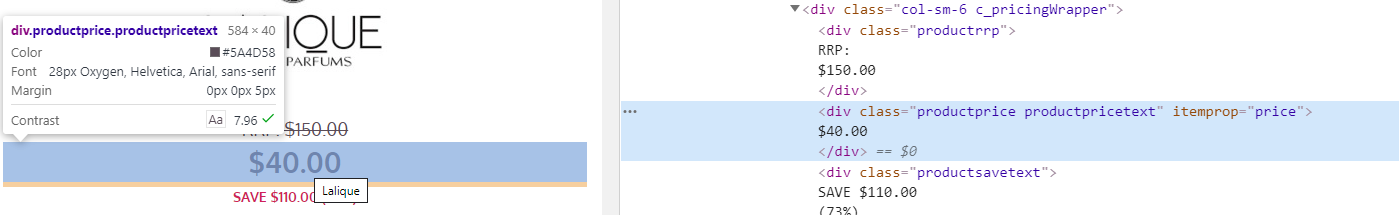

In [89]:
# The prices from going into each URL
[i[0].strip('\n') for i in price]

['$40.00',
 '$15.00',
 '$37.00',
 '$15.00',
 '$48.00',
 '$18.00',
 '$110.00',
 '$102.00',
 '$80.00',
 '$490.00',
 '$61.00',
 '$15.00',
 '$70.00',
 '$61.00',
 '$58.00',
 '$66.00',
 '$92.00',
 '$46.00',
 '$110.00',
 '$44.00',
 '$29.00',
 '$38.00',
 '$52.00',
 '$39.00']

In [90]:
# Vs. the prices using selenium on the first page
[i.strip('\n') for i in prices]

['$40.00',
 '$15.00',
 '$20.00',
 '$15.00',
 '$48.00',
 '$18.00',
 '$15.00',
 '$102.00',
 '$80.00',
 '$490.00',
 '$61.00',
 '$15.00',
 '$70.00',
 '$61.00',
 '$58.00',
 '$66.00',
 '$92.00',
 '$46.00',
 '$110.00',
 '$44.00',
 '$29.00',
 '$36.00',
 '$52.00',
 '$39.00']

#### Scraping Behind Login

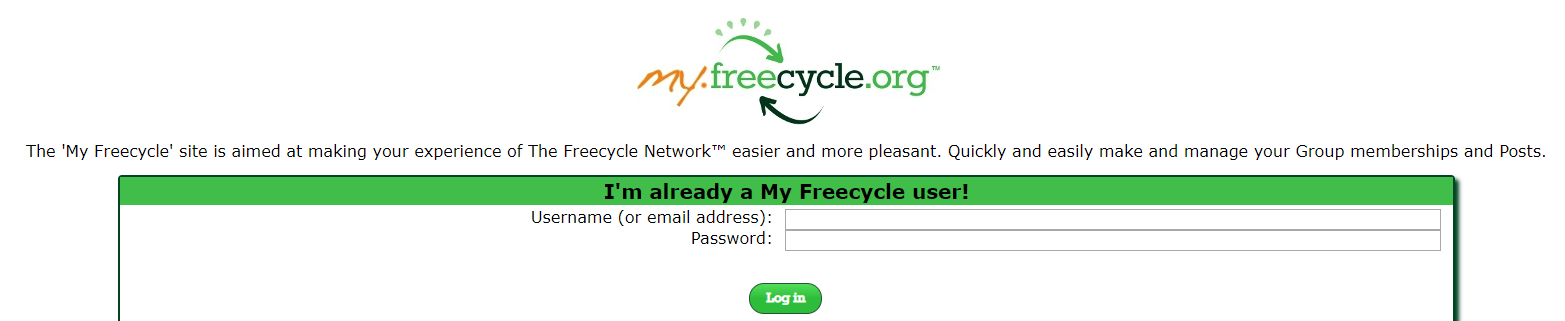

In [40]:
import requests
from bs4 import BeautifulSoup

In [41]:
# URL we are logging into 
URL_push = 'https://www.reddit.com/login/'

# URL we are scraping from
URL_pull = 'https://www.reddit.com/user/webscrapingtest/upvoted/'

In [43]:
# Login details
login = {
    'username': 'webscrapingtest',
    'pass': 'webscrapingtest'
}

In [44]:
# We create a request session
# We use the with statement, so the session closes itself when its done
# This stores login details and cookies
with requests.Session() as session:
    session.post(URL_push, data=login)
    r = session.get(URL_pull)
    
r.text[:100]

'<!DOCTYPE html><html lang="en-US"><head><script>\n          var __SUPPORTS_TIMING_API = typeof perfor'

In [45]:
html = r.text

In [37]:
from scrapy.selector import Selector

Selector(text=html).xpath("/").getall()

[]

In [1]:
# overriding, as this forum will definitely change
# you can try commenting this out, to check the actual scraping on the website
html = ' <!DOCTYPE html> \n<html lang=\'i_default\'>\n<head>\n    <meta charset="utf-8" />\n    <meta http-equiv="content-type" content="text/html;charset=utf-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n    <meta name="description" content="The Freecycle Network is a grassroots and entirely nonprofit movement of people who are giving (and getting) stuff for free in their own towns. It\'s all about reuse and keeping good stuff out of landfills.">\n    <title>Posts on the Sydney - Bankstown Group | The Freecycle Network</title>\n    <link rel="shortcut icon" href="//static.freecycle.org/images/favicon.ico" />\n    <link rel="icon" type="image/png" href="//static.freecycle.org/images/favicon.png" />\n    <link rel="apple-touch-icon" href="//static.freecycle.org/images/apple-touch-icon.png" />\n    <link rel="apple-touch-icon" sizes="72x72" href="//static.freecycle.org/images/apple-ipad-icon.png" />\n    <link rel="apple-touch-icon" sizes="114x114" href="//static.freecycle.org/images/apple-touch-icon-retina.png" />\n    <link rel="apple-touch-icon" sizes="144x144" href="//static.freecycle.org/images/apple-ipad-icon-retina.png" />\n    <link rel=\'stylesheet\' type=\'text/css\' href=\'//static.freecycle.org/css/freecycle.css\' />\n    <script type=\'text/javascript\' src=\'//static.freecycle.org/js/freecycle.js\'></script> <script>\n  (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),\n  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)\n  })(window,document,\'script\',\'//www.google-analytics.com/analytics.js\',\'ga\');\n\n  ga(\'create\', \'UA-12614335-1\', \'auto\');\n  ga(\'set\', \'allowAdFeatures\', false);\n ga(\'send\', \'pageview\');\n\n</script>\n\n      <!-- Prebid Custom Config Section START -->\n  <!-- Make sure this is inserted before your GPT tag -->\n  <script> \n    var PREBID_TIMEOUT = 1400;\n    var FAILSAFE_TIMEOUT = 2400;\n\n    // Add more bidders like Oath, etc later...\n    var adUnits =  [{\n\t\tcode: "div-gpt-ad-8054601-1",\n\t\tbids: [\n\t\t   {\n\t\t\tbidder: "openx",\n\t\t\tparams: {\n                \t\tunit: "539508013",\n                \t\tdelDomain:  "freecycle-d.openx.net"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "onedisplay",\n\t\t\tparams: {\n                \t\tplacement: "4741552",\n                \t\tnetwork:  "11209.1"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "sovrn",\n\t\t\tparams: {\n\t\t\t\ttagid: 533972\n\t\t\t}\n\t\t   }\n\t\t],\n\t\tmediaTypes: {\n\t\t\tbanner: {\n\t\t\t\tsizes: [\n\t\t\t\t\t[300, 250]\n\t\t\t\t]\n\t\t\t}\n\t\t}\n\t}, {\n\t\tcode: "div-gpt-ad-8054602-1",\n\t\tbids: [\n\t\t   {\n\t\t\tbidder: "openx",\n\t\t\tparams: {\n                \t\tunit: "539508016",\n                \t\tdelDomain:  "freecycle-d.openx.net"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "onedisplay",\n\t\t\tparams: {\n                \t\tplacement: "4741554",\n                \t\tnetwork:  "11209.1"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "sovrn",\n\t\t\tparams: {\n\t\t\t\ttagid: 533973\n\t\t\t}\n\t\t   }\n\t\t],\n\t\tmediaTypes: {\n\t\t\tbanner: {\n\t\t\t\tsizes: [\n\t\t\t\t\t[300, 250]\n\t\t\t\t]\n\t\t\t}\n\t\t}\n\t}, {\n\t\tcode: "div-gpt-ad-8054603-1",\n\t\tbids: [\n\t\t   {\n\t\t\tbidder: "openx",\n\t\t\tparams: {\n                \t\tunit: "539508017",\n                \t\tdelDomain:  "freecycle-d.openx.net"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "onedisplay",\n\t\t\tparams: {\n                \t\tplacement: "4741553",\n                \t\tnetwork:  "11209.1"\n          \t\t}\n\t\t   },\n\t\t   {\n\t\t\tbidder: "sovrn",\n\t\t\tparams: {\n\t\t\t\ttagid: 533974\n\t\t\t}\n\t\t   }\n\t\t],\n\t\tmediaTypes: {\n\t\t\tbanner: {\n\t\t\t\tsizes: [\n\t\t\t\t\t[160, 600]\n\t\t\t\t]\n\t\t\t}\n\t\t}\n\t}\n    ];\n\n    console.log("prebid configured.");\n\n  </script>\n  <!-- Prebid Config Section END -->\n  \n  <!-- Prebid Boilerplate Section START. No Need to Edit. -->\n  <script type="text/javascript" src="//static.freecycle.org/js/prebid_tfn.js" async></script>\n  <script>\n            var googletag = googletag || {};\n            googletag.cmd = googletag.cmd || [];\n            googletag.cmd.push(function() {\n                googletag.pubads().disableInitialLoad();\n            });\n\n            var pbjs = pbjs || {};\n            pbjs.que = pbjs.que || [];\n\n            pbjs.que.push(function() {\n\t\tpbjs.enableAnalytics([\n          \t   {\n               \t\tprovider: \'ga\',\n               \t\toptions: {\n                       \t\tenableDistribution: false\n               \t   \t}\n          \t   }\n\t\t]);\n                pbjs.addAdUnits(adUnits);\n                pbjs.requestBids({\n                    bidsBackHandler: initAdserver,\n                    timeout: PREBID_TIMEOUT\n                });\n            });\n\n            function initAdserver() {\n                if (pbjs.initAdserverSet) return;\n                pbjs.initAdserverSet = true;\n                googletag.cmd.push(function() {\n                    pbjs.setTargetingForGPTAsync && pbjs.setTargetingForGPTAsync();\n                    googletag.pubads().refresh();\n                });\n            }\n            \n            // in case PBJS doesn\'t load\n            setTimeout(function() {\n                initAdserver();\n            }, FAILSAFE_TIMEOUT);\n\n\n  </script>\n  <!-- Prebid Boilerplate Section END -->\n\n  <script>\n    (function () {\n        var gads = document.createElement(\'script\');\n        gads.async = true;\n        gads.type = \'text/javascript\';\n        var useSSL = \'https:\' == document.location.protocol;\n        gads.src = (useSSL ? \'https:\' : \'http:\') +\n                \'//www.googletagservices.com/tag/js/gpt.js\';\n        var node = document.getElementsByTagName(\'script\')[0];\n        node.parentNode.insertBefore(gads, node);\n    })();\n  </script>\n\n  <script>\n//***************  define our actual TFN ad slots.\ngoogletag.cmd.push(function() {\n\tgoogletag.defineSlot(\'/1053204/newBottomLeft\', [\n\t\t[300, 250]\n\t], \'div-gpt-ad-8054601-1\').addService(googletag.pubads());\n\tgoogletag.defineSlot(\'/1053204/newBottomRight\', [\n\t\t[300, 250]\n\t], \'div-gpt-ad-8054602-1\').addService(googletag.pubads());\n\tgoogletag.defineSlot(\'/1053204/newRightTower\', [\n\t\t[160, 600]\n\t], \'div-gpt-ad-8054603-1\').addService(googletag.pubads());\n\n\tgoogletag.pubads().enableSingleRequest();\n\tgoogletag.enableServices()\n});\n  </script>\n\n<!-- Sovrn OneTag code. outside of DFP and header bidding... -->\n<script src="//get.s-onetag.com/31b96d5d-a076-42df-a1ab-156f616f8bfe/tag.min.js" async defer></script>\n      <div id="fb-root"></div>\n<script>(function(d, s, id) {\n          var js, fjs = d.getElementsByTagName(s)[0];\n          if (d.getElementById(id)) return;\n          js = d.createElement(s); js.id = id;\n          js.src = "//connect.facebook.net/i_default/sdk.js#xfbml=1&version=v2.0";\n          fjs.parentNode.insertBefore(js, fjs);\n     }(document, \'script\', \'facebook-jssdk\'));\n </script>\n\n \n    <script>\n    googletag.cmd.push(function() {\n    \tgoogletag.defineSlot(\'/1053204/groups_box_right_top\', [[160, 80]], \'div-gpt-ad-1430927965333-1\').addService(googletag.pubads());\n    });\n    </script> </head>\n\n<body>  <nav id="skip_nav_menu"><a href=\'#content\'>Skip navigation menu</a><hr></nav>\n\n<nav id="main_menu"> <a href=\'https://www.freecycle.org\'  class=\'menu_header \' title="Home">Home</a> <a href=\'https://www.freecycle.org/browse/\'  class=\'menu_header \' title="Browse Groups">Browse Groups</a> <a href=\'http://faq.freecycle.org/\' id=\'mmenu_faq\'  class=\'menu_header \' title="FAQ">FAQ</a> <a href=\'https://www.freecycle.org/about/\' id=\'mmenu_about\'  class=\'menu_header \' title="About Freecycle&trade;">About Freecycle&trade;</a> <a href=\'https://www.freecycle.org/donate\'  class=\'menu_header menu_header_2\' title="Donate">Donate</a> <a href=\'https://www.freecycle.org/about/sponsors\'  class=\'menu_header menu_header_2\' title="Sponsors">Sponsors</a>  <a href=\'https://my.freecycle.org/\'  class=\'menu_header \' title="Log in/Sign up">Log in/Sign up</a>  </nav>\n<nav id=\'dyn_myf\'>\n  <a href=\'http://my.freecycle.org/home/info\' class=\'menu_item\' title="My Info">My Info</a>\n  <a href=\'http://my.freecycle.org/home/groups\' class=\'menu_item\' title="My Groups">My Groups</a>\n  <a href=\'http://my.freecycle.org/home/posts\' class=\'menu_item\' title="My Posts">My Posts</a>\n</nav>\n<nav id=\'dyn_about\'>\n  <a href="http://newswire.freecycle.org" class=\'menu_item\' title="Newswire">Newswire</a>\n  <a href="//www.freecycle.org/about/background" class=\'menu_item\' title="History">History</a>\n  <a href="//www.freecycle.org/about/video" class=\'menu_item\' title="Instructional Video">Instructional Video</a>\n  <a href="//www.freecycle.org/about/promovideo" class=\'menu_item\' title="Promo Video - Lamp">Promo Video - Lamp</a>\n  <a href="//www.freecycle.org/about/missionstatement" class=\'menu_item\' title="Mission Statement">Mission Statement</a>\n  <a href="//www.freecycle.org/about/pressroom" class=\'menu_item\' title="Press Room">Press Room</a>\n  <a href="//www.freecycle.org/about/sponsors" class=\'menu_item\' title="Sponsors">Sponsors</a>\n  <a href="//www.freecycle.org/about/funds" class=\'menu_item\' title="Sources and Use of Funds">Sources and Use of Funds</a>\n  <a href="//www.freecycle.org/about/volunteering" class=\'menu_item\' title="Volunteering">Volunteering</a>\n  <a href="http://wiki.freecycle.org/Leadership" class=\'menu_item\' title="Leadership">Leadership</a>\n  <a href="//www.freecycle.org/about/board" class=\'menu_item\' title="Board">Board</a>\n  <a href="//www.freecycle.org/about/privacy" class=\'menu_item\' title="Privacy">Privacy</a>\n  <a href="//www.freecycle.org/tos" class=\'menu_item\' title="Terms of Service">Terms of Service</a>\n  <a href="//www.freecycle.org/about/disclaimer" class=\'menu_item\' title="Disclaimer">Disclaimer</a>\n  <a href="//www.freecycle.org/about/links" class=\'menu_item\' title="Links we like">Links we like</a>\n</nav>\n<nav id=\'dyn_faq\'>\n <a href="http://wiki.freecycle.org/MemberFAQ" class="menu_item" title="Member FAQ">Member FAQ</a>\n <a href="http://wiki.freecycle.org/Moderator_Manual:Main_Page" class="menu_item" title="Moderator Manual">Moderator Manual</a>\n</nav>   <!-- only show this stuff if you\'re logged in -->  <style>\n#blocker_message {\n       \n        border: 2px solid black;\n        border-radius: 10px;\n        display: none;\n        align-self: center;\n        text-align: center;\n\tfont-size: .8em;\n        margin-top: 5px;\n        padding: 5px 80px 5px 80px;\n        background-color: #eee;\n}\n</style>\n<div id="blocker_message">Please consider turning off your ad-blocking software for this site, and/or making a <a href="//www.freecycle.org/donate">donation</a>. As a charitable nonprofit we rely on this income to keep this site running. <br>Big thank-you hug!</div>  <!-- fundraiser box goes here if we\'re doing it -->         <header id="main_logo" class="boxCenter">\n    <img src="//static.freecycle.org/images/freecycle_logo.jpg"\n        alt="logo of The Freecycle Network" title="The Freecycle Network" height="100" width="213" />\n    <p id=\'tagline\'>changing the world<br />one gift at a time&trade;</p>\n</header>  <section id="content"> <h2>\n <a href=\'https://groups.freecycle.org/group/BankstownAU\'>Sydney - Bankstown</a>\n</h2> <div id="contentbox_tab_bar"><div id="corset"><div class="tabbar_tab orange_tab  tabbar_tab_on"><a href=\'https://groups.freecycle.org/group/BankstownAU/posts/all\' title=\'All Items\'>All Items</a></div><div class="tabbar_tab orange_tab "><a href=\'https://groups.freecycle.org/group/BankstownAU/posts/offer\' title=\'Offers\'>Offers</a></div><div class="tabbar_tab orange_tab "><a href=\'https://groups.freecycle.org/group/BankstownAU/posts/wanted\' title=\'Wanteds\'>Wanteds</a></div><div class=\'tabbar_tab orange_tab menu_tab\'><ul\n  ><li class=\'header\'><a href="https://groups.freecycle.org/group/BankstownAU" title="Group Info">Group Info &darr;</a></li\n  ><li class=\'item\'><a href=\'https://groups.freecycle.org/group/BankstownAU/description\'>Description</a></li\n  ><li class=\'item\'><a href=\'https://groups.freecycle.org/group/BankstownAU/files\'>Files</a></li\n  ><li class=\'item\'><a href=\'https://groups.freecycle.org/group/BankstownAU/links\'>Links</a></li\n></ul></div><div class="tabbar_tab green_tab "><a href=\'http://my.freecycle.org/home/posts\' title=\'My Posts\'>My Posts</a></div><div class="tabbar_tab green_tab "><a href=\'http://my.freecycle.org/home/groups\' title=\'My Groups\'>My Groups</a></div><div class="tabbar_tab green_tab "><a href=\'http://my.freecycle.org/home/info\' title=\'My Info\'>My Info</a></div></div></div>    \n <div id="group_box">\n\n  <div id="group_info_bar">\n  &nbsp;  2006 Members &nbsp;   Please see the <a href="http://wiki.freecycle.org/Main_Page#Members">Member FAQ</a> for help  </div>\n\n<div id="split_right" style="margin-left: 15px;"> <script>\n/** \n$(document).ready(function() {\n    setTimeout( function() {\n        if($("div[id^=google_ads_iframe_] iframe:visible").length == 0)  { \n                $(\'#blocker_message\').slideDown(900);  \n        }}, 8000);  \n   // init();\n});\n**/\n</script>\n\n<!-- groups_box_right_top -->\n<div id=\'donate-box-container\' style=\'margin-top:5px;margin-bottom:5px;margin-left:0px;width:160px; padding-bottom:5px;padding-top:5px;\'>\n<div id=\'div-gpt-ad-1430927965333-1\'>\n    <script type=\'text/javascript\'>\n        googletag.cmd.push(function() { googletag.display(\'div-gpt-ad-1430927965333-1\'); });\n    </script>\n</div>\n</div>\n\n<!-- /1053204/newRightTower -->\n<div id=\'div-gpt-ad-8054603-1\' style=\'height:600px; width:160px;\'>\n    <script type=\'text/javascript\'>\n        googletag.cmd.push(function() { googletag.display(\'div-gpt-ad-8054603-1\'); });\n    </script>\n</div>\n\n\n </div>  <div id=\'group_admin_box\'>  <p>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/admin/76814\' class=\'noDecoration\'> <span class=\'post_icon icon_admin\'><span>!</span> ADMIN</span> </a>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/admin/76814\'  >Bankstown Group Name Change</a>\n</p>  <p>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/admin/76352\' class=\'noDecoration\'> <span class=\'post_icon icon_admin\'><span>!</span> ADMIN</span> </a>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/admin/76352\'  >Local Volunteer Moderators Needed</a>\n</p>  </div>\n<hr />  <p> <a class=\'button defaultButton\' href=\'http://my.freecycle.org/?referer=https%3A%2F%2Fgroups.freecycle.org%2Fgroup%2FBankstownAU%2Fposts%2Fall&join_group=4038\'>Sign up/log in</a> <a class=\'button defaultButton\' href=\'#group_posts_search_form\' onclick=\'display_search_form(); return false;\'>Search Posts</a>\n</p>  <hr />\n    <table id=\'group_posts_table\'>  <tr class=\'candy2\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085386/Football%20socks\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Sun Feb  2 09:07:29 2020<br />\n    (#76085386)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085386/Football%20socks\'>Football socks</a>  (Strathfield or CBD) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085386/Football%20socks\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy1\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085336/Cardboard%20frame%20corner%20protectors\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Sun Feb  2 09:03:57 2020<br />\n    (#76085336)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085336/Cardboard%20frame%20corner%20protectors\'>Cardboard frame corner protectors</a>  (Strathfield or CBD) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76085336/Cardboard%20frame%20corner%20protectors\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy2\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76031252/Kids%20slippery%20dip\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Wed Jan 29 12:30:28 2020<br />\n    (#76031252)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76031252/Kids%20slippery%20dip\'>Kids slippery dip</a>  (Revesby) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/76031252/Kids%20slippery%20dip\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy1\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75926610/Green%20suspension%20file%20holder\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Wed Jan 22 11:23:34 2020<br />\n    (#75926610)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75926610/Green%20suspension%20file%20holder\'>Green suspension file holder</a>  (Strathfield or CBD) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75926610/Green%20suspension%20file%20holder\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy2\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75462106/Cutting%20Mat%20-%20large%20size\' class=\'noDecoration\'\n> <span class=\'post_icon icon_wanted\'><span>&bull;</span> WANTED</span> </a>\n<br /> Tue Jan 21 16:14:29 2020<br />\n    (#75462106)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75462106/Cutting%20Mat%20-%20large%20size\'>Cutting Mat - large size</a>  (Bankstown area) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75462106/Cutting%20Mat%20-%20large%20size\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy1\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75883646/The%20Official%20Rugby%20League%20sticker%20album%202001\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Mon Jan 20 00:19:41 2020<br />\n    (#75883646)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75883646/The%20Official%20Rugby%20League%20sticker%20album%202001\'>The Official Rugby League sticker album 2001</a>  (Lugarno) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75883646/The%20Official%20Rugby%20League%20sticker%20album%202001\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy2\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75877070/HSC%20Textbooks%20-%20Maths%2C%20Physics%2C%20Chemistry%2C%20Engineering%2C%20English\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Sun Jan 19 10:43:51 2020<br />\n    (#75877070)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75877070/HSC%20Textbooks%20-%20Maths%2C%20Physics%2C%20Chemistry%2C%20Engineering%2C%20English\'>HSC Textbooks - Maths, Physics, Chemistry, Engineering, English</a>  (Peakhurst) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75877070/HSC%20Textbooks%20-%20Maths%2C%20Physics%2C%20Chemistry%2C%20Engineering%2C%20English\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy1\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75819236/Mailing%20cylinder\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Wed Jan 15 11:06:16 2020<br />\n    (#75819236)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75819236/Mailing%20cylinder\'>Mailing cylinder</a>  (Strathfield or CBD) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75819236/Mailing%20cylinder\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy2\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75804422/Extendable%20Dining%20table\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Tue Jan 14 10:37:10 2020<br />\n    (#75804422)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75804422/Extendable%20Dining%20table\'>Extendable Dining table</a>  (Peakhurst) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75804422/Extendable%20Dining%20table\'>See details</a>\n</p>  </td>\n</tr>  <tr class=\'candy1\'>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75793608/Books\' class=\'noDecoration\'\n> <span class=\'post_icon icon_offer\'><span>&gt;</span> OFFER</span> </a>\n<br /> Mon Jan 13 22:54:48 2020<br />\n    (#75793608)\n  </td>\n  <td>\n    <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75793608/Books\'>Books</a>  (freecycle) <br />   <p class=\'textCenter\'>\n  <a href=\'https://groups.freecycle.org/group/BankstownAU/posts/75793608/Books\'>See details</a>\n</p>  </td>\n</tr>  </table>  <p> Showing 1 to 10 of 14 results.<br />1 <a href=\'?page=2&amp;resultsperpage=10&amp;showall=off&amp;include_offers=off&amp;include_wanteds=off&amp;include_receiveds=off&amp;include_takens=off\'>2</a> <a href=\'?page=2&amp;resultsperpage=10&amp;showall=off&amp;include_offers=off&amp;include_wanteds=off&amp;include_receiveds=off&amp;include_takens=off\'><span style=\'font-size:14pt\'>&rarr;</span></a>   </p>  <hr />  <p> <a class=\'button defaultButton\' href=\'http://my.freecycle.org/?referer=https%3A%2F%2Fgroups.freecycle.org%2Fgroup%2FBankstownAU%2Fposts%2Fall&join_group=4038\'>Sign up/log in</a> <a class=\'button defaultButton\' href=\'#group_posts_search_form\' onclick=\'display_search_form(); return false;\'>Search Posts</a>\n</p>  <div id=\'group_posts_search_form\' title="Search Posts">  Sorry, only logged-in members can search for posts right now.  </div>  <script type=\'text/javascript\'>\nfunction display_search_form() {\n\t$(\'#group_posts_search_form\').\n\t\tdialog({\n\t\t\twidth: 640,\n            modal: true,\n\t\t\tresizable: false\n\t\t});\n}\n\n// If the browser doesn\'t support a native HTML5 "date" input type, use a jQueryUI replacement\nvar t = document.createElement("input");\nt.setAttribute("type", "date");\nif ( t.type !== "date" ) $(\'.datepicker\').datepicker({ dateFormat: \'yy-mm-dd\' });\n\n</script>  <div style=\'clear:both\'></div>\n</div>\n\n\n<p id=\'joinbox\'> Please <a href=\'http://my.freecycle.org/login\'>login</a> or <a href=\'http://my.freecycle.org/signup\'>sign up</a> to My Freecycle to join this group. </p>  <section id=\'social_media_buttons\'>\n    <div style=\'margin:0px important!;padding:0px;">\n\n <script src="https://apis.google.com/js/platform.js" async defer>\n  {lang: \'i_default\' }\n</script>\n\n<div class="g-follow" data-annotation="bubble" data-height="20" data-href="https://plus.google.com/105329491294406874354" data-rel="publisher"></div>\n\n <a style="top:-1px;" href="https://twitter.com/freecycle" class="twitter-follow-button" data-show-count="false">Follow @freecycle</a>\n<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?\'http\':\'https\';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+\'://platform.twitter.com/widgets.js\';fjs.parentNode.insertBefore(js,fjs);}}(document, \'script\', \'twitter-wjs\');</script>\n\n <div style=\'display:inline-block; top:-2px;\' class="fb-like" data-href="https://www.facebook.com/freecycle" data-send="false" data-layout="button_count" data-width="450" data-show-faces="false"></div>\n    </div>\n</section>\n  <div style="display:block;width:650px;margin-left:auto;margin-right:auto; margin-top:0em; top:-1em;">\n\n <div style="margin:10px;margin-top:0px;background-color:white;float:left;">\n    <!-- /1053204/newBottomLeft -->\n    <div id=\'div-gpt-ad-8054601-1\' style=\'height:250px; width:300px;\'>\n        <script type=\'text/javascript\'>\n          googletag.cmd.push(function() { googletag.display(\'div-gpt-ad-8054601-1\'); });\n        </script>\n    </div>\n\n </div>\n <div style="margin:10px;margin-top:0px;background-color:white;float:left;">\n    <!-- /1053204/newBottomRight -->\n   <div id=\'div-gpt-ad-8054602-1\' style=\'height:250px; width:300px;\'>\n        <script type=\'text/javascript\'>\n            googletag.cmd.push(function() { googletag.display(\'div-gpt-ad-8054602-1\'); });\n        </script>\n    </div>\n </div>\n</div>  <!-- end of whole bottom of page ad splacement -->\n\n    </section>\n\n<footer id="main_footer"> Copyright &copy;2020 The Freecycle Network (<a href="http://www.freecycle.org">http://www.freecycle.org</a>). All rights reserved. Freecycle and the Freecycle logo are trademarks of The Freecycle Network in various countries.  </footer>\n\n</body>\n</html>\n                     '

In [2]:
# Parse the text
soup = BeautifulSoup(html,'lxml')
soup;

NameError: name 'BeautifulSoup' is not defined

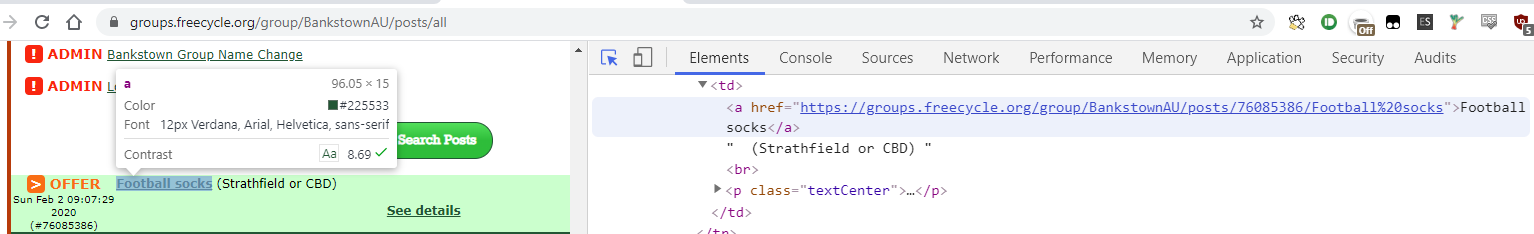

In [17]:
# Let's look for the text for the first entry
# There doesn't seem to be the text of "Football socks", looks like its javascript so we will need to use something like selenium
print(1,soup.find('table',id="group_posts_table").find('a'))
print(2,soup.find('table',id="group_posts_table").find('a').text)

1 <a class="noDecoration" href="https://groups.freecycle.org/group/BankstownAU/posts/77480284/City%20Mini%20by%20Baby%20Jogger%20pram%2Fstroller"> <span class="post_icon icon_offer"><span>&gt;</span> OFFER</span> </a>
2  > OFFER 


### APIs
---
* Companys may release a lot of useful data through APIs
* APIs are also a way for companies to monetise and sell their data, but they often provide a free daily limity of requests
* Often when requesting information from APIs, we need a unique identifier called a API key

#### API Example
* For the following example, you need to **create your own geocode API key**. Read below for instructions 

In [99]:
import requests

# Insert a google geocode API key below
# A key can be obtained from a free google cloud account
# Create a project, enable geocode API and create an API key
# key = 

# We request data from the api
# The url will vary for each api, so read the documentation
result = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address=22+Currawang+Street+Concord+West+Sydney&key={key}")

# API data are usually stored in json format, so return it
result.json()

NameError: name 'key' is not defined

In [ ]:
# If a key isn't available to you, here are the returned results
google_results = {'results': [{'address_components': [{'long_name': '22',
     'short_name': '22',
     'types': ['street_number']},
    {'long_name': 'Currawang Street',
     'short_name': 'Currawang St',
     'types': ['route']},
    {'long_name': 'Concord West',
     'short_name': 'Concord West',
     'types': ['locality', 'political']},
    {'long_name': 'City of Canada Bay Council',
     'short_name': 'Canada Bay',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'New South Wales',
     'short_name': 'NSW',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'Australia',
     'short_name': 'AU',
     'types': ['country', 'political']},
    {'long_name': '2138', 'short_name': '2138', 'types': ['postal_code']}],
   'formatted_address': '22 Currawang St, Concord West NSW 2138, Australia',
   'geometry': {'bounds': {'northeast': {'lat': -33.8394905,
      'lng': 151.0906942},
     'southwest': {'lat': -33.8396741, 'lng': 151.0904792}},
    'location': {'lat': -33.8395973, 'lng': 151.0906039},
    'location_type': 'ROOFTOP',
    'viewport': {'northeast': {'lat': -33.83823331970849,
      'lng': 151.0919356802915},
     'southwest': {'lat': -33.84093128029149, 'lng': 151.0892377197085}}},
   'place_id': 'ChIJ0yFdNN6kEmsRB44rGzQggNA',
   'types': ['premise']}],
 'status': 'OK'}
google_results

In [ ]:
# Navigating an API is quite simple, its similar to indexing a dictionary
# For example the full adddress
f"{google_results['results'][0]['address_components'][0]['long_name']} {google_results['results'][0]['address_components'][1]['long_name']} \
{google_results['results'][0]['address_components'][2]['long_name']} "

In [ ]:
# Here are the latitude and longitudes of the house
f"{google_results['results'][0]['geometry']['location']['lat']}, {google_results['results'][0]['geometry']['location']['lng']}"

### Advanced Web Scraping
---
* I will use this section to talk about some advanced web scraping concepts
* I don't know too much about these advanced concepts, but I have noted they are possible interesting places to look when taking your web scraping to the next level

#### Scrapy's Spiders
* I'm not sure about the advantage of using spiders over requests.get
* However, I am assuming it is a more robust way to do scraping
* So if I was making a serious data pipeline, I would consider looking more into it
* Learn more here: https://docs.scrapy.org/en/latest/topics/spiders.html

#### Asynchronous Scraping
* When scraping, a lot of time could be spent waiting to receive the html response or waiting for Javascript to load
* For example if it takes 3 seconds on average to receive a response and if we had 100 pages to scrape
* If we scraped sequentially (asking for a response, waiting 3 seconds for a response and then asking for the next response), it would take around 300 seconds
* Alternatively when we are waiting for one response, we can suspend that function and start asking for other responses. This is called async scraping, which is an example of python's async capabilities. It heavily reduces the wait time by minimising the downtime. It is not multi-threading, as it is still performing operations on one core.
* the `requests html` package has support for async scraping
* Read more here: https://requests.readthedocs.io/projects/requests-html/en/latest/